# AI Lab project

## Introduction

### Cancer and Genomic research

Tumour development is a complex and multi-stage process in which healthy cells evolve into malignant tumours through a series of gene mutations and accumulation in cells, leading every broad cancer type to differentiate into several sub-types. By repeated proliferation and division processes, important gene mutations in tissues result in changes in cell phenotypes and cause the tumour cells to evolve depending on their microenvironments.

Therefore, each person’s genomic profile is strongly correlated with the genetic mutations of cancer tissues, and this makes tumour heterogeneity the main reason why cancer remains an enormous challenge in medical research and clinical treatment.

### Hypoxia and its role in cancer recognition

One of the main features of tumour’s microenvironment is a condition of hypoxia (a low availability of oxygen), due to an increased consumption and an impaired delivery of oxygen. While hypoxia is lethal for many cells, tumour cells are able to not only alter their metabolism to adapt to hypoxic conditions, but also become resistant to chemo/radiotherapy. It was also demonstrated that hypoxic cells, surviving in a state of apoptosis, become more aggressive and invasive, have a better ability to metastasize and are correlated with poor prognosis of cancer patients.

### Target of this research

The strong dependence between each individual’s DNA and tumour genetic expression in the cells makes Single-cell RNA sequencing (a technology that analyzes transcriptomes of complex tissues at single-cell levels) crucial for a clearer understanding of the molecular mechanisms involved in tumour occurrence (e.g. reveal key gene mutations and differential gene expression).

So, given two scRNA techniques (Smart-Sequencing and Drop-Sequencing) used to sequence some cells grown in different cell lines, our purpose aims to train a good predictor capable of recognizing whether a cell lives in a condition of hypoxia (on average 1%) or normoxia (usually set around 20% in laboratory settings).

From an enlarged knowledge of Hypoxic cells, we will then be able to trace back to the genes that appear to be responsible for genetic mutations

## Preamble

###  Overview over data

Our dataset provides information about two cell lines, called HCC1086 (derived from a human breast cancer patient) and MCF7 (also a human breast cancer cell line, characterized by high expression of estrogen and progesterone receptor).

We can quickly outline the attributes of the provided cell lines through the material provided by the Metadata.tsv files: we observe that in both cases, the cell lines are either grown in conditions of hypoxia or normoxia, and they are sequenced after 24 hours (for HCC1806) or 72 hours (for MCF7). Also, the position and the plate/lane are given, and the cell line's filenames summarize their features.

Our dataset provides information about two cell lines, called HCC1086 (derived from a human breast cancer patient) and MCF7 (also a human breast cancer cell line, characterized by high expression of estrogen and progesterone receptor).

We can quickly outline the attributes of the provided cell lines through the material provided by the Metadata.tsv files: we observe that in both cases, the cell lines are either grown in conditions of hypoxia or normoxia, and they are sequenced after 24 hours (for HCC1806) or 72 hours (for MCF7). Also, the position and the plate/lane are given, and the cell line's filenames summarize their features.

### Steps of our analysis

### Steps of our analysis

Firstly, we will analyze the data corresponding to HCC1806\_SmartS\_Unfiltered and try to build a suitable model:

* Exploratory Data Analysis
* Data Cleaning and Quality Control
* Normalisation and Scaling
* Unsupervised Learning
* Model Training

Secondly, we will deal with HCC1806\_SmartS\_Filtered\_Normalized, fit the same model, analyze its performance and enlarge our exploration by adopting other models to see how they work in comparison to ours.

Finally, we are going to follow the same procedure with HCC1806\_Drop\S_\_Filtered\_Normalized and state our conclusion on the whole project.

## Imports

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn.ensemble import IsolationForest
import scanpy as sc
from scipy.stats import kurtosis, skew, norm, probplot
import pylab
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from pandas.plotting import scatter_matrix
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA

##  Analysis of HCC1806_SmartS_Unfiltered

### Data Exploration

In [2]:
H_Smart_unfil = pd.read_csv("HCC1806_SmartS_Unfiltered_Data.txt",delimiter="\ ",engine='python',index_col=0)
H_Smart_metadata= pd.read_csv("HCC1806_SmartS_MetaData.tsv", delimiter = "\t", engine = "python", index_col = 0)
#H_Smart_unfil = pd.read_csv("C:\\Users\\len\\OneDrive\\Desktop\\BAI\\AI Lab\\SmartSeq\\HCC1806_SmartS_Unfiltered_Data.txt", delimiter = "\ ", engine = "python", index_col = 0)
#H_Smart_metadata = pd.read_csv("C:\\Users\\len\\OneDrive\\Desktop\\BAI\\AI Lab\\SmartSeq\\HCC1806_SmartS_MetaData.tsv", delimiter = "\t", engine = "python", index_col = 0)

**A QUICK INSIGHT:**

As previously mentioned, the Metadata file reveals useful attributes (in the columns) about the cell lines (rows of the dataframe):

In [3]:
H_Smart_metadata

Cell Line  PCR Plate  Pos  \
Filename                                                                       
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....   HCC1806          1  A10   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...   HCC1806          1  A12   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...   HCC1806          1   A1   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...   HCC1806          1   A2   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...   HCC1806          1   A3   
...                                                      ...        ...  ...   
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned....   HCC1806          4  H10   
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned....   HCC1806          4  H11   
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.so...   HCC1806          4   H2   
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.s...   HCC1806          4   H7   
output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.s...   HCC1806          4   H9   

                                                   Condition  Hours Cell name  \
Filename                                                                        
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....     Normo     24      S123   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...     Normo     24       S26   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...      Hypo     24       S97   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...      Hypo     24      S104   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...      Hypo     24        S4   
...                                                      ...    ...       ...   
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned....     Normo     24      S210   
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned....     Normo     24      S214   
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.so...      Hypo     24      S199   
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.s...     Normo     24      S205   
output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.s...     Normo     24      S236   

                                                                 PreprocessingTag  \
Filename                                                                            
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...  Aligned.sortedByCoord.out.bam   
...                                                                           ...   
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned....  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned....  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.so...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.s...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.s...  Aligned.sortedByCoord.out.bam   

                                                    ProcessingComments  
Filename                                                                
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....  STAR,FeatureCounts  
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...  STAR,FeatureCounts  
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...  STAR,FeatureCounts  
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...  STAR,FeatureCounts  
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...  STAR,FeatureCounts  
...                                                                ...  
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned....  STAR,FeatureCounts  
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned....  STAR,FeatureCounts  
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.so...  STAR,FeatureCounts  
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.s

In [4]:
H_Smart_metadata
print("Dataset dimension:", np.shape(H_Smart_metadata))

# Number of cells with the same plate

plates= collections.Counter(H_Smart_metadata['PCR Plate'])
print('\n')
for x in sorted(plates):
    print(f'nr of cells in plate {x}: ', plates[x])
print('\n')

# Checking cells with different Conditio

cond= collections.Counter(H_Smart_metadata['Condition'])
for x in cond:
    print(f'nr of {x} cells: ', cond[x])

print('\n')
h= collections.Counter(H_Smart_metadata['Hours'])
for x in h:
    print(f'nr of cells that are in the cell line for {x} hours: ', h[x])

# Making the dataset readable
    
print('\nA more readable dataframe:')

# change filename into cell_name
HS_metadata= H_Smart_metadata.copy()
HS_metadata.set_index('Cell name', inplace=True)
HS_metadata.drop(['Pos', 'PreprocessingTag', 'ProcessingComments'], axis=1, inplace=True)
HS_metadata


Dataset dimension: (243, 8)


nr of cells in plate 1:  64
nr of cells in plate 2:  63
nr of cells in plate 3:  68
nr of cells in plate 4:  48


nr of Normo cells:  117
nr of Hypo cells:  126


nr of cells that are in the cell line for 24 hours:  243

A more readable dataframe:


Cell Line  PCR Plate Condition  Hours
Cell name                                      
S123        HCC1806          1     Normo     24
S26         HCC1806          1     Normo     24
S97         HCC1806          1      Hypo     24
S104        HCC1806          1      Hypo     24
S4          HCC1806          1      Hypo     24
...             ...        ...       ...    ...
S210        HCC1806          4     Normo     24
S214        HCC1806          4     Normo     24
S199        HCC1806          4      Hypo     24
S205        HCC1806          4     Normo     24
S236        HCC1806          4     Normo     24

[243 rows x 4 columns]

We are dealing with 243 cell lines, collected and processed in four different plates for a duration of 24 hours.
Also, the Metadata file reveals us the conditions of the cell lines, which will be addressed as the target variables in the core section of our analysis. Before delving into specifics, it is possible to notice that our research is about a binary classification problem where the two labels, 'Hypo' and 'Normo', have a balanced distribution in this dataset.

In [5]:
label= HS_metadata['Condition'].copy()
label

Cell name
S123    Normo
S26     Normo
S97      Hypo
S104     Hypo
S4       Hypo
        ...  
S210    Normo
S214    Normo
S199     Hypo
S205    Normo
S236    Normo
Name: Condition, Length: 243, dtype: object

**OUR RAW DATA:**

The upcoming dataset, denoted as *H_Smart_Unfil*, is structured with cell lines as the columns and genes as the rows. The values within the table correspond to the raw read counts of the genes expressed by each cell.

It is essential to analyze the unfiltered dataset in order to capture the original gene expression profiles without any preprocessing or filtering steps applied. By working with the raw data, we can account for the inherent variability and nuances present in the gene expression measurements and can gain valuable insights about our research problem. This analysis serves as a crucial foundation for subsequent modeling steps and aids in identifying the key attributes, assessing the distribution of gene expression across cells, detecting correlationsbetween genes and cell lines, and exploring other relevant characteristics necessary for developing robust models and drawing meaningful conclusions.




We start by inspecting its main features:

In [6]:
H_Smart_unfil

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                        
"CICP27"                                                    0                        
"DDX11L17"                                                  0                        
"WASH9P"                                                    0                        
"OR4F29"                                                    2                        
...                                                       ...                        
"MT-TE"                                                    22                        
"MT-CYB"                                                 4208                        
"MT-TT"                                                    26                        
"MT-TP"                                                    66                        
"MAFIP"                                                     0                        

            "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                       
"CICP27"                                                    0                       
"DDX11L17"                                                  0                       
"WASH9P"                                                    0                       
"OR4F29"                                                    0                       
...                                                       ...                       
"MT-TE"                                                    43                       
"MT-CYB"                                                 6491                       
"MT-TT"                                                    62                       
"MT-TP"                                                    71                       
"MAFIP"                                                     4                       

            "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                     
"CICP27"                                                    0                     
"DDX11L17"                                                  0                     
"WASH9P"                                                    0                     
"OR4F29"                                                    0                     
...                                                       ...                     
"MT-TE"                                                     0                     
"MT-CYB"                                                   25                     
"MT-TT"                                                     0                     
"MT-TP"                                                     1                     
"MAFIP"                                                     0                     

            "output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                      
"CICP27"                                                    0                      
"DDX11L17"                                                  0                      
"WASH9P"                                                    0                      
"OR4F29"                                                    0                      
...                                                       ...                      
"MT-TE"                                                     0                      
"MT-CYB"                                                 4819                      
"MT-TT"                                                    11                      
"MT-TP"                                                     3                      
"MAFIP"                              

In [7]:
# Let us make it more readable before going deep into it

def name_clean(data):
    
    # Rename columns and rows in H_Smart_Unfil to remove double quotes
    data = data.rename(columns=lambda x: x.strip('"'), index=lambda x: x.strip('"'))

    column_names = data.columns

    # Define a regular expression pattern to match "S" followed by 1 to 3 digits
    pattern = r'(S\d{1,3})'

    # Extract the "SXXX" part from the column names
    extracted_names = column_names.str.extract(pattern, expand=False)

    # Replace the original column names with the extracted names
    data.columns = extracted_names
    return data
  
H_Smart_unfil = name_clean(H_Smart_unfil)
H_Smart_unfil

H_Smart_metadata= name_clean(H_Smart_metadata.T).T
H_Smart_unfil

S123   S26  S97  S104   S4   S8  S108   S11  S113  S119  ...  S243  \
WASH7P       0     0    0     0    0    0     0     0     0     0  ...     0   
CICP27       0     0    0     0    0    0     0     0     0     0  ...     0   
DDX11L17     0     0    0     0    0    1     0     0     0     0  ...     0   
WASH9P       0     0    0     0    0    0     0     0     1     0  ...     0   
OR4F29       2     0    0     0    0    0     1     0     0     0  ...     0   
...        ...   ...  ...   ...  ...  ...   ...   ...   ...   ...  ...   ...   
MT-TE       22    43    0     0    0    3    47     4     2     8  ...    24   
MT-CYB    4208  6491   25  4819  310  695  2885  1552   366  1829  ...  1119   
MT-TT       26    62    0    11    4    0    41     9     2     8  ...    48   
MT-TP       66    71    1     3    9   14    91    22     3    30  ...   119   
MAFIP        0     4    0     7    0    9     0     4     2     0  ...     2   

          S193  S198  S232  S204  S210  S214  S199  S205  S236  
WASH7P       0     0     0     0     0     0     0     0     0  
CICP27       0     0     0     0     0     0     0     0     0  
DDX11L17     0     0     0     0     0     0     0     0     0  
WASH9P       0     0     0     0     1     0     1     0     0  
OR4F29       0     0     0     0     0     0     0     0     0  
...        ...   ...   ...   ...   ...   ...   ...   ...   ...  
MT-TE       15    15     4     4    26     1     4     4    20  
MT-CYB    1429   808   999   916  3719   984  2256   981  2039  
MT-TT       31     3     8     5    42     1    15     6    34  
MT-TP       52    11    22    15    48    18    36     8    79  
MAFIP        0     2     1     1     3     0     2     1     5  

[23396 rows x 243 columns]

In [8]:
print('Dimension of the dataset: ', H_Smart_unfil.shape)
n_rows= H_Smart_unfil.shape[0]
n_col= H_Smart_unfil.shape[1]
print('Number of rows:', n_rows, '\nNumber of columns:', n_col)

Dimension of the dataset:  (23396, 243)
Number of rows: 23396 
Number of columns: 243


Continuing our analysis, we proceed to investigate two important features of the dataset: the presence of non-numeric elements and the occurrence of cells that do not express any genes.

In [9]:
if len(H_Smart_unfil.dtypes[H_Smart_unfil.dtypes == 'int64']) == n_col:
    print('All entries are integer numbers')

def empty_cols(df):
    nulldf=[]
    for col in df.columns:
        if df[col].sum()==0:
            nulldf.append(col)
    return nulldf
print('Empty columns:', empty_cols(H_Smart_unfil))
print(f'Empty rows: {empty_cols(H_Smart_unfil.T)}')

All entries are integer numbers
Empty columns: []
Empty rows: []


Having assessed the absence of non-numeric elements and of cells lacking gene expression, we now proceed with visualizing the dataset using various plots to gain further insights and infer additional properties such as the overall distribution of gene expression values or the presence of of outlier cells or genes. In particular, we aim to investigate the degree of **sparsity** present in the dataset.

In the context of gene expression datasets, sparsity refers to the prevalence of zero or low expression values across the dataset, which can be visualized by identifying regions where the expression levels are consistently low or zero.

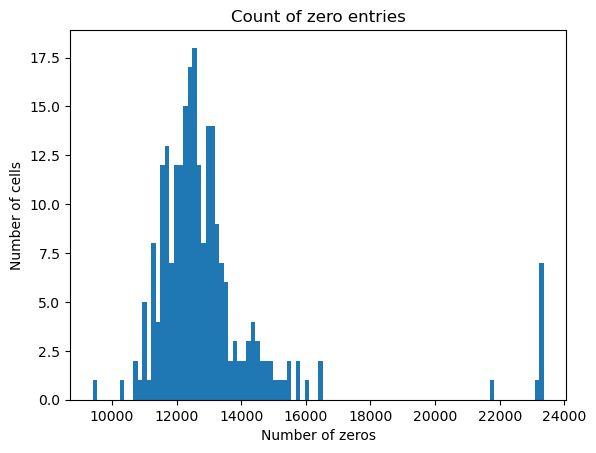

In [10]:
# Number of zeros for each cells
zeros = pd.Series(np.zeros(len(H_Smart_unfil.columns)), index = H_Smart_unfil.columns)

for col in H_Smart_unfil.columns:
    counter = 0
    for i in H_Smart_unfil[col]:
        if i == 0:
            counter += 1
    zeros[col] = counter
    
plt.hist(zeros, bins = 100)
plt.title('Count of zero entries')
plt.xlabel('Number of zeros')
plt.ylabel('Number of cells')
plt.show()

This dataset exhibits a high degree of sparsity, as evidenced by the fact that a significant proportion of cells have a count of zeros within the range of 11000 to 13000. This range corresponds to nearly half of the total number of genes present in the dataset.

Interpreting this observation, we can conclude that the dataset displays a low expression rate for the genes.
Zero measurement in scRNA-seq data have two sources: biological and non-biological.

While biological zeros carry meaningful information about cell states, non-biological zeros represent missing values artifcially introduced during the generation of scRNA-seq data.

Since we are unable to make conjectures about the previous data collection, we can assume (?) that the prevalence of biological zeros indicates that a large portion of genes remains inactive or has minimal involvement in the biological processes under investigation.

This finding suggests that only a subset of genes actively participates in gene expression, while the majority remains relatively silent or unexpresses, and guide further ananlyses and investigations to unravel the functional significance and potential interactions among the expressed genes.

**Some descriptive statistics:**

In [11]:
H_Smart_unfil.describe()

S123           S26           S97          S104            S4  \
count  23396.000000  23396.000000  23396.000000  23396.000000  23396.000000   
mean      99.565695    207.678278      9.694734    150.689007     35.700504   
std      529.532443    981.107905     65.546050    976.936548    205.885369   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%       51.000000    125.000000      5.000000     40.000000     22.000000   
max    35477.000000  69068.000000   6351.000000  70206.000000  17326.000000   

                 S8          S108           S11          S113          S119  \
count  23396.000000  23396.000000  23396.000000  23396.000000  23396.000000   
mean      47.088434    152.799453    135.869422     38.363908     45.512139   
std      545.367706    864.974182    870.729740    265.062493    366.704721   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%       17.000000     81.000000     76.000000     22.000000     18.000000   
max    47442.000000  43081.000000  62813.000000  30240.000000  35450.000000   

       ...          S243          S193          S198          S232  \
count  ...  23396.000000  23396.000000  23396.000000  23396.000000   
mean   ...     76.361771    105.566593     54.026116     29.763806   
std    ...    346.659348    536.881574    344.068304    186.721266   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      1.000000      0.000000      0.000000      0.000000   
75%    ...     56.000000     67.000000     29.000000     18.000000   
max    ...  19629.000000  30987.000000  21894.000000  13457.000000   

               S204          S210          S214          S199          S205  \
count  23396.000000  23396.000000  23396.000000  23396.000000  23396.000000   
mean      28.905411    104.740725     35.181569    108.197940     37.279962   
std      135.474736    444.773045    170.872090    589.082268    181.398951   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      2.000000      0.000000      0.000000      0.000000   
75%       19.000000     76.000000     24.000000     68.000000     22.000000   
max    11488.000000  33462.000000  15403.000000  34478.000000  10921.000000   

               S236  
count  23396.000000  
mean      76.303855  
std      369.090274  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%       44.000000  
max    28532.000000  

[8 rows x 243 columns]

We immediately notice high fluctuations in the mean and standard deviation of this dataset.

This evident volatility can raise questions about the heterogeneity of the data, as it could reflect the presence of different subgroups or clusters within the dataset, or may suggest that outliers or extreme values in the dataset have a significant impact on the summary statistics.\
It might also indicate issues such as data quality problems, measurement errors, or changing data collection methods.

It is possible to visualize the latter information by using violin plots

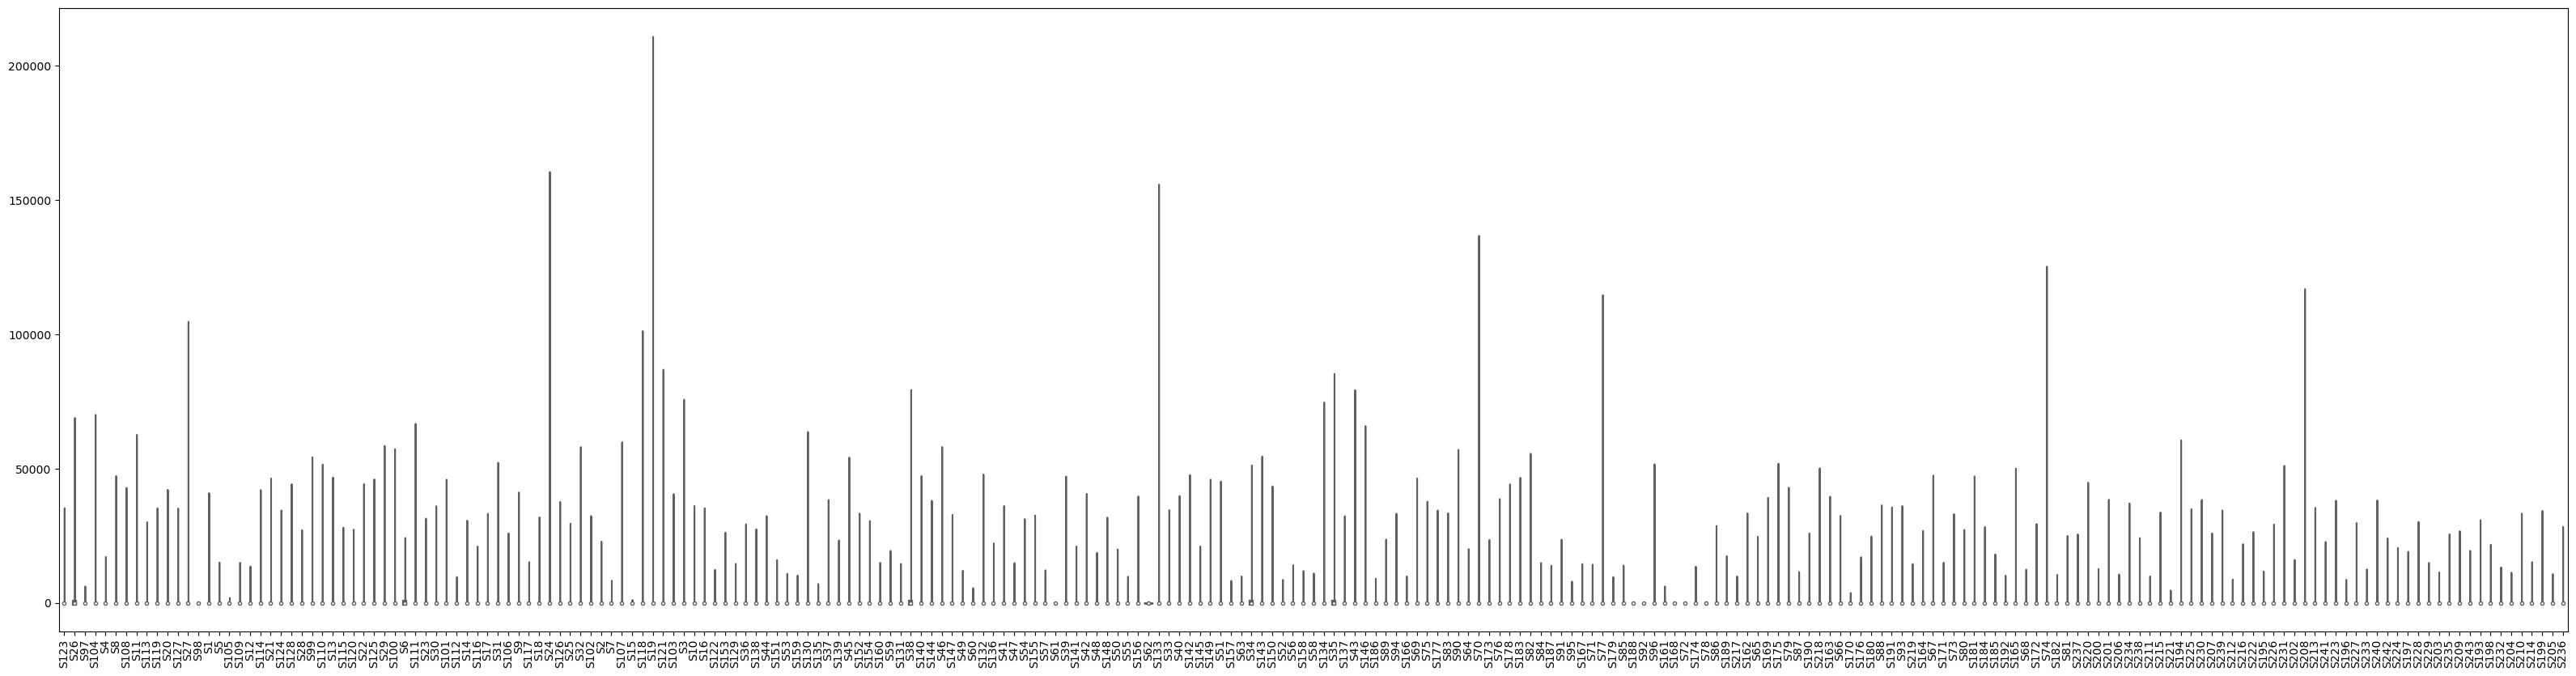

In [12]:
plt.figure(figsize=(40,10))
sns.violinplot(data= H_Smart_unfil, palette="Set3",cut=0)
plt.setp(plt.gca().get_xticklabels(), rotation= 90)
plt.show()

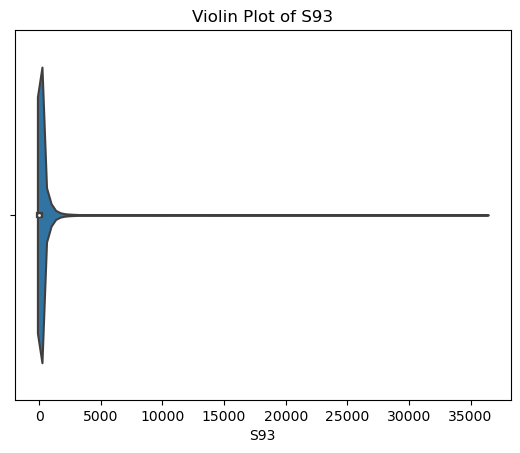

In [13]:
random_cell = np.random.randint(243)
sns.violinplot(H_Smart_unfil.iloc[:,random_cell])
plt.title(f'Violin Plot of {H_Smart_unfil.columns[random_cell]}');

The violin plots effectively combine the information provided by a box plot and a rotated kernel density plot on each side. They depict the distribution of the data, particularly highlighting the density and symmetry of the values, while the width of the violin at a specific point indicates the probability density of the data at that point. Thus, a wider section indicates a higher concentration of values, while a narrower section suggests a lower concentration.

In this visual representation, the violin plot reveals that the distribution has a notable peak at zero, indicating a higher frequency of data points with this value, confirming our previous observation regarding the sparsity of the dataset.

We now turn our attention to exploring the gene expression patterns within the dataset.
In this way, we can gain a deeper understanding of how genes are expressed and potentially identify patterns or relationships between samples.
We will explore three metrics, that will turn out to be crucial in the 'Data Cleaning' section of the analysis: __Count Depth__, __UMI counts__ and the __Fraction of Mitochondrial genes__.

- The __Count-Depth__ metric refers to the total number of reads (or sequencing depth) for each sample or observation. A higher count-depth generally indicates a more comprehensive and reliable dataset, as it implies a greater coverage of gene expression.


- The __UMI__ (Unique Molecular Identifier) count is a measure of the unique molecules captured in each sample. A high UMI count provides information about the diversity and complexity of the dataset, as it suggests a greater diversity of transcripts captured. This can be crucial when it comes to capturing rare or lowly expressed genes, and may be an indicator of inefficient data collection.


- The __Mitochondrial Ratio__ is a measure of the proportion of gene expression originating from mitochondrial genes compared to the total gene expression. Monitoring this metric is important, especially in studies involving single-cell RNA sequencing, as it helps identfy or compromised cells, since elevated mitochondrial ratios are typically more abundand in damaged or dying cells.

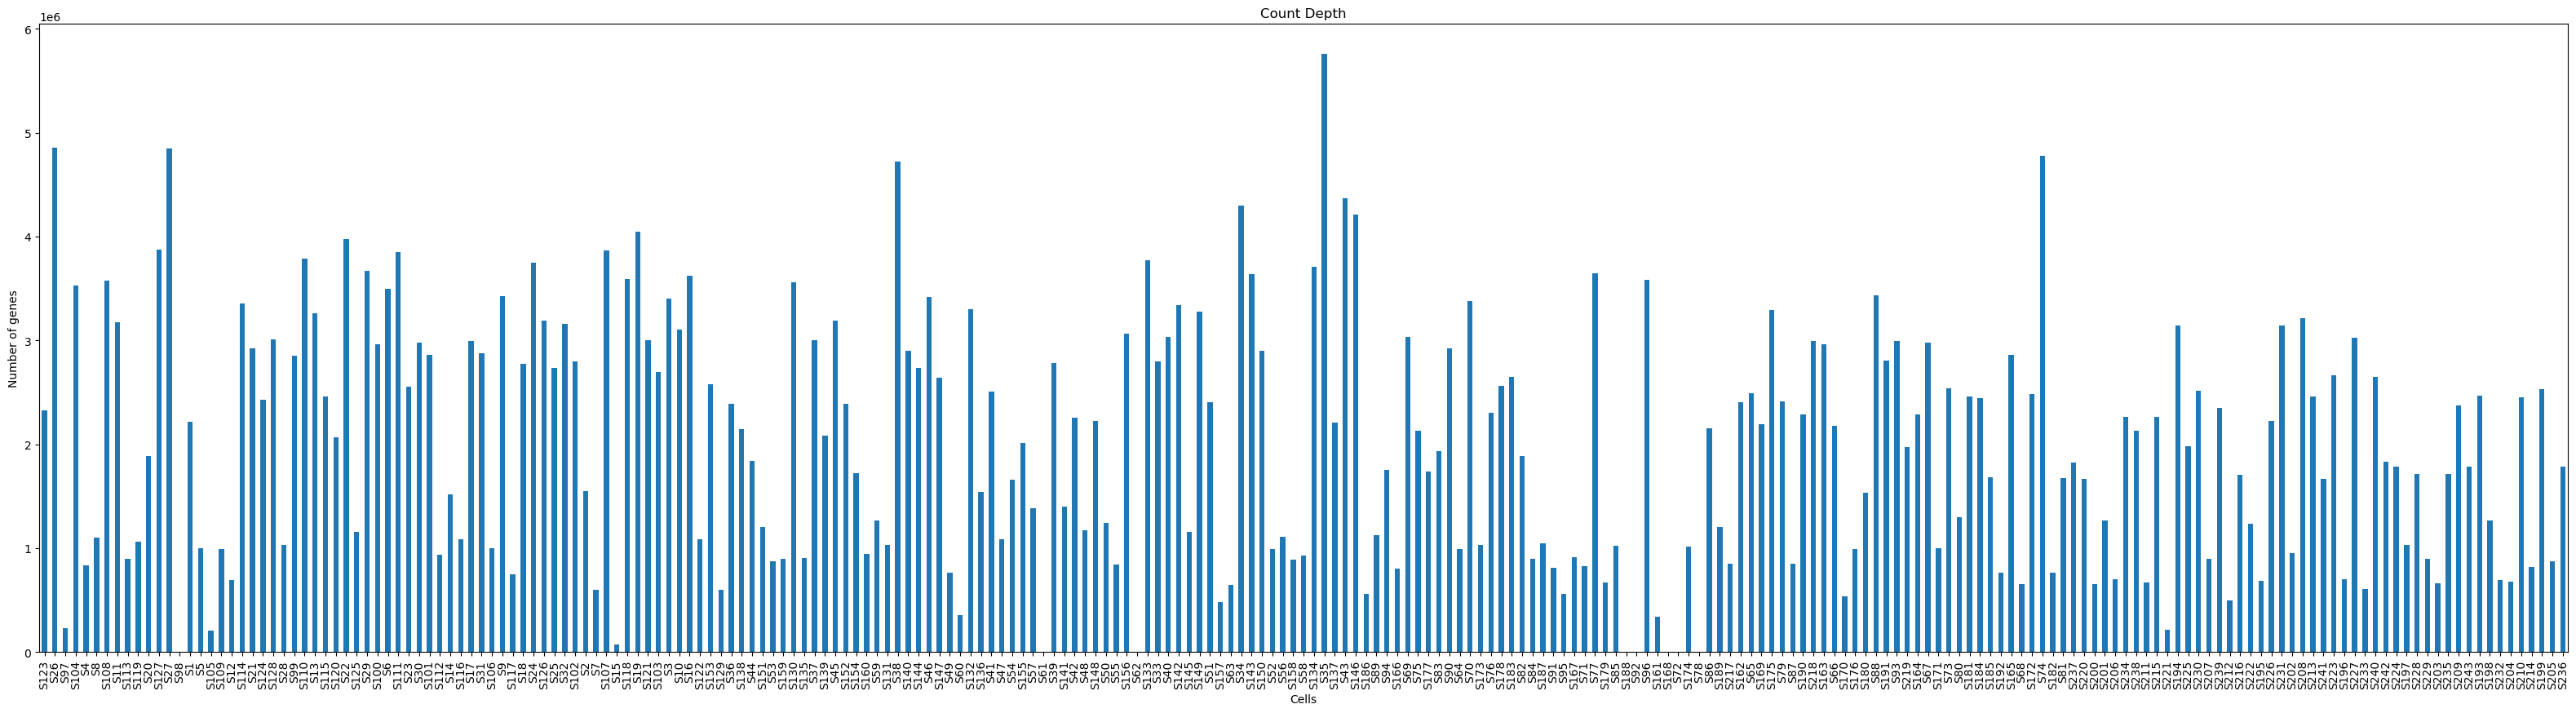

In [14]:
# Count depth is the total number of counts per cells
plt.figure(figsize = (40, 10))
H_Smart_unfil.sum().plot(kind = 'bar')
plt.title('Count Depth')
plt.xlabel('Cells')
plt.ylabel('Number of genes')
plt.show()

In this case, the count-depth appears unsatisfying for the purpose of our analysis, as the total number of reads significantly oscillates through the cells in the dataset.

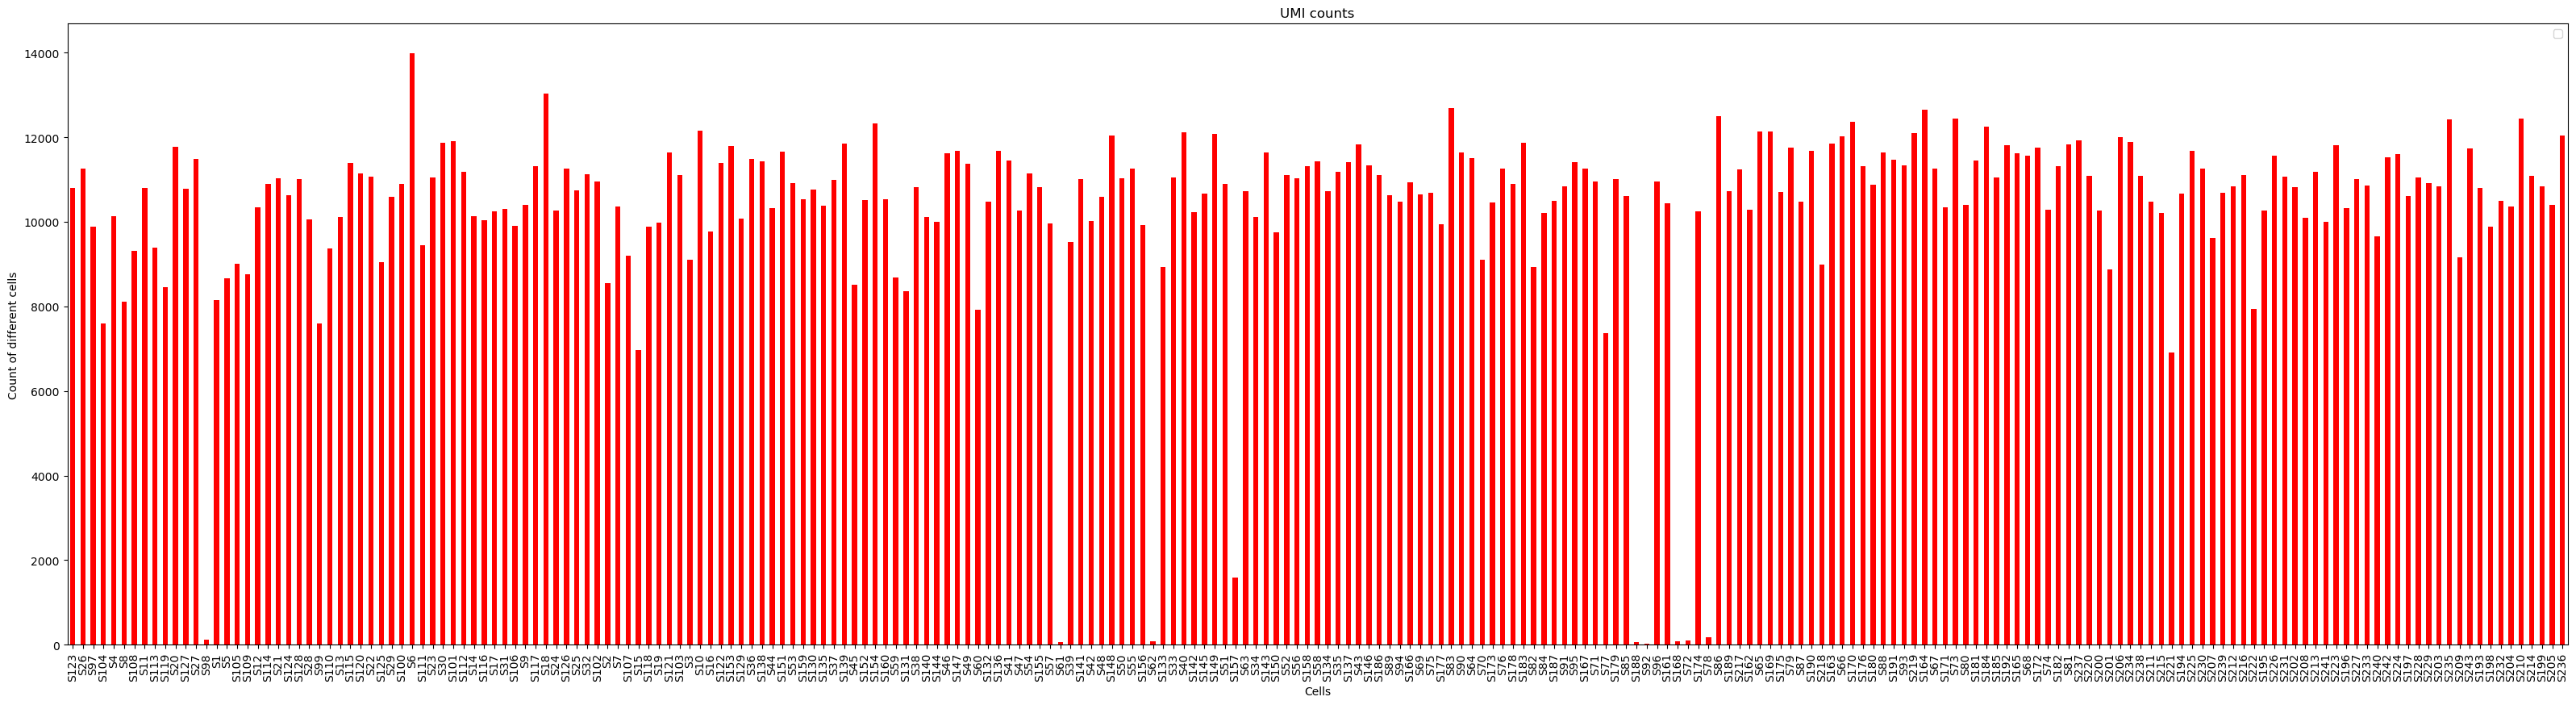

In [15]:
# UMI counts is the number of different genes in the dataset
UMI = {}
for x in H_Smart_unfil.columns:
    UMI[f'{x}'] = 0
for x in H_Smart_unfil.columns:
    temp = H_Smart_unfil[x][H_Smart_unfil[x] != 0]
    UMI[f'{x}'] = len(temp)
UMI_df = pd.Series(UMI)
plt.figure(figsize = (40, 10))
UMI_df.plot(kind = 'bar', color='red')
plt.title('UMI counts')
plt.xlabel('Cells')
plt.ylabel('Count of different cells')
plt.gca().legend([]) 
plt.show()

We can interpret this plot by inferring that the UMI count appears sufficiently uniform, exception made for some cells which exhibit surprisingly low UMI counts. This suggests that some operations in the cleaning steps of our analysis will be performed in order to make this dataset more amenable.

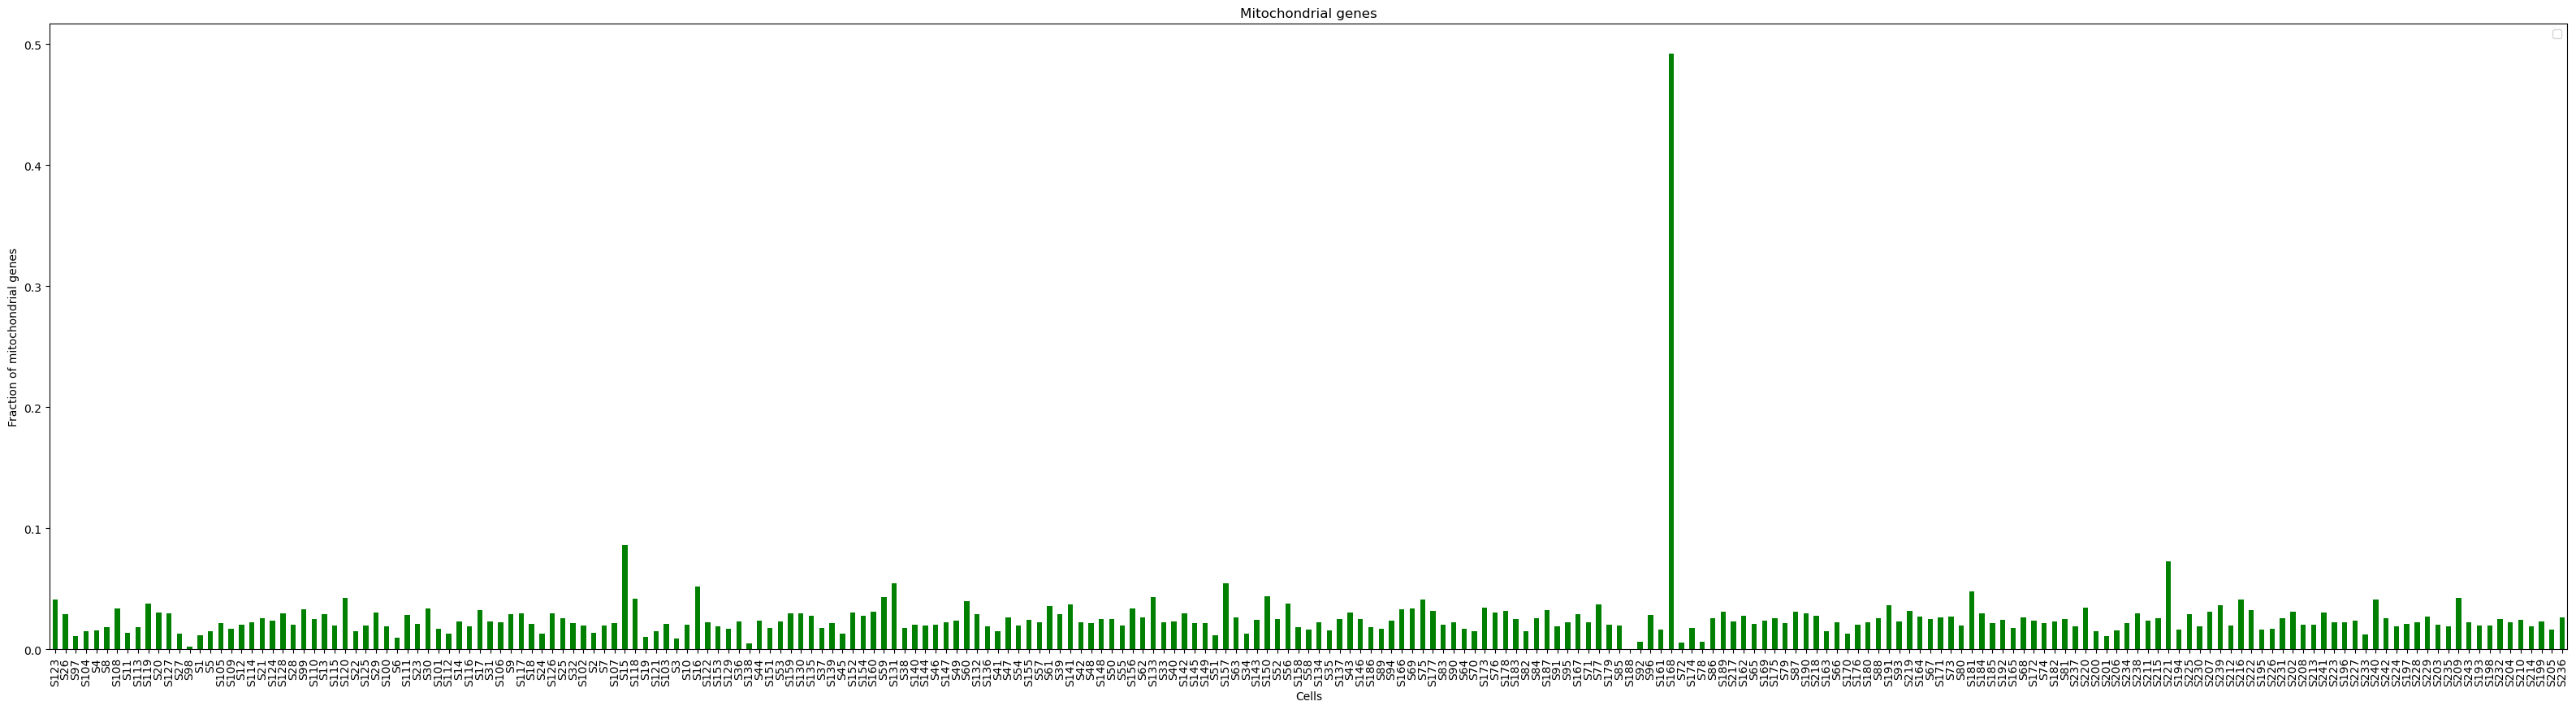

In [16]:
# Fraction of mitocondrial genes is the ratio of the total number of mitocondrial genes over total genes
mt_genes = []
for i in H_Smart_unfil.index.tolist():
    if i[:2] == 'MT':
        mt_genes.append(i)
d = {}
for i in H_Smart_unfil.columns:
    counter = 0
    for j in H_Smart_unfil[i].index.tolist():
        if j in mt_genes:
            counter += H_Smart_unfil.loc[j, i]
    d[i] = counter / H_Smart_unfil[i].sum()

mt = pd.Series(d)
plt.figure(figsize = (40, 10))
mt.plot(kind = 'bar', color='green')
plt.title('Mitochondrial genes')
plt.xlabel('Cells')
plt.ylabel('Fraction of mitochondrial genes')
plt.gca().legend([]) 
plt.show()

Based on the plot, it is evident that the majority of cells exhibit low mitochondrial ratios, indicating that the contribution of mitochondrial gene expression to the overall transcriptome is relatively limited. This finding aligns with expectations, as mitochondrial genes are typically a small fraction of the total gene expression in healthy cells.

However, an exception is observed for a single cell, which exhibits a mitochondrial ratio exceeding 0.05. Since this substantially higher value suggests a potential deviation from the norm for this particular cell, we will deal with this issue in the next steps, regarding Cell Filtering and Data Cleaning.

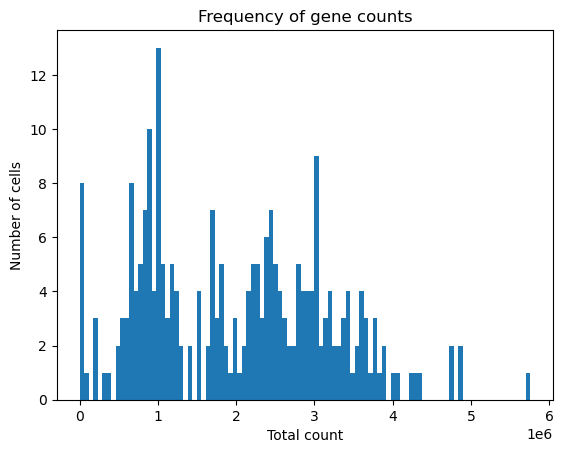

In [17]:
# Let us plot the count per cells
count= H_Smart_unfil.sum()
plt.hist(count, bins= 100)
plt.xlabel('Total count')
plt.ylabel('Number of cells')
plt.title('Frequency of gene counts')
plt.show()

This plot, together with the Count-Depth barplot, provides an alternative representation for the distributions of the total count of genes across cells, bringing further evidence that the gene counts differ significantly from cell line to cell line.

__SKEWNESS__ and __KURTOSIS__

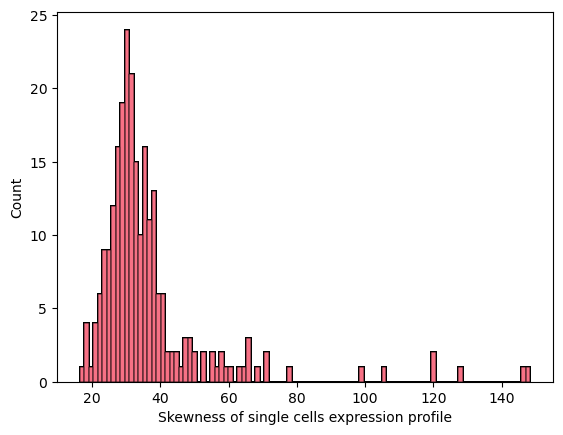

In [18]:
colN = H_Smart_unfil.shape[1]
df_skew_cells = []
for i in range(colN) :     
    v_df = H_Smart_unfil[H_Smart_unfil.columns]
    df_skew_cells += [skew(v_df)]   
sns.histplot(df_skew_cells,bins=100, legend = False)
plt.xlabel('Skewness of single cells expression profile')
plt.show()

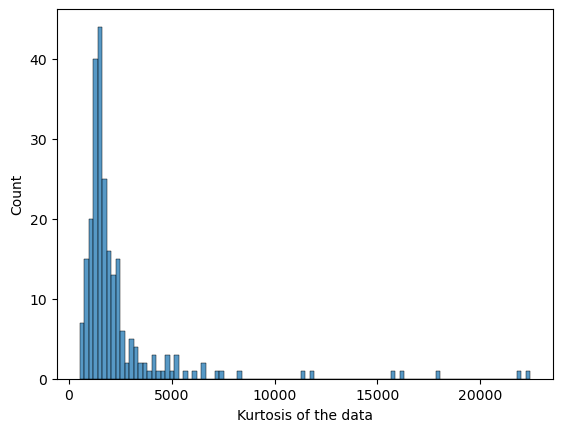

In [19]:
df_kurt_cells = []
for i in range(colN) :     
    v_df = H_Smart_unfil[H_Smart_unfil.columns[i]]
    df_kurt_cells += [kurtosis(v_df)]   
sns.histplot(df_kurt_cells,bins=100)
plt.xlabel('Kurtosis of the data')
plt.show()

The skewness and kurtosis measures are commonly utlilized to assess the normality of a distribution. Skweness quantifies the symmetry of the data distribution, while kurtosis measures the thickness of the tails.

Firstly, the skewness plot indicates that the distribution of the cells is characterized by a *lack of symmetry*, specifically displaying that majority of the data is concentrated towards the right and that there is a tail on the right side.

Additionally, the kurtosis analysis reveals that all cells exhibit *positive kurtosis*. This indicates that the tails of the distribution for each cell are thicker or fatter than those of a normal distribution. A positive kurtosis may imply that the dataset contains a greater proportion of extreme values or outliers in the tails compared to a normal distribution.

Taken together, these findings suggest that the data distribution of the cells deviates significantly from a normal distribution.

**OUTLIER DETECTION**

**OUTLIER DETECTION**

We have already pointed out a heavy presence of outliers in our dataset, especially enhanced by the high frequency of zeros. We try to provide an immediate way to detect outliers in a dataset with boxplots; however, the large dimension of the dataset does not make boxplots a powerful instrument other than giving an insight.

Our aim is to identify outliers in samples and in features.

Outliers in samples refer to cells within the dataset that exhibit unusually high or low values compared to other cell, given expression patterns that deviate significantly from the majority of cells.

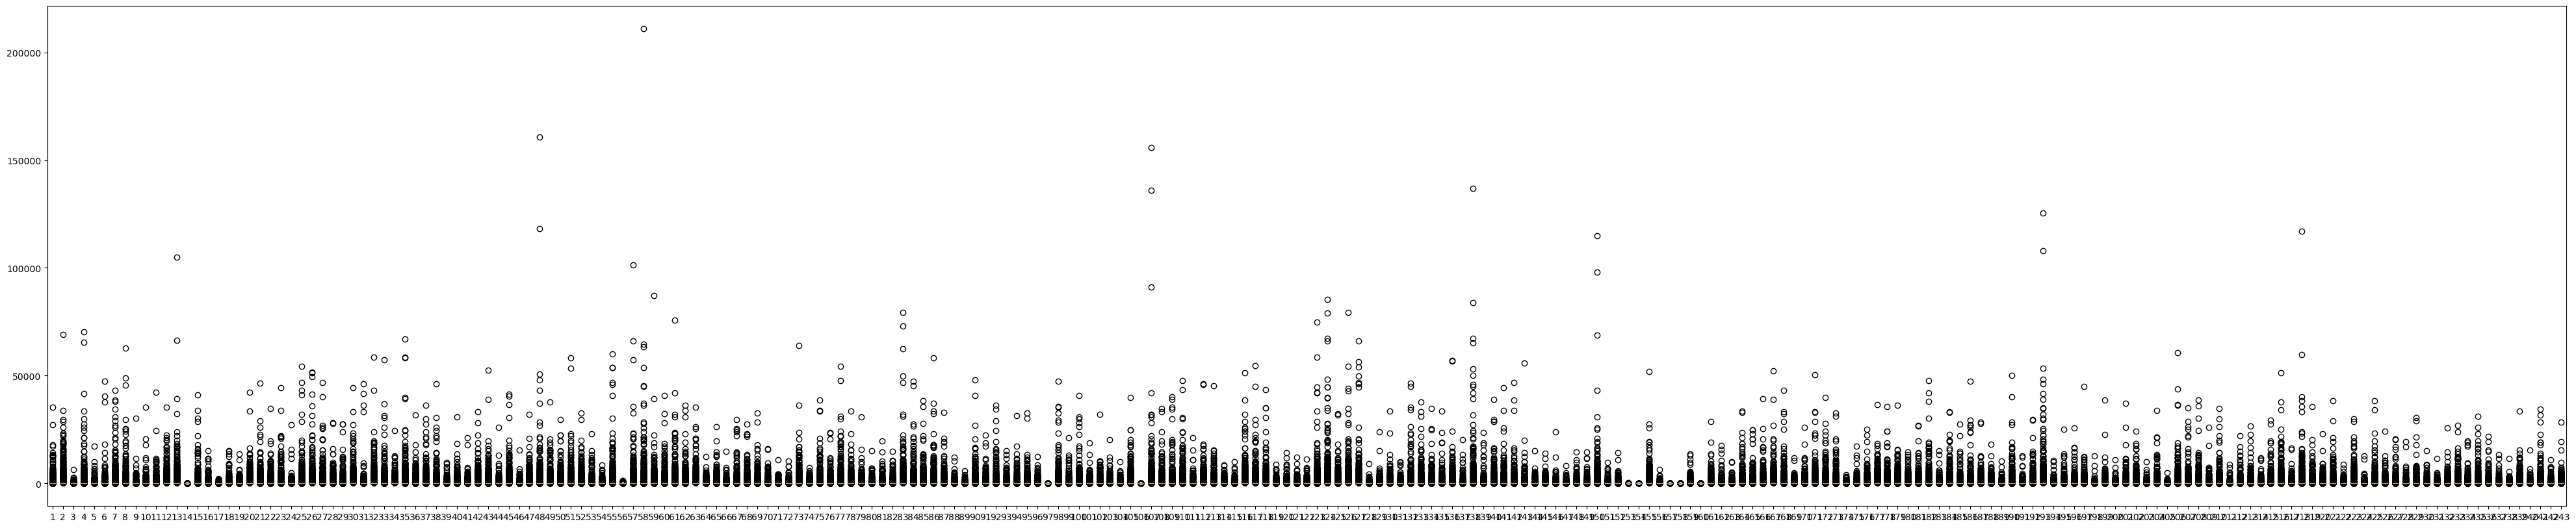

In [20]:
plt.figure(figsize=(50, 10))
plt.boxplot(H_Smart_unfil);

On the other hand, outliers in features refer to specific genes within the dataset that display exceptional expression patterns compared to other genes. We notice that this is the case of some genes that have remarkably different expression patterns.

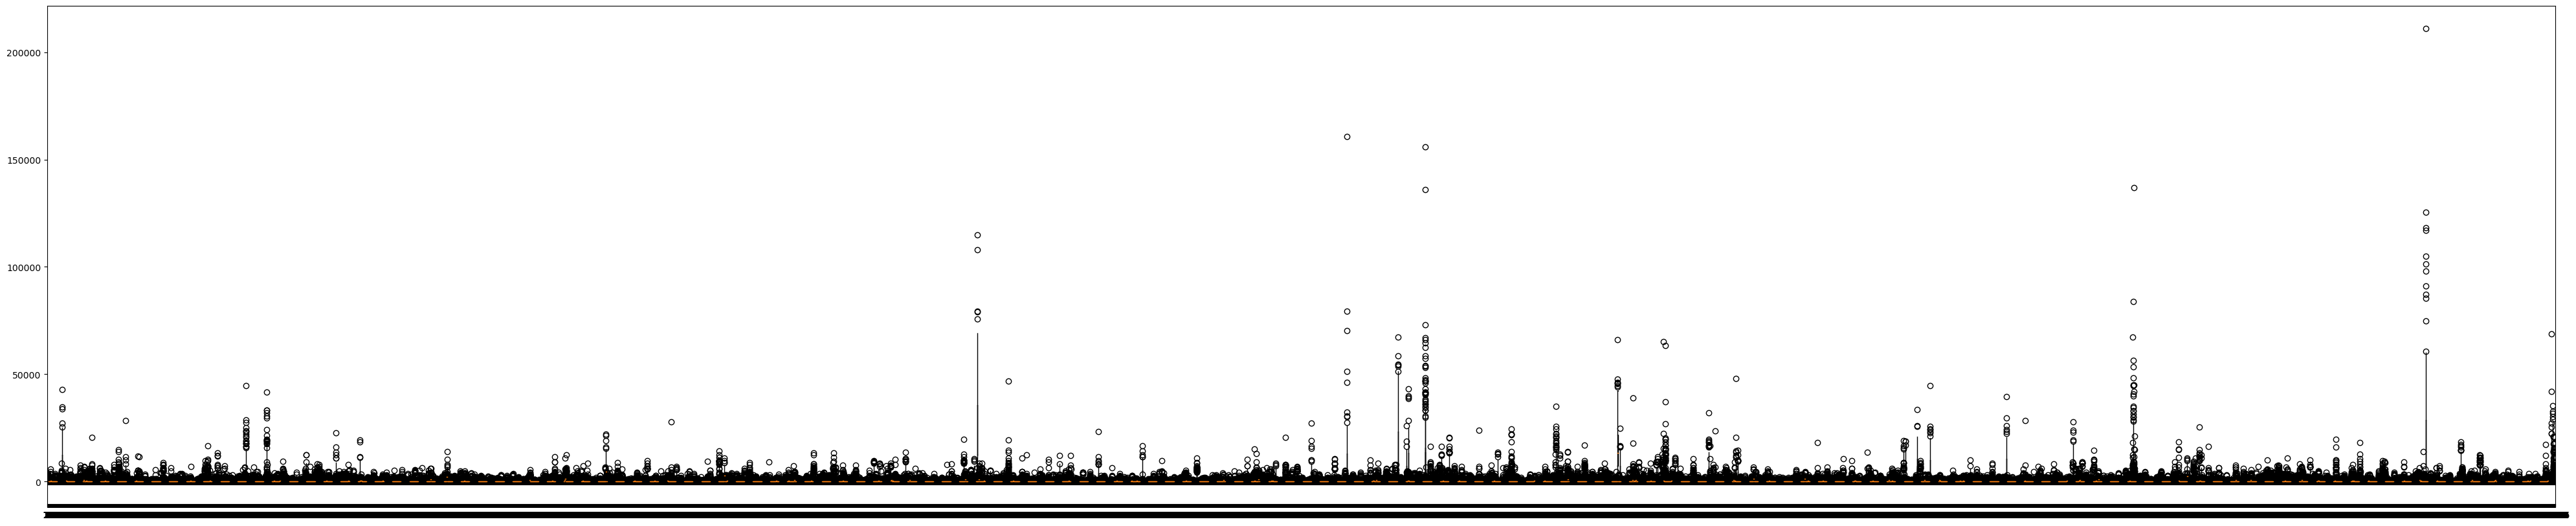

In [21]:
plt.figure(figsize=(50, 10))
plt.boxplot(H_Smart_unfil.T);

We can detect outliers and anomalies through the use of a Isolation Forest:

In [22]:
isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(H_Smart_unfil)
outl= H_Smart_unfil.iloc[outlier_pred==-1]
outl

S123    S26  S97  S104    S4    S8   S108   S11  S113  S119  ...  \
MTCO1P12   1740   2340   22  1020   303   587   2572  1004   443   779  ...   
MTATP6P1    974   1642    8   653    91   161   1242   438   171   507  ...   
NOC2L       285    474   77  1987   162     0    955   648   298     9  ...   
ISG15       256    897   17   919   126   247    267   530   266   121  ...   
SDF4        155    376   51   436   112   311     89   426   162   112  ...   
...         ...    ...  ...   ...   ...   ...    ...   ...   ...   ...  ...   
MT-ND4L    6060   4281   82  1076   279   561   4615  1208   406  1418  ...   
MT-ND4    17732  15624  200  6588  1028  1768  14891  4139  1738  5964  ...   
MT-ND5     3852   7457   93  1479   303   650   6533  1271   589  1574  ...   
MT-ND6      900   1439   12   234    33    79   1281   250    65   331  ...   
MT-CYB     4208   6491   25  4819   310   695   2885  1552   366  1829  ...   

          S243  S193  S198  S232  S204  S210  S214  S199  S205  S236  
MTCO1P12   639   790   644   386   297   961   372  1128   258   980  
MTATP6P1   422   496   253   171   213   642   175   638   162   467  
NOC2L      581   860   156   205   360  1352   166   558   522   286  
ISG15      146   346   180    72    42  1142    40   394    58   275  
SDF4       375   535   100   140    95   496    41   439   328   134  
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
MT-ND4L   1450  1393   770   495   442  1977   441  2171   451  1621  
MT-ND4    4121  3447  2571  1779  1395  6273  1446  7026  1201  5341  
MT-ND5    1362  1993   884   746   555  2926   688  2999   611  2460  
MT-ND6     310   344   163   119    53   423   114   486    75   513  
MT-CYB    1119  1429   808   999   916  3719   984  2256   981  2039  

[2115 rows x 243 columns]

Next, let us turn our attention to the study of the **correlation** between features in the dataset:

Next, let us turn our attention to the study of the **correlation** between features in the dataset:

Firstly, we investigate whether the dataset contains **duplicate features**:

In [23]:
dup_cols = H_Smart_unfil.T[H_Smart_unfil.T.duplicated(keep=False)]
if dup_cols.shape[0] > 0:
    print(f"There are {dup_cols.shape[0]} duplicate columns:\n\n{dup_cols}")
else:
    print("No duplicate columns found")

No duplicate columns found


In [24]:
dup_rows= H_Smart_unfil[H_Smart_unfil.duplicated(keep=False)]
print(f"There are {dup_rows.shape[0]} duplicate genes: \n\n{dup_rows}")

There are 89 duplicate genes: 

           S123  S26  S97  S104  S4  S8  S108  S11  S113  S119  ...  S243  \
MMP23A        0    0    0     0   0   0     0    0     0     0  ...     0   
LINC01647     0    0    0     0   0   0     0    0     0     0  ...     0   
LINC01361     0    0    0     0   0   0     0    0     0     0  ...     0   
ITGA10        0    0    0     0   0   0     0    0     0     0  ...     0   
RORC          0    0    0     0   0   0     0    0     0     0  ...     0   
...         ...  ...  ...   ...  ..  ..   ...  ...   ...   ...  ...   ...   
ENPP7         0    0    0     0   0   0     0    0     0     0  ...     0   
DTNA          0    0    0     0   0   0     0    0     0     0  ...     0   
ALPK2         0    0    0     0   0   0     0    0     0     0  ...     0   
OR7G2         0    0    0     0   0   0     0    0     0     0  ...     0   
PLVAP         0    0    0     0   0   0     0    0     0     0  ...     0   

           S193  S198  S232  S204  S210  S2

We observe that no duplicate columns were found, meaning that no two or more columns represent the same or highly similar cell lines.

On the other hand, the presence of duplicate rows implies that there exist genes with identical or highly similar expression patterns across all cell lines. This is an issue that needs to be carefully considered in our analysis, since the presence of duplicate rows can introduce noise, inflate statistical significance or obscure true biological patterns.

__CORRELATION BETWEEN GENE EXPRESSION PROFILES OF CELLS__

Number of cell lines plotted: (100, 100)


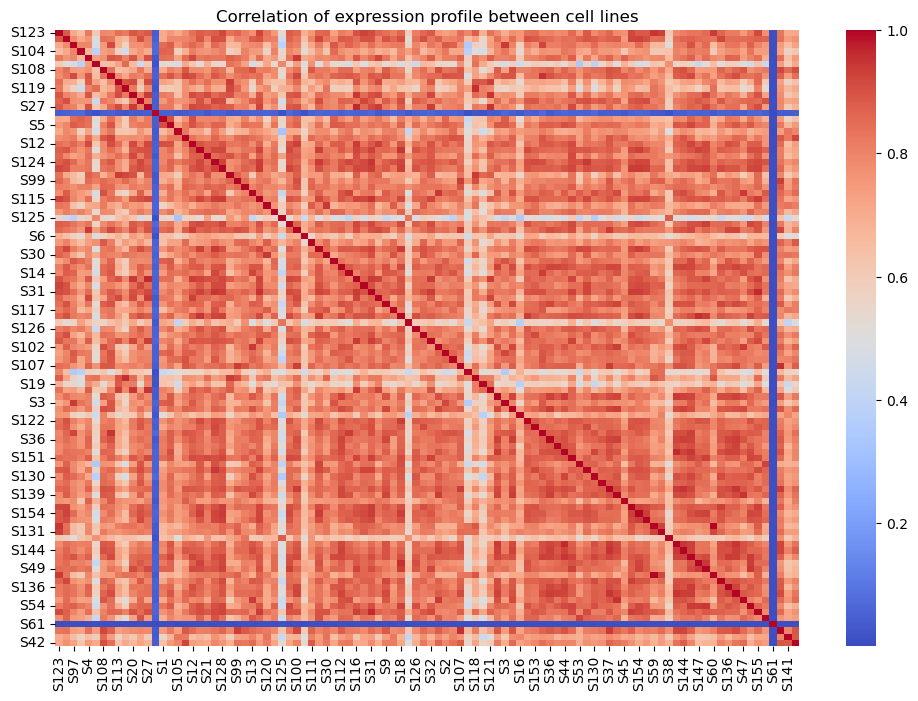

In [25]:
plt.figure(figsize = (12,8))
plt.title('Correlation of expression profile between cell lines')
sns.heatmap(H_Smart_unfil.iloc[:, :100].corr(), cmap = 'coolwarm', fmt ='.01f');
print(f"Number of cell lines plotted: {H_Smart_unfil.iloc[:, :100].corr().shape}")

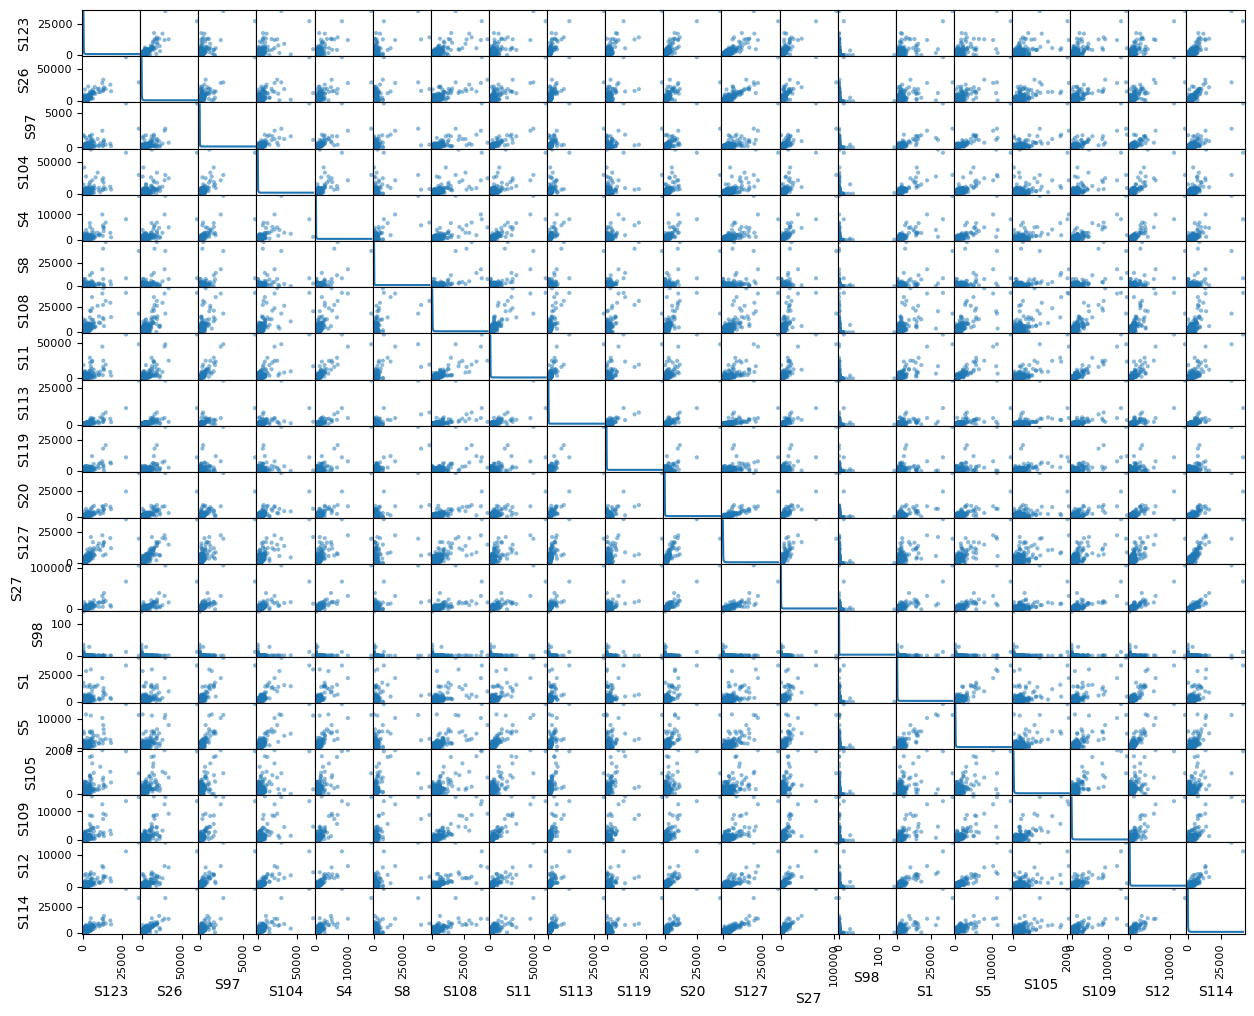

In [26]:
sm = scatter_matrix(H_Smart_unfil.iloc[:,:20], diagonal = 'kde',figsize = (15,12))

Both the correlation matrix and the scatter matrix are useful tools to measure the strength and the direction of the linear relationship between pairs of cell lines.

From both plots, it is evident that the dataset exhibits a high correlation coefficient among its variables. However, this correlation may not be easily visible in the scatter plot due to the sparse nature of the dataset.

The presence of correlated data suggests the utilization of Principal Component Analysis later on in our analysis as a suitable approach for model development.


This can be seen also with a histogram, which displays how frequently high and low correlation occurs between different cell lines' expressions.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


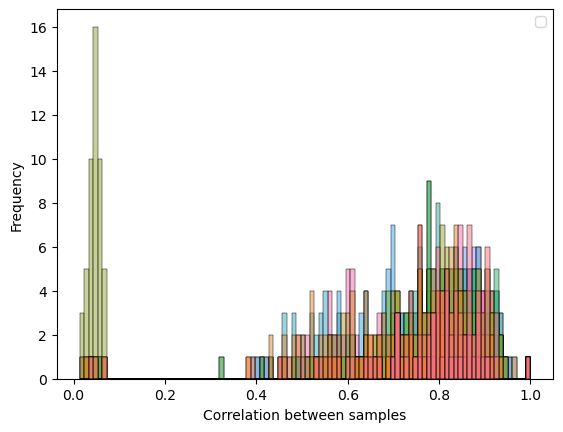

In [27]:
sns.histplot(H_Smart_unfil.iloc[:, :50].corr(), bins=100)
plt.xlabel("Correlation between samples")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.show()

Considering the nature of our dataset, this result is not much surprising. Indeed, we expect cells to share part of their genomic expression due to the presence of genes that are necessary for basic cellular functions, while certain genes may be uniquely characteristic of specific cell types or conditions.

Intuitively, this means that genes with limited or no expression in normal conditions may only be activated under specific circumstances (such as different oxygen levels).

It is convenient to dig deeper into it: after setting a threshold of 0.03 on the mean correlation, we select the samples that appear to be the least correlated with the rest of the dataset and check whether they undiscover any remarkable feature:

It is convenient to dig deeper into it: after setting a threshold of 0.03 on the mean correlation, we select the samples that appear to be the least correlated with the rest of the dataset and check whether they undiscover any remarkable feature:

In [28]:
unfil_c= H_Smart_unfil.corr()
non_corr= unfil_c.columns[(unfil_c.abs().mean() < 0.3)]
print(f"The mean correlation value, on average, is {unfil_c.describe().T['mean'].mean()}")
print("Correlation threshold: 0.3")
print(f"There are {len(non_corr)} cell lines with lower correlation than the threshold:\n\n{non_corr.tolist()} ")

The mean correlation value, on average, is 0.7415974004285172
Correlation threshold: 0.3
There are 9 cell lines with lower correlation than the threshold:

['S98', 'S61', 'S62', 'S157', 'S188', 'S92', 'S168', 'S72', 'S78'] 


In [29]:
H_Smart_unfil[non_corr.tolist()]

S98  S61  S62  S157  S188  S92  S168  S72  S78
WASH7P      0    0    0     0     0    0     0    0    0
CICP27      0    0    0     0     0    0     0    0    0
DDX11L17    0    0    0     0     0    0     0    0    0
WASH9P      0    0    0     0     0    0     0    0    0
OR4F29      0    0    0     0     0    0     0    0    0
...       ...  ...  ...   ...   ...  ...   ...  ...  ...
MT-TE       0    0    0   804     0    0     0    0    0
MT-CYB      0    0    0    67     0    0     0    0    0
MT-TT       0    0    0    27     0    0     0    0    0
MT-TP       0    0    0   409     0    0     0    0    0
MAFIP       0    0    0     0     0    0     0    0    0

[23396 rows x 9 columns]

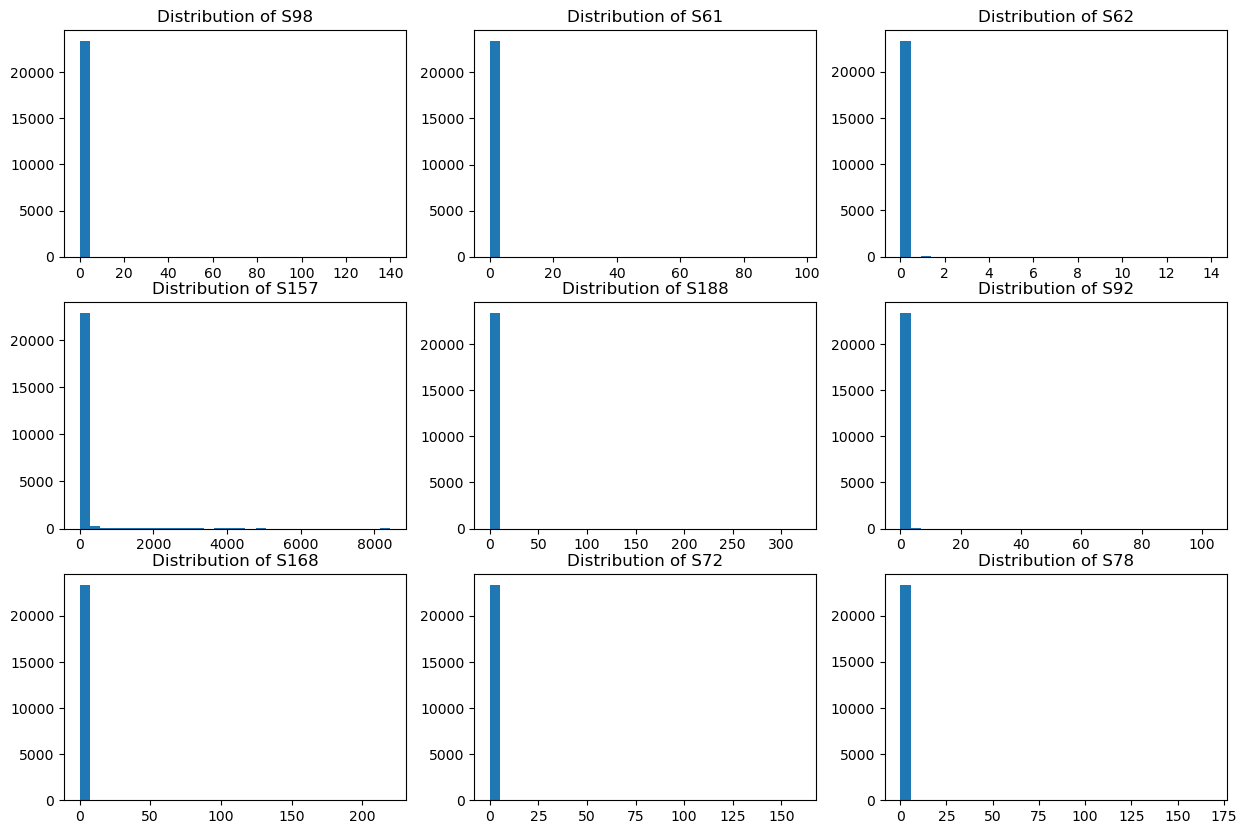

In [30]:
fig, axes= plt.subplots(3,3, figsize=(15,10))
for i, x in enumerate(non_corr.tolist()):
    ax= axes[i//3, i%3]
    ax.hist(H_Smart_unfil[x], bins=30)
    ax.set_title(f"Distribution of {x}")

It is evident that all the least correlated samples have one characteristic in common: they share a high zero count and very low expression levels. This limited gene expression can result in unique or specific patterns that are distinct from other cell lines.

__CORRELATION BETWEEN THE EXPRESSION OF DIFFERENT GENES__

In the previous analysis, we focused on the comparison of the gene expression profiles of different cell lines, in order to measure the degree of similarity in their expression patterns.

Now, we analize correlation from a different perspective: we aim to examine the relationship between the expression levels of individual genes within a particular cell line, which can help us identify co-expression patterns or dependencies within the specific cell line.

Number of Genes plotted: (500, 500)


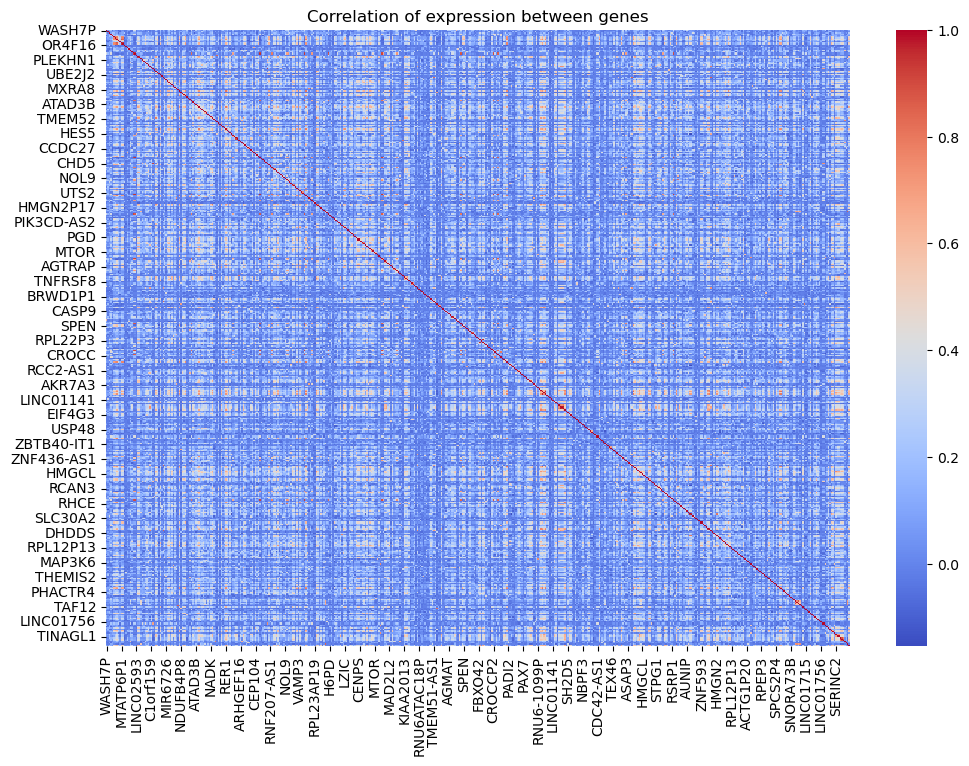

In [31]:
plt.figure(figsize = (12,8))
plt.title('Correlation of expression between genes')
sns.heatmap(H_Smart_unfil.T.iloc[:, :500].corr(), cmap = 'coolwarm', fmt ='.01f');
print(f"Number of Genes plotted: {H_Smart_unfil.T.iloc[:, :500].corr().shape}")

Here it is displayed a heatmap of the first 500 features' correlation matrix.

In general, we witness a weak or no linear relationship between the expression levels of the genes. This evidence can be supported by the fact that each cell line has its own unique genetic and environmental factors that contribute to gene expression, leading to cell-line specific expression patterns for different genes across the cell lines

To conclude our preliminary analysis, it is crucial to gain information about our dataset with respect to the __TARGET VARIABLES__:

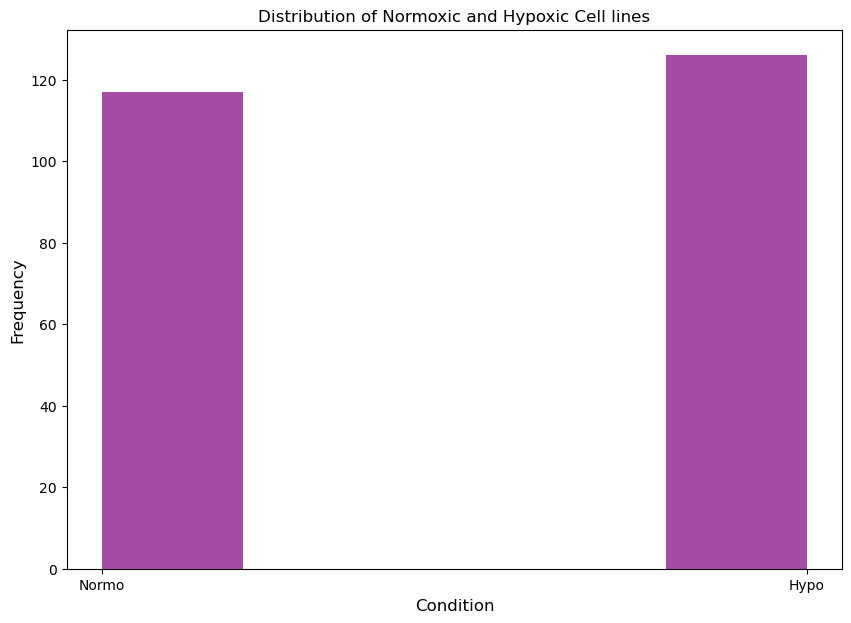

In [32]:
plt.figure(figsize=(10,7))
plt.hist(label, bins=5, color='purple', alpha=0.7);
plt.xlabel('Condition', fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Normoxic and Hypoxic Cell lines")
plt.show()

As we have noticed before, we are dealing with a __balanced__ binary classification problem.
Next, we proceed adding a row to the Data Frame to include the labels:

In [33]:
#add a row to the dataset: 'Condition'
H_Smart_unfil_complete = H_Smart_unfil.T.copy()
H_Smart_unfil_complete['Condition'] = label
H_Smart_unfil_complete = H_Smart_unfil_complete.T
H_Smart_unfil_complete

S123    S26   S97  S104    S4    S8  S108   S11   S113   S119  \
WASH7P         0      0     0     0     0     0     0     0      0      0   
CICP27         0      0     0     0     0     0     0     0      0      0   
DDX11L17       0      0     0     0     0     1     0     0      0      0   
WASH9P         0      0     0     0     0     0     0     0      1      0   
OR4F29         2      0     0     0     0     0     1     0      0      0   
...          ...    ...   ...   ...   ...   ...   ...   ...    ...    ...   
MT-CYB      4208   6491    25  4819   310   695  2885  1552    366   1829   
MT-TT         26     62     0    11     4     0    41     9      2      8   
MT-TP         66     71     1     3     9    14    91    22      3     30   
MAFIP          0      4     0     7     0     9     0     4      2      0   
Condition  Normo  Normo  Hypo  Hypo  Hypo  Hypo  Hypo  Hypo  Normo  Normo   

           ...   S243  S193  S198  S232   S204   S210   S214  S199   S205  \
WASH7P     ...      0     0     0     0      0      0      0     0      0   
CICP27     ...      0     0     0     0      0      0      0     0      0   
DDX11L17   ...      0     0     0     0      0      0      0     0      0   
WASH9P     ...      0     0     0     0      0      1      0     1      0   
OR4F29     ...      0     0     0     0      0      0      0     0      0   
...        ...    ...   ...   ...   ...    ...    ...    ...   ...    ...   
MT-CYB     ...   1119  1429   808   999    916   3719    984  2256    981   
MT-TT      ...     48    31     3     8      5     42      1    15      6   
MT-TP      ...    119    52    11    22     15     48     18    36      8   
MAFIP      ...      2     0     2     1      1      3      0     2      1   
Condition  ...  Normo  Hypo  Hypo  Hypo  Normo  Normo  Normo  Hypo  Normo   

            S236  
WASH7P         0  
CICP27         0  
DDX11L17       0  
WASH9P         0  
OR4F29         0  
...          ...  
MT-CYB      2039  
MT-TT         34  
MT-TP         79  
MAFIP          5  
Condition  Normo  

[23397 rows x 243 columns]

In [34]:
H_unfil_normo = H_Smart_unfil_complete.T[H_Smart_unfil_complete.T['Condition'] == 'Normo'].T
H_unfil_normo.drop('Condition', axis = 'index', inplace = True)
H_unfil_hypo = H_Smart_unfil_complete.T[H_Smart_unfil_complete.T['Condition'] == 'Hypo'].T
H_unfil_hypo.drop('Condition', axis = 'index', inplace = True)

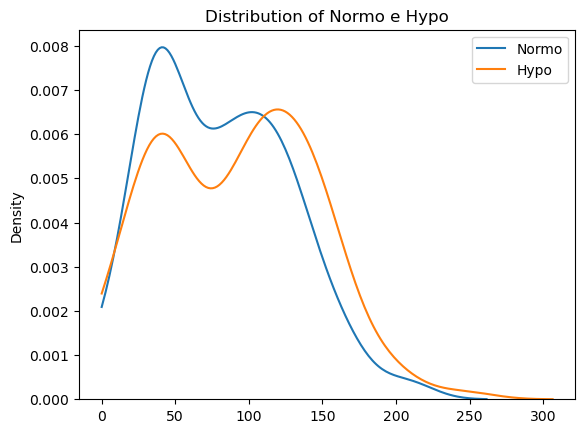

In [35]:
sns.kdeplot(data=H_unfil_normo.mean(), label = 'Normo', clip = [0,500])
sns.kdeplot(data=H_unfil_hypo.mean(), label = 'Hypo', clip = [0,500])
plt.legend()
plt.title('Distribution of Normo e Hypo')
plt.show()

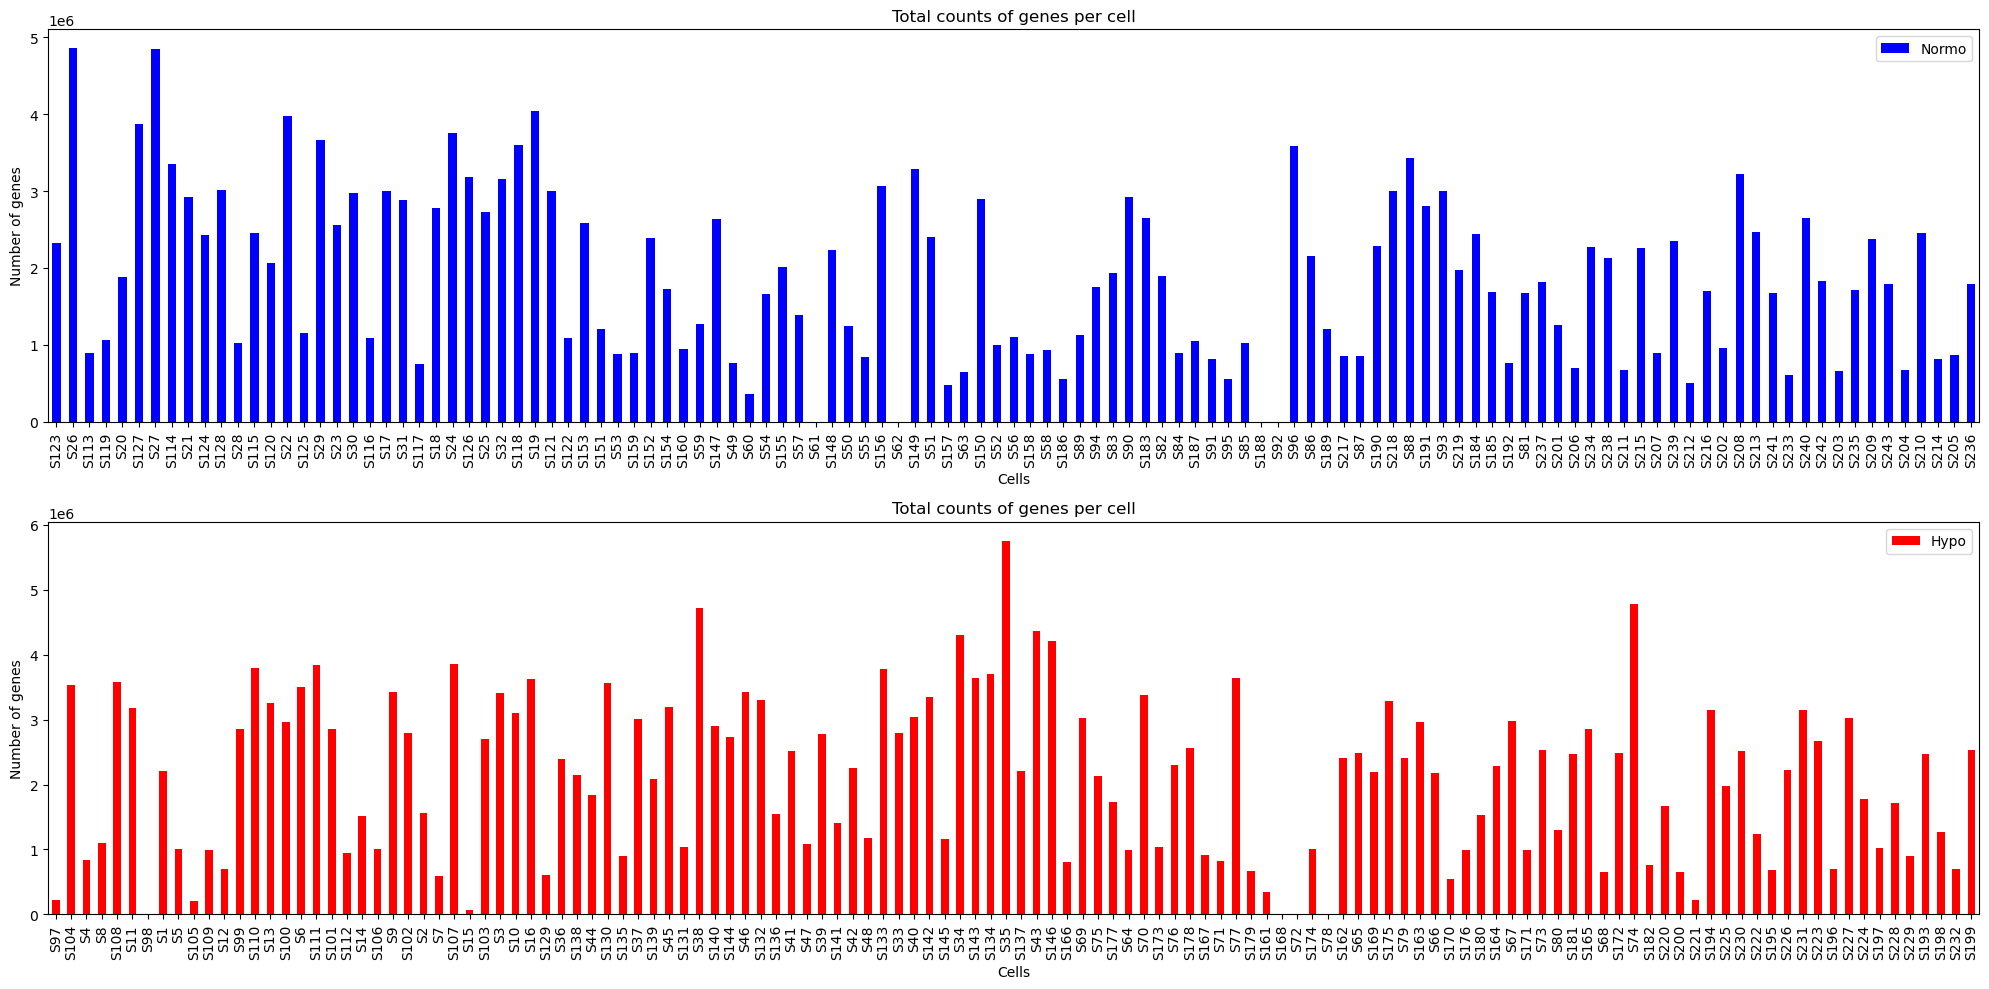

In [36]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

# Plot 1
H_unfil_normo.sum().plot(kind='bar', ax=ax1, color='blue', label = 'Normo')
ax1.set_title('Total counts of genes per cell')
ax1.set_xlabel('Cells')
ax1.set_ylabel('Number of genes')
ax1.legend()

# Plot 2
H_unfil_hypo.sum().plot(kind='bar', ax=ax2, color='red', label = 'Hypo')
ax2.set_title('Total counts of genes per cell')
ax2.set_xlabel('Cells')
ax2.set_ylabel('Number of genes')
ax2.legend()

plt.tight_layout()
plt.show()


It is observed that, in conditions of hypoxia, more genes are expressed compared to normoxic conditions as we can see in previous plots. This difference in gene expression can be attributed to the cellular response to low oxygen levels, which plays a critical role in cellular adaptaton and survival.

There is indeed scientific evidence that, in hypoxic conditions, tumor cells undergo a series of molecular changes to enhance their ability to obtain oxygen and nutriens, often involving the activation of specific genes that are not highly expressed in normoxic conditions.

##### __UNSUPERVISED ANALYSIS__

In order to conclude our EDA, we have decided to perform an Unsupervised Analysis (PCA and Hierarchical Clustering) on the dataset. This additional analysis aims to determine whether the dataset exhibits linear separability, which would suggest the presence of distinct clusters or patterns within the data, and suggesting that certain variables or combinations of variables may be more influential in differentiating thse groups. 

Considering that the results of the EDA did not provide evidence of a high-quality unfiltered dataset but, instead, revealed a consistent presence of noise and outliers, we have concerns about the reliability and suitability of the dataset for further analysis. Therefore, we expect that this check will not provide us remarkable results, but we will have to wait to work with an unfiltered and normalized dataset to recognize effective results.

__PRINCIPAL COMPONENT ANALYSIS__

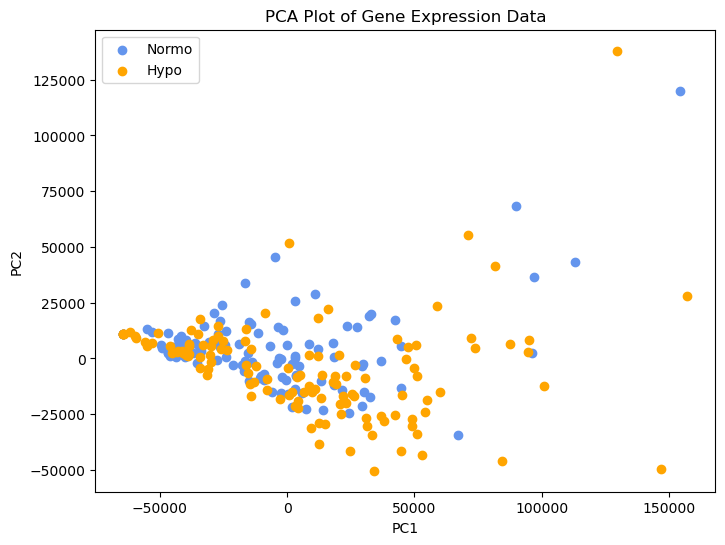

In [37]:
# Perform PCA on the unfiltered dataset
pca = PCA(n_components=2)
pca_result = pca.fit_transform(H_Smart_unfil.T)

# Get condition labels for the samples
conditions = H_Smart_metadata["Condition"]

# Create a PCA plot
plt.figure(figsize=(8, 6))
for condition, color in zip(conditions.unique(), ['cornflowerblue', 'orange']):
    idx = conditions == condition
    plt.scatter(pca_result[idx, 0], pca_result[idx, 1], c=color, label=condition)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot of Gene Expression Data')
plt.show()

We can try again with a three-dimensional plot:

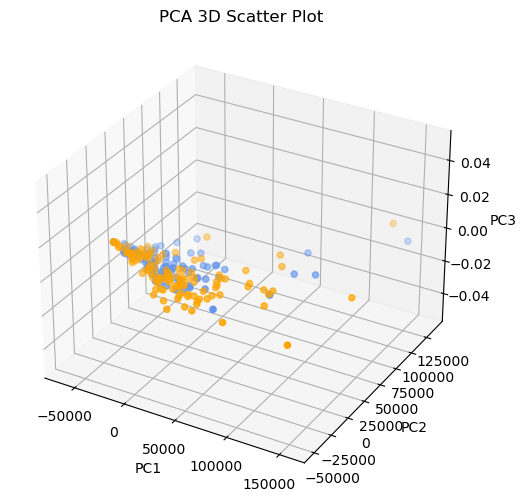

Top 10 contributing genes for PC1: ['FTL', 'ACTB', 'FTH1', 'LDHA', 'GAPDH', 'BEST1', 'KRT19', 'HSPA5', 'MT-CO1', 'ENO1']
Top 10 contributing genes for PC2: ['FTL', 'FTH1', 'BEST1', 'KRT17', 'AKR1C2', 'KRT13', 'KRT6A', 'KRT16', 'SPP1', 'IGFBP3']
Top 10 contributing genes for PC3: ['KRT19', 'FTH1', 'BEST1', 'LDHA', 'KRT17', 'KRT13', 'GAPDH', 'KRT6A', 'MT-CO1', 'ALDOA']


In [38]:
# PCA model with three components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(H_Smart_unfil.T)

conditions = H_Smart_metadata["Condition"]


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for condition, color in zip(conditions.unique(), ['cornflowerblue', 'orange']):
    idx = conditions == condition
    ax.scatter(pca_result[idx, 0], pca_result[idx, 1], c=color, label=condition)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA 3D Scatter Plot')

plt.show()
# Create a DataFrame with the loading scores for each gene
loading_scores = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=H_Smart_unfil.index)

# Find the top 10 contributing genes for each principal component
N = 10 
top_contributing_genes_PC1 = loading_scores.nlargest(N, 'PC1').index
top_contributing_genes_PC2 = loading_scores.nlargest(N, 'PC2').index
top_contributing_genes_PC3 = loading_scores.nlargest(N, 'PC3').index
print(f"Top {N} contributing genes for PC1: {list(top_contributing_genes_PC1)}")
print(f"Top {N} contributing genes for PC2: {list(top_contributing_genes_PC2)}")
print(f"Top {N} contributing genes for PC3: {list(top_contributing_genes_PC3)}")

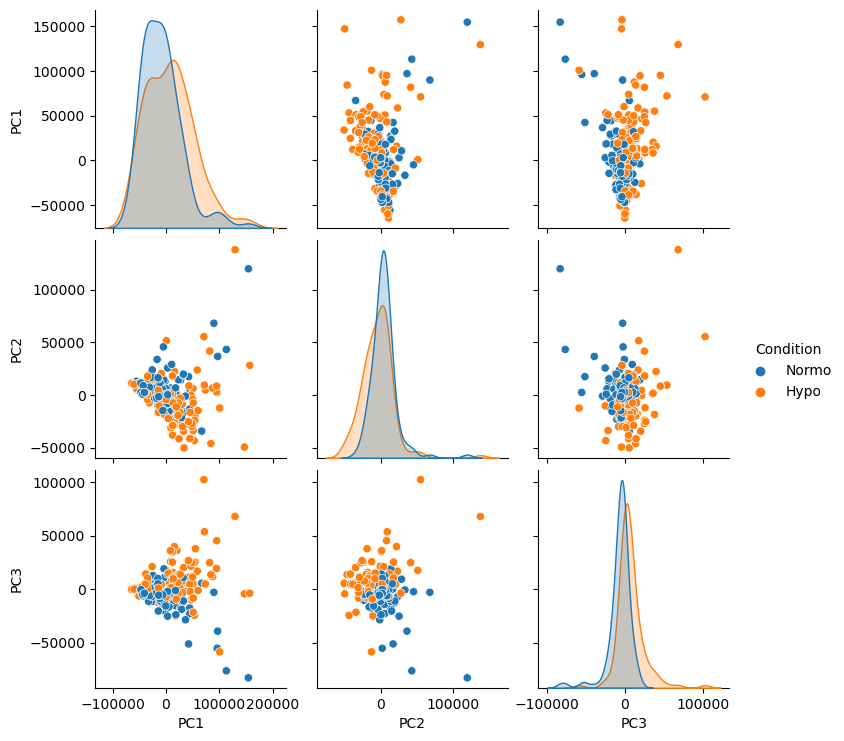

In [39]:
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['Condition'] = H_Smart_unfil.columns.map(H_Smart_metadata['Condition'])
sns.pairplot(pca_df, hue='Condition', vars=['PC1', 'PC2', 'PC3'])
plt.show()

__HIERARCHICAL CLUSTERING__

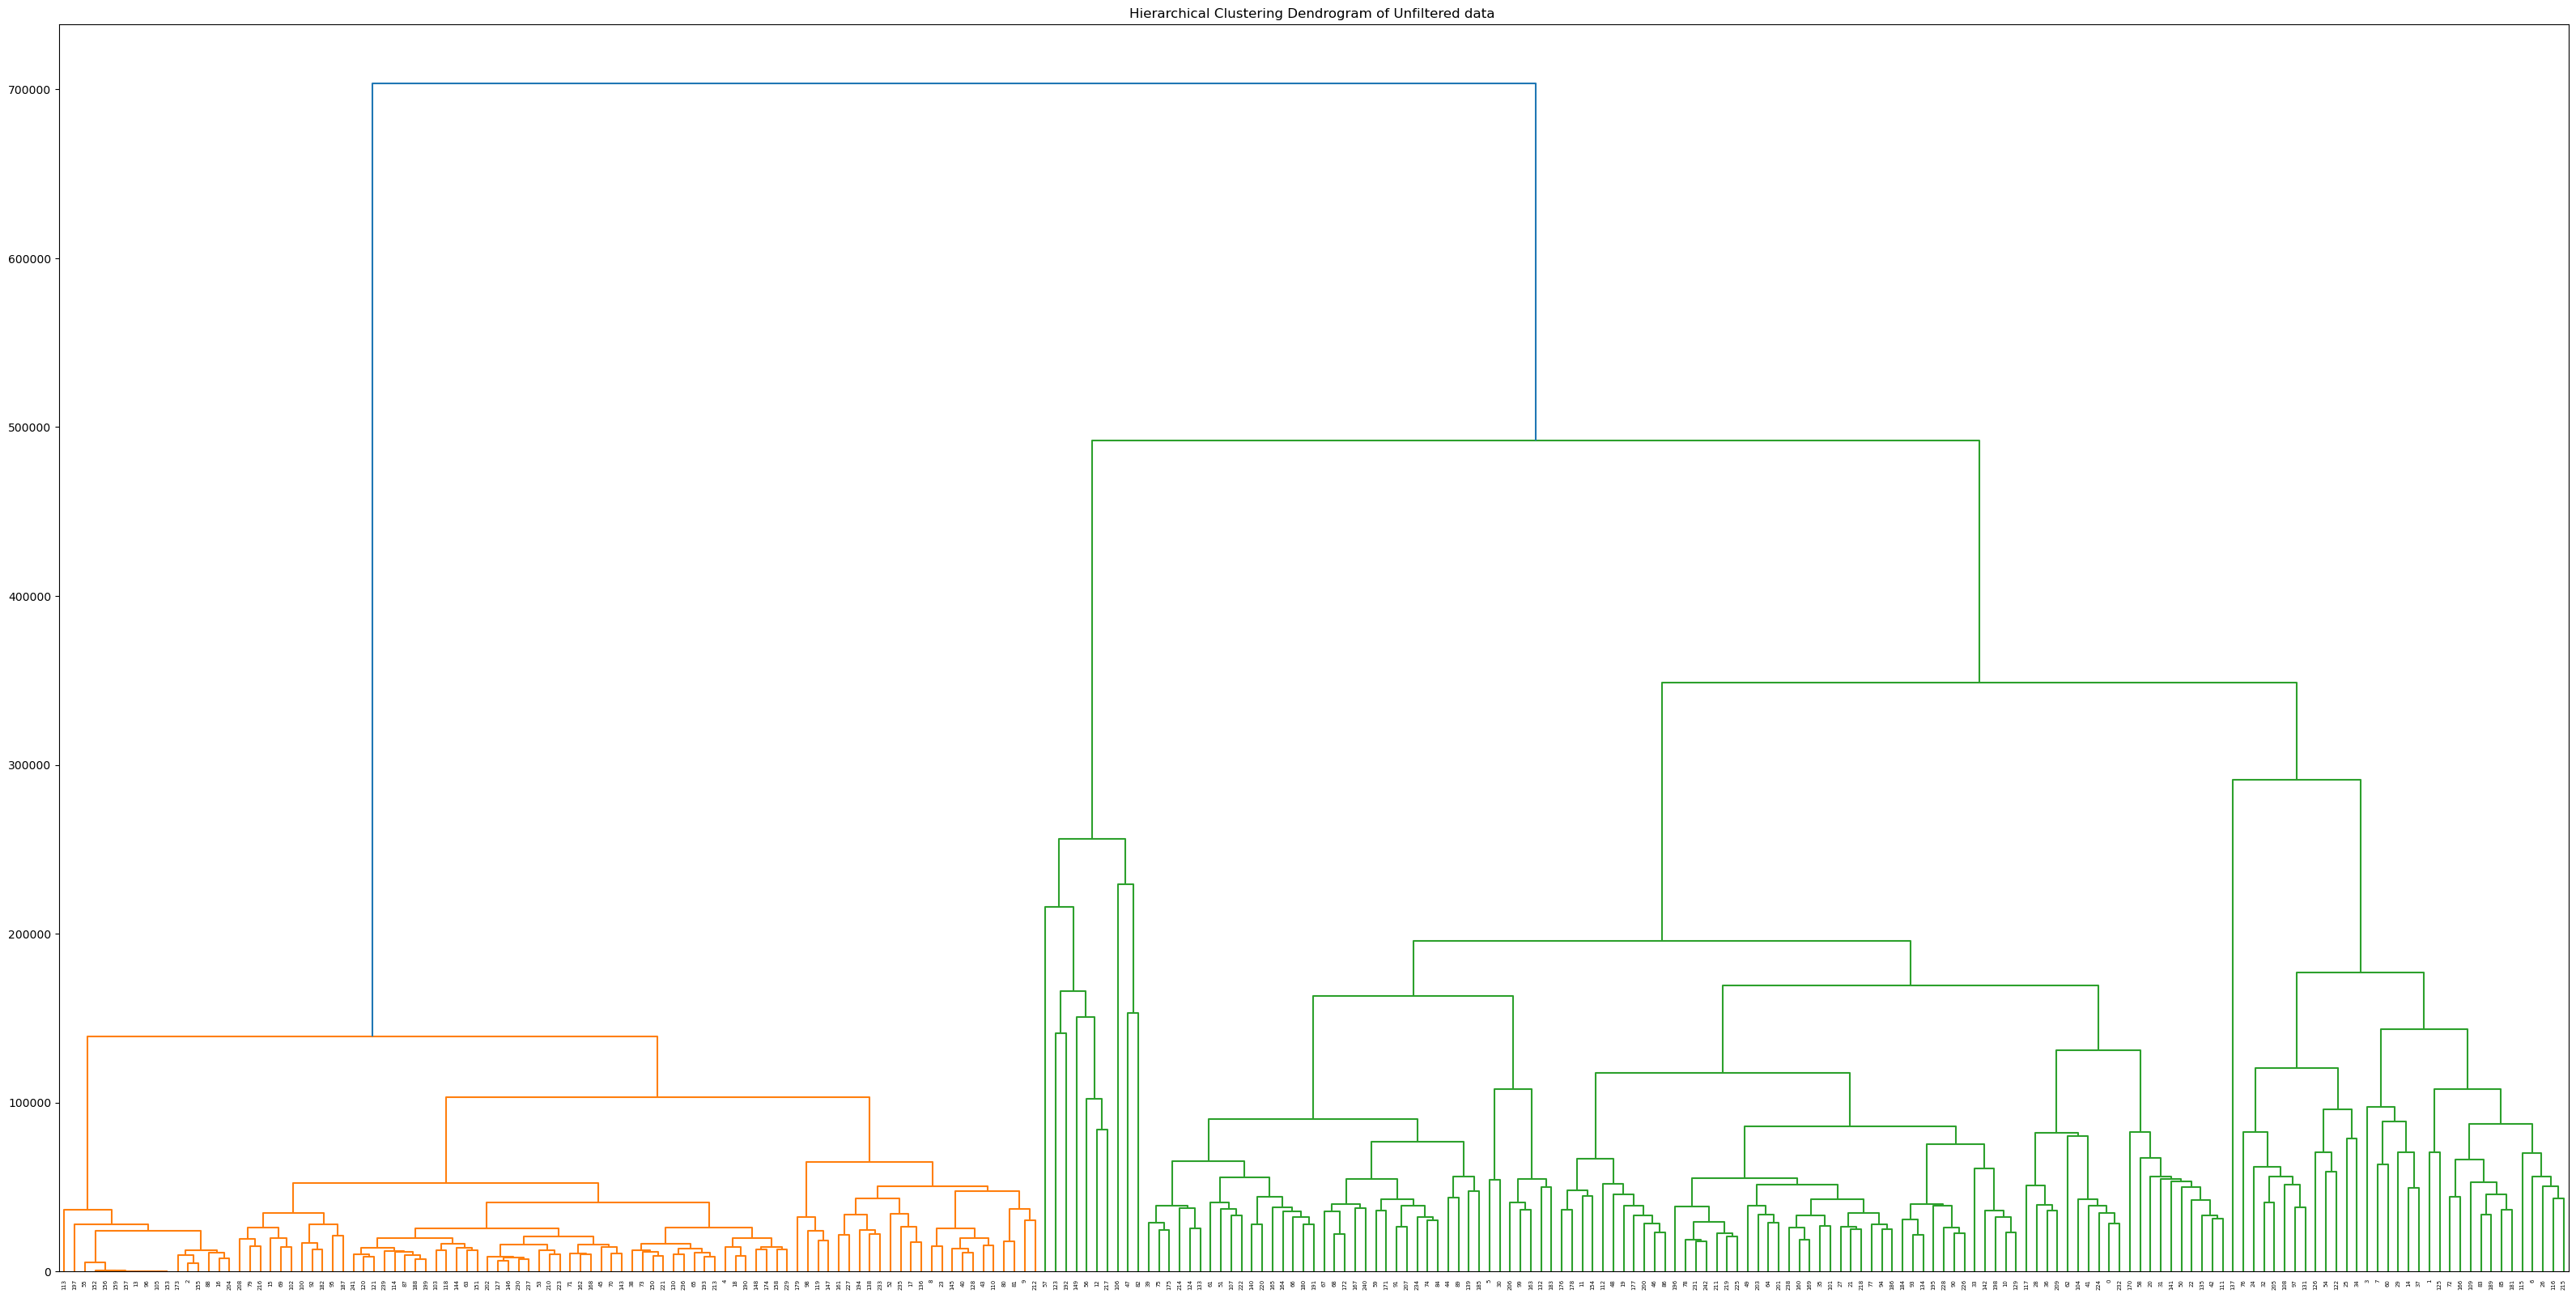

In [40]:
Z1 = linkage(H_Smart_unfil.T, method='ward')
plt.figure(figsize=(40, 20))
plt.title("Hierarchical Clustering Dendrogram of Unfiltered data ")
dendrogram(Z1);

In [41]:
label_series = pd.Series(np.zeros(len(H_Smart_unfil.columns)), index = H_Smart_unfil.columns)
for i in label_series.index:
    if label[i] == 'Normo':
        label_series[i] = int(0)
    if label[i] == 'Hypo':
        label_series[i] = int(1)
label_series = label_series.astype(int)


In [42]:
labels_hier = fcluster(Z1,2, criterion = 'maxclust')

labels_hier = labels_hier -1
counter = 0
First_label = []
Second_label = []
for i in range(len(label_series.to_numpy())):
    if labels_hier[i] == 0:
        First_label.append(counter)
        counter += 1
    elif labels_hier[i] == 1:
        Second_label.append(counter)
        counter += 1

In [43]:
counter1 = 0
counter2 = 0
for i in label_series[label_series == 0].index:
    for j in First_label:
        if i == j:
            counter1 += 1
    for w in Second_label:
        if i == w:
            counter2 += 1
counter1, counter2

(0, 0)

In [44]:
counter1 = 0
counter2 = 0
for i in label_series[label_series == 1].index:
    for j in First_label:
        if i == j:
            counter1 += 1
    for w in Second_label:
        if i == w:
            counter2 += 1
counter1, counter2

(0, 0)

## Data Cleaning and Quality Control

## Data Cleaning and Quality Control

Preprocessing in RNA-Seq analysis plays a critical role in ensuring the quality and reliability of the obtained gene expression data. It encompasses several essential steps, including *data cleaning*.

Data cleaning involves removing low-quality samples, outliers or problematic cells, ensuring that the data used for analysis is of high quality and free from technical biases, in order to be biologically meaningful.


In an initial step of our analysis, considering that the ultimate goal of this research is stightly connected with the 'Hypo'/'Normo' dualization of the dataset, we considered performing cell filtering on a dataset where hypoxic and normoxic cells are split separately.

In the end, we realized that this approach could have led us to the loss of important information, as filtering cells separately may eliminate certain cells that could have provided valuable insight to the overall understanding of the data. Moreover, applying different filtering criteria or thresholds to hypo and normo cells could introduce inconsistencies and biases in the data, and may lead us to ignore potential dependencies or relationships between the two groups.

By filtering the entire dataset collectively, we aim to achieve an increased sample size available for statistical analyses and modelling.

The main matrix we will use as a reference of the quality of our cleaning are three as we previously said:
- Count Depth
- UMI counts
- Fraction of mithocondrial genes

### __Cell Filtering__


### __Cell Filtering__

#### Step 1: Outliers detection
Considering the sparsity of our dataset, it is crucial to approach the handling of outliers with caution and delicacy. As we have noticed, since the majority of the genes have zero expression values, the interquartile range, which is commonly used to identify outliers in dense datasets, may not effectively capture the distribution of the expressed genes.

Additionally, it is important to note that the expressed genes, although representing a minoritu compared to the large number of zero, carry valuable information. Therefore, discarding these genes indiscriminately could result in the loss of crucial insights.



In this section, we will try to carefully handle this issue by performing cell filtering based on the total counts of genes in order to identify potential outliers. To assess the presence of atypical cells, we will examine the histogram of the total counts per cell, which allows us to identify cells that deviate significantly from the majority.

In particular, we will focus on two types of atypical cells:
- Dead cells, that typically have low gene expression due to degradation or lack of cellular activity
- Cells with compromised membranes or doublets, which are characterised by abnormally high gene expression levels.

In [45]:
adata = sc.AnnData(H_Smart_unfil.T) # Just transforming into a dataset readable by scanpy

In [46]:
# Calculate the total counts per cell
adata.obs['n_counts']  = adata.X.sum(axis=1)

# Calculate skewness and kurtosis
adata_skewness = skew(adata.obs['n_counts'])
adata_kurtosis = kurtosis(adata.obs['n_counts'])

Here we computed the skewness and the kurtosis to try to make our dataset more symmetric and similar to a normal distribution by adjusting the parameters since the dataset has a lot of variables and by the law of large numbers the distribution of each cell can converge to a normal distribution

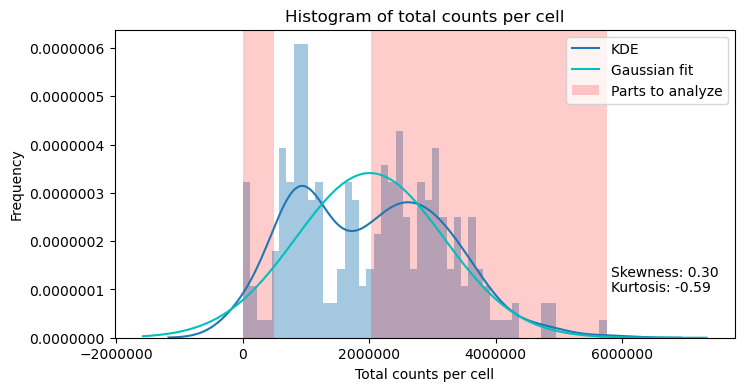

Estimated peak of counts: 2023939.9672439245


In [47]:
fig, ax = plt.subplots(figsize=(8, 4))
# Fit a Gaussian distribution to the counts
mu, std = norm.fit(adata.obs['n_counts'])

# Plot the histogram of counts and the fitted Gaussian distribution
sns.distplot(adata.obs['n_counts'], bins=50, kde_kws={'label': 'KDE'})
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
peak = x[p.argmax()]
sns.lineplot(x=x, y=p, color='c', label='Gaussian fit')

# Add skewness and kurtosis
plt.annotate(f'Skewness: {adata_skewness:.2f}', xy=(0.80, 0.2), xycoords='axes fraction', fontsize=10)
plt.annotate(f'Kurtosis: {adata_kurtosis:.2f}', xy=(0.80, 0.15), xycoords='axes fraction', fontsize=10)

plt.xlabel('Total counts per cell')
plt.ylabel('Frequency')
plt.title('Histogram of total counts per cell')

# Add shaded region from peak to maximum count value
plt.axvspan(xmin=peak, xmax=adata.obs['n_counts'].max(), facecolor='red', alpha=0.2, label = "Parts to analyze")
plt.axvspan(xmin=0, xmax=500000, facecolor='red', alpha=0.2)
plt.legend()
# Format so that scientific notation is not used
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
ax.ticklabel_format(style='plain')

plt.show()
print("Estimated peak of counts:", peak)

The KDE plot provides valuable insights into the distribution of gene expression values in a dataset.

One noticeable observation from the KDE plot is the presence of a bimodal distribution, where two distinct peaks are observed. Identifying bimodal distributions or multiple peaks in the KDE provides a clear indication that further quality control operations are necessary, as it suggests the existence either of technical anomalies, of cells that have experienced failure or damage, such as dead cells, cells with compromised membranes, or the presence of cell duplets.

Conversely, high-quality data typically exhibits a unimodal distribution, charachterized by a single prominent peak, indicating that the the majority of samples in the dataset have consistent gene expression patterns and are in  relatively homogenous state.

In order to identify outliers and uninformative cells, we will examine two specific regions of the plot, which are expected to contain such observations:

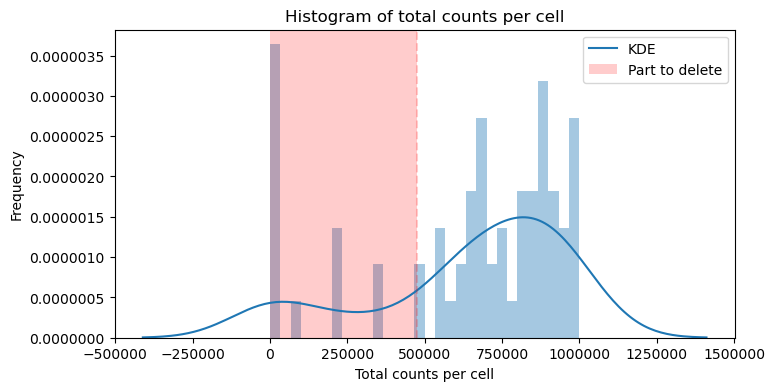

In [48]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.distplot(adata.obs['n_counts'][adata.obs['n_counts']<1000000], kde = True, bins = 30, kde_kws={'label': 'KDE'})
plt.axvline(x=475000, color='r', linestyle='--', alpha = 0.2)
plt.axvspan(xmin=0, xmax=475000, facecolor='red', alpha=0.2, label = "Part to delete")

plt.xlabel('Total counts per cell')
plt.ylabel('Frequency')
plt.title('Histogram of total counts per cell')

# Format so that scientific notation is not used
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
ax.ticklabel_format(style='plain')
plt.legend()

plt.show()
min_cell = 475000

Based on the observed plot, we witness that cells exhibiting a count lower than 475 000 are positioned as outliers in the distribution, as they deviate from the majority of cells.

The presence of such outliers in the lower count range potentially suggests phenomena such as cell debris or cells that have undergone cellular death.



On the upper end of counts, we see a population of cells with high counts shown as a broad peak at 2,023,940 counts.

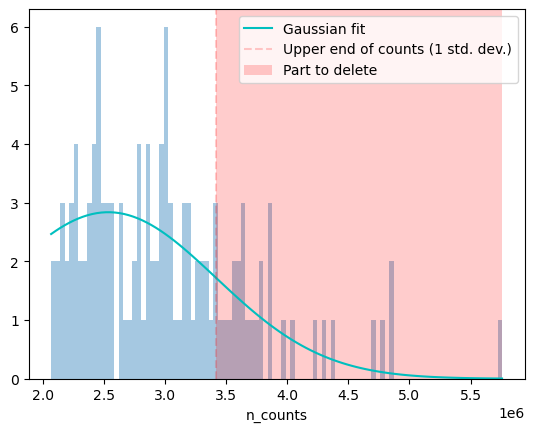

Estimated upper end of counts (2 standard deviations): 3416472.5503895455


In [49]:
# Select cells with counts greater than 2023940
high_count_cells = adata[adata.obs['n_counts'] > 2023940]

# Create histogram of counts
counts_hist, counts_bins = np.histogram(high_count_cells.obs['n_counts'], bins=100)

# Define function for Gaussian distribution
def gaussian(x, mu, sigma, A):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Estimate initial Gaussian parameters from histogram
A_guess = np.max(counts_hist)

# Fit Gaussian to histogram
popt, pcov = curve_fit(gaussian, counts_bins[:-1], counts_hist, p0=[mu, std, A_guess])
# Estimate upper end of counts based on fitted Gaussian
num_std_dev = 1  # Number of standard deviations from the mean
upper_end = popt[0] + num_std_dev * popt[1]
max_count = np.max(high_count_cells.obs['n_counts'])
upper_end = min(upper_end, max_count)

# Create plot of histogram and fitted Gaussian using seaborn
sns.distplot(high_count_cells.obs['n_counts'], bins=100, kde=False)
sns.lineplot(x=np.linspace(counts_bins[0], counts_bins[-1], 100), y=gaussian(np.linspace(counts_bins[0], counts_bins[-1], 100), *popt), color='c', label='Gaussian fit')
plt.axvline(x=upper_end, color='r', linestyle='--', alpha = 0.2, label = "Upper end of counts (1 std. dev.)")
plt.axvspan(xmin=upper_end, xmax=adata.obs["n_counts"].max(), facecolor='red', alpha=0.2, label = "Part to delete")

plt.legend()
plt.show()

print("Estimated upper end of counts (2 standard deviations):", upper_end)
max_cell = upper_end

Upon closer examination of the upper range of counts, a distinct population of cells with high counts becomes apparent, shown as a broad peak at 2023940 counts.

To estimate the boundaries of this population, a Gaussian curve is visually traced around the peak, and the point at which the curve drops below 25% of its maximum value is identified.
This approach allows us to estimate this subset of cells, characterized by exceptionally high counts, to range until 3416473 counts.

We can thus proceed filtering:

In [50]:
adata_copy = adata.copy()
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata_copy.n_obs))

sc.pp.filter_cells(adata_copy, min_counts = min_cell)
print('Number of cells after min count filter: {:d}'.format(adata_copy.n_obs))

sc.pp.filter_cells(adata_copy, max_counts = max_cell)
print('Number of cells after max count filter: {:d}'.format(adata_copy.n_obs))

Total number of cells: 243
Number of cells after min count filter: 229
Number of cells after max count filter: 199


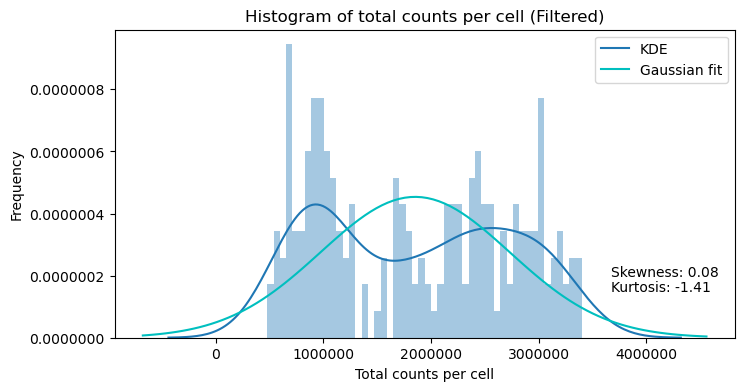

In [51]:
# Calculate new skewness and kurtosis
adata_copy_skewness = skew(adata_copy.obs['n_counts'])
adata_copy_kurtosis = kurtosis(adata_copy.obs['n_counts'])
fig, ax = plt.subplots(figsize=(8, 4))
# Fit a Gaussian distribution to the counts
mu, std = norm.fit(adata_copy.obs['n_counts'])

# Plot the histogram of counts and the fitted Gaussian distribution
sns.distplot(adata_copy.obs['n_counts'], bins=50, kde_kws={'label': 'KDE'})
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
peak = x[p.argmax()]
sns.lineplot(x=x, y=p, color='c', label='Gaussian fit')

# Add skewness and kurtosis
plt.annotate(f'Skewness: {adata_copy_skewness:.2f}', xy=(0.80, 0.2), xycoords='axes fraction', fontsize=10)
plt.annotate(f'Kurtosis: {adata_copy_kurtosis:.2f}', xy=(0.80, 0.15), xycoords='axes fraction', fontsize=10)

plt.xlabel('Total counts per cell')
plt.ylabel('Frequency')
plt.title('Histogram of total counts per cell (Filtered)')

plt.legend()
# Format so that scientific notation is not used
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
ax.ticklabel_format(style='plain')
plt.show()

Following the cell cleaning process, a notable change is observed in the skewness and kurtosis of the gene expression distribution.

The __skewness__ value decreased friom 0.30 to 0.008, indicating a shift towards a more symmetric distribution.

Conversely, the __kurtosis__ value decreased from -0.59 to -1.41, suggesting a transition towards a more platykurtic distribution.

This observed change in skewness and kurtosis aligns with expectations, as the removal of data points from the tails of the distribution would result in a decrease of kurtosis. The distribution becomes less peaked and displays lighter tails.

The shift towards symmetry shown by the decrease in skewness suggests a potential improvement in data quality, indicating a more balanced distribution of gene expression values.

In [52]:
filtered_1_data = adata_copy.to_df()

We can observe the difference between the unfiltered and cell-filtered data by visualizing them in logarithmic plots.

In [53]:
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata_copy.obs['log_counts'] = np.log(adata_copy.obs['n_counts'])

# Calculate skewness and kurtosis
adata_skewness_log = skew(adata.obs['log_counts'])
adata_kurtosis_log = kurtosis(adata.obs['log_counts'])

# Calculate skewness and kurtosis
adata_copy_skewness_log = skew(adata_copy.obs['log_counts'])
adata_copy_kurtosis_log = kurtosis(adata_copy.obs['log_counts'])

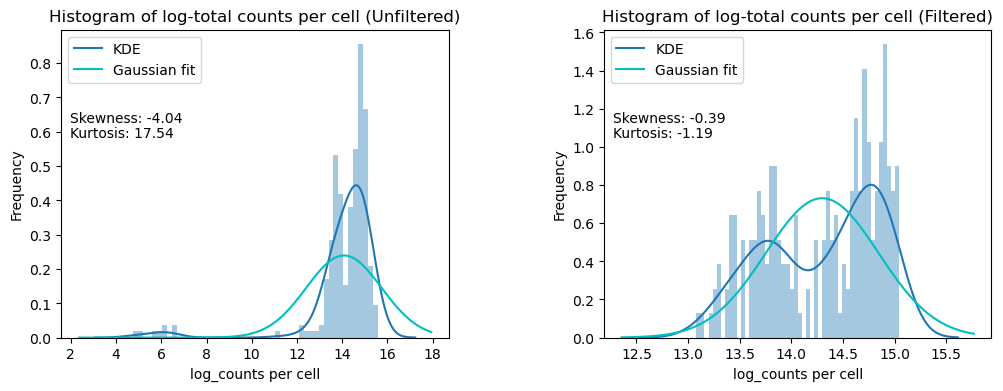

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Fit a Gaussian distribution to the counts
mu, std = norm.fit(adata.obs['log_counts'])
mu2, std2 = norm.fit(adata_copy.obs['log_counts'])

# Plot the histogram of counts and the fitted Gaussian distribution
sns.distplot(adata.obs['log_counts'], bins=50, kde_kws={'label': 'KDE'}, ax=ax1)
sns.distplot(adata_copy.obs['log_counts'], bins=50, kde_kws={'label': 'KDE'}, ax=ax2)

xmin, xmax = ax1.get_xlim()
xmin2, xmax2 = ax2.get_xlim()
x1 = np.linspace(xmin, xmax, 100)
x2 = np.linspace(xmin2, xmax2, 100)
p = norm.pdf(x1, mu, std)
p2 = norm.pdf(x2, mu2, std2)
sns.lineplot(x=x1, y=p, color='c', label='Gaussian fit', ax=ax1)
sns.lineplot(x=x2, y=p2, color='c', label='Gaussian fit', ax=ax2)

# Annotate skewness and kurtosis on the plots
ax1.annotate(f'Skewness: {adata_skewness_log:.2f}', xy=(0.0225, 0.7), xycoords='axes fraction', fontsize=10)
ax1.annotate(f'Kurtosis: {adata_kurtosis_log:.2f}', xy=(0.0225, 0.65), xycoords='axes fraction', fontsize=10)

ax2.annotate(f'Skewness: {adata_copy_skewness_log:.2f}', xy=(0.0225, 0.7), xycoords='axes fraction', fontsize=10)
ax2.annotate(f'Kurtosis: {adata_copy_kurtosis_log:.2f}', xy=(0.0225, 0.65), xycoords='axes fraction', fontsize=10)


ax1.set_xlabel('log_counts per cell')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of log-total counts per cell (Unfiltered)')
ax1.legend()

ax2.set_xlabel('log_counts per cell')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of log-total counts per cell (Filtered)')
ax2.legend()
plt.subplots_adjust(wspace=0.4)

plt.show()

#####  Step 2: Mitochondrial reads

#####  Step 2: Mitochondrial reads

The mitochondrial ratio is an important estimator of cell quality, since high levels of mitochondrial gene expression can be indicative of compromised cellular health and technical artifacts in RNA-sequencing data.
Hence, a high proportion of mitochondrial gene expression can be associated with various issues, such as cell stress, apoptosis or contamination, and is thus likely to interfere with the accurate measurements and introduce noise in the data.

In [55]:
# We define adata_qc1 as the adata without outliers (quality control step 1)
adata_qc1 =sc.AnnData(filtered_1_data)

# Calculate the total counts per cell
adata_qc1.obs['n_counts']  = adata_qc1.X.sum(axis=1)

# Let us isolate the one mitocondiral genes
mt_gene_mask = [gene.startswith(('MT-',"MT")) for gene in adata_qc1.var_names] # Mask for mitochondrial genes
adata_qc1.obs['mt_frac'] = adata_qc1.X[:, mt_gene_mask].sum(1)/adata_qc1.obs['n_counts'] # Mitochondrial frac 
adata_qc1.obs['n_genes'] = (adata_qc1.X > 0).sum(1)

In [56]:
adata_2 = sc.AnnData(H_Smart_unfil.T)
adata_2.obs['n_counts']  = adata_2.X.sum(axis=1)
mt_gene_mask = [gene.startswith(('MT-',"MT")) for gene in adata_2.var_names] # Mask for mitochondrial genes
adata_2.obs['mt_frac'] = adata_2.X[:, mt_gene_mask].sum(1)/adata_2.obs['n_counts'] # Mitochondrial ratio 
adata_2.obs['n_genes'] = (adata_2.X > 0).sum(1)


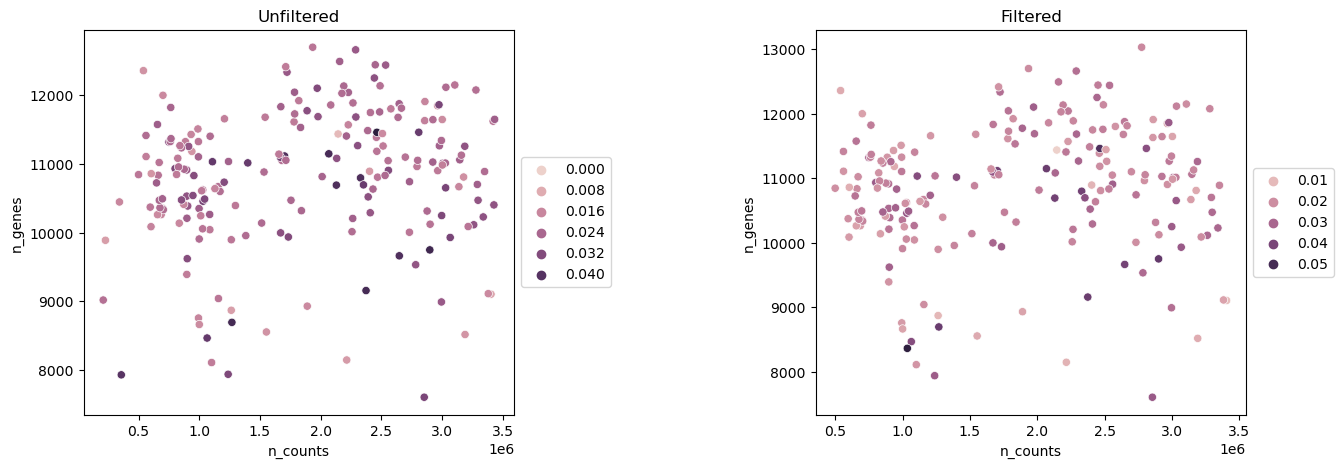

In [57]:
#Unfiltered
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title("Unfiltered")
ax2.set_title('Filtered')


plt.subplots_adjust(wspace=0.7)
sns.scatterplot(x = adata_2.obs['n_counts'][adata_2.obs['n_counts']<(3.5*1e6)], y = adata_2.obs['n_genes'][adata_2.obs['n_genes']<13000][adata_2.obs['n_genes']>4000], hue = adata_2.obs['mt_frac'][adata_2.obs['mt_frac']<0.05] ,ax =ax1)
sns.scatterplot(x = adata_qc1.obs['n_counts'], y = adata_qc1.obs['n_genes'][adata_qc1.obs['n_genes']>4000], hue = adata_qc1.obs['mt_frac'], ax = ax2)
# Move the legend of ax1 outside the plot
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Move the legend of ax2 outside the plot
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

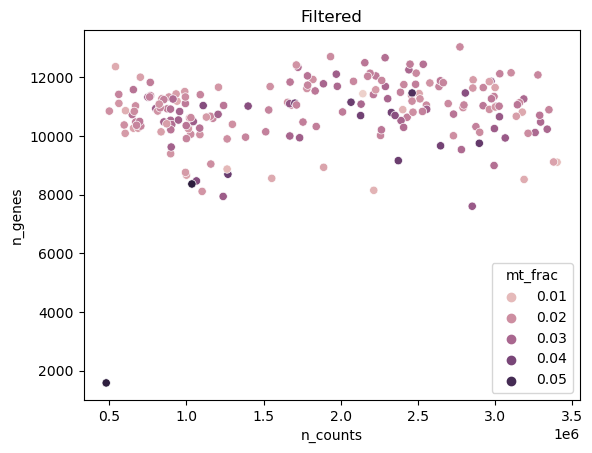

In [58]:
# Let us see only cells with mitocondrial genes
sns.scatterplot(x = adata_qc1.obs['n_counts'], y = adata_qc1.obs['n_genes'], hue = adata_qc1.obs['mt_frac'])
plt.title("Filtered")
plt.show()

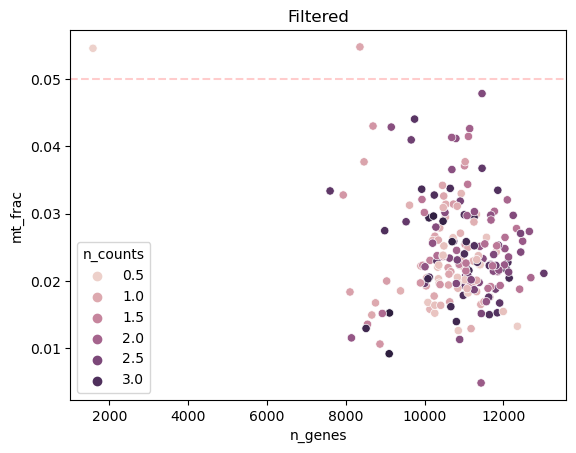

In [59]:
sns.scatterplot(x = adata_qc1.obs['n_genes'], y = adata_qc1.obs['mt_frac'], hue = adata_qc1.obs['n_counts'])

plt.axhline(y=0.05, color='r', linestyle='--', alpha = 0.2, label = "Threshold")

plt.title("Filtered")
plt.show()

In this last analyis, we have examined the relationship between the number of genes, the number of counts and the mitochondrial ratio, observing that cells with a mitochondrial ratio exceeding 5% exhibited a distinct concentration.

Since, as a rule of thumb, a mitochondrial ratio above 5% is commonly associated with cells that have a broken membrane or compromised cellular health, we have decided to exclude such cells from further analysis.

In [60]:
# Filtering of the data
adata_qc2 = adata_qc1[adata_qc1.obs['mt_frac']<0.05]
adata_qc2

View of AnnData object with n_obs × n_vars = 197 × 23396
    obs: 'n_counts', 'mt_frac', 'n_genes'

In [61]:
H_Smart_cf = adata_qc2.to_df()
H_Smart_cf = H_Smart_cf.T

In [62]:
diff =  set(label.index) - set(H_Smart_cf.columns) 
diff = pd.Index(list(diff))

In [63]:
label_cf = label.copy()
label_cf.drop(diff.tolist())
H_Smart_cf_complete = H_Smart_cf.T.copy()
H_Smart_cf_complete['Condition'] = label_cf
H_Smart_cf_complete = H_Smart_cf_complete.T

Before we conclude this first Data Cleaning step, we ensure that the removal of the columns did not alter our dataset by creating linearly dependent rows. In this case, we drop them.

In [64]:
# As last check we see if there are linearly dependent rows and if so we drop it
corr_matrix_cf = H_Smart_cf.corr()
l = []
for i in H_Smart_cf.columns:
    for j in H_Smart_cf.columns:
        if i != j:
            if abs(corr_matrix_cf.loc[i,j]) == 1 :
                l.append((i,j))
l

[]

#### __Gene Filtering__

##### First approach: __Duplicates__

##### First approach: __Duplicates__

A standard practice in data preprocessing that we will perform in our initial step of gene filtering involves removing duplicate genes from the dataset.

This step is essential to enhance the quality and interpretability of downstream analyses, since duplicate genes are redundant and provide repeated information, offering no additional value to the analysis and potentially introducing unnecessary biases.

In [65]:
#We keep only one of the duplicates by discarding the rest
df_duplicates_number = H_Smart_cf[H_Smart_cf.duplicated(keep = 'first')]
df_duplicates_total = H_Smart_cf[H_Smart_cf.duplicated(keep = False)]

In [66]:
print(f'Total number of duplicate genes: {df_duplicates_number.shape[0]}')
print(f'Number of genes which have a copy: {df_duplicates_total.shape[0] - df_duplicates_number.shape[0]}')

Total number of duplicate genes: 463
Number of genes which have a copy: 161


In [67]:
H_Smart_wd = H_Smart_cf[H_Smart_cf.duplicated(keep = 'first') == False]

A notable observation is that a considerable proportion of the duplicated genes that were removed from the dataset exhibited a high level of sparsity. This means that these duplicate genes had a significant number of zero expression values, indicating that the removal of these duplcate genes corresponds to the elimination of less relevant or less informative genes.

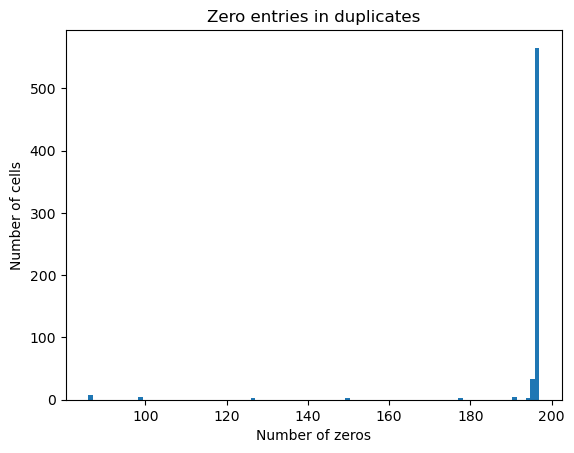

In [68]:
zeros = pd.Series(np.zeros(len(df_duplicates_total.index)), index = df_duplicates_total.index)

for ind in df_duplicates_total.index.tolist():
    counter = 0
    for j in df_duplicates_total.T[ind]:
        if j == 0:
            counter += 1
    zeros[ind] = counter
    
plt.hist(zeros, bins = 100)
plt.title('Zero entries in duplicates')
plt.xlabel('Number of zeros')
plt.ylabel('Number of cells')
plt.show()

##### Second  Approach: __Coefficient of variation__

In this step, we will utilize the coefficient of variation (CV), calculated as the standard deviation divided by the mean, as a metric for gene filtering.
When the mean is substantially larger compared to the variance, it indicates a more uniform distribution of expression values, where the mean value only varies slightly. In such cases, the genes' expression pattern may contribute less to the overall variability of the dataset an potentially carry less relevant information.

To address this, we will set a threshold value below which genes with low coefficient of variation will be discarded.

In [69]:
H_Stat = H_Smart_wd.T.describe().T[['mean', 'std', 'min','max' ]]
H_Stat

mean          std   min     max
WASH7P       0.040609     0.316833   0.0     3.0
CICP27       0.086294     0.481987   0.0     5.0
DDX11L17     0.380711     1.116771   0.0     8.0
WASH9P       0.187817     0.580512   0.0     4.0
OR4F29       0.091371     0.352508   0.0     2.0
...               ...          ...   ...     ...
MT-TE       14.472081    19.036096   0.0   212.0
MT-CYB    2023.000000  1375.704899  83.0  6760.0
MT-TT       19.959391    21.538489   0.0   154.0
MT-TP       42.020305    35.000723   0.0   267.0
MAFIP        3.345178     4.108557   0.0    24.0

[22933 rows x 4 columns]

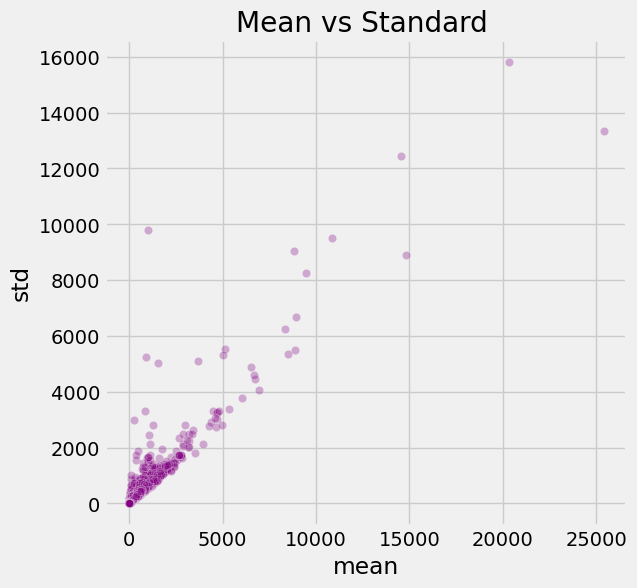

In [105]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6,6))
scat = sns.scatterplot(x = 'mean', y = 'std', data= H_Stat, color = 'purple', alpha=0.30)
plt.title('Mean vs Standard ')
plt.show() 

To facilitate visualization, we will log-transform the gene expression data and plot the standard deviation against the mean expression levels with a scatter plot and with a histogram:

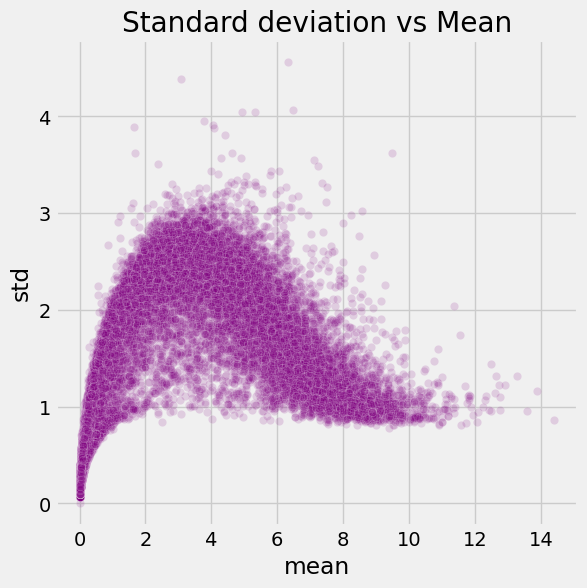

In [106]:
H_Smart_wd_log = np.log2(1+ H_Smart_wd)
H_Stat_log = H_Smart_wd_log.T.describe().T[['mean', 'std', 'min','max' ]]
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6,6))
scat = sns.scatterplot(x = 'mean', y = 'std', data= H_Stat_log, color = 'purple', alpha=0.15)
plt.title('Standard deviation vs Mean')
plt.show() 

In [72]:
variance_ratio = H_Stat_log['std'] / H_Stat_log['mean']

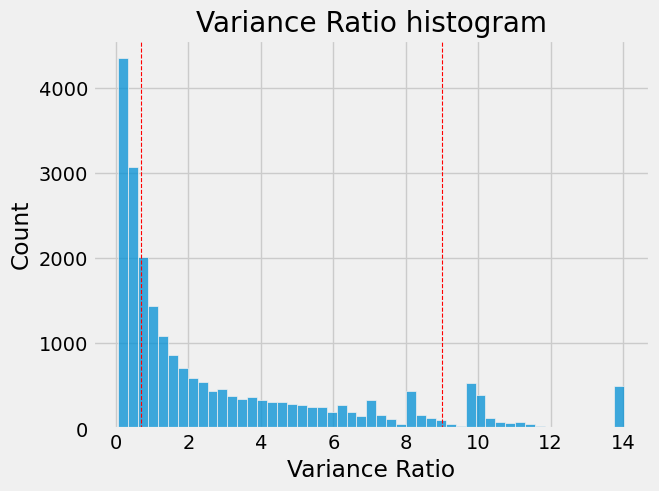

In [73]:
sns.histplot(data = variance_ratio)
plt.title('Variance Ratio histogram')
plt.xlabel('Variance Ratio')
plt.ylabel('Count')
plt.axvline(x=0.7, color='red', linestyle='dashed', linewidth=0.8)
plt.axvline(x=9, color='red', linestyle= 'dashed', linewidth=0.8)
plt.show()

To justify the removal of genes with variance ratios outside a threshold range of [0.7, 9.0], we employ the concept of Counts Per Million (CPM) normalization, obtained by dividing the count for the specific gene by the total count of expression values for all genes in the sample and then multiplying it by one million.

From this histogram, we notice that the highest CPM values correspond to cases when the variance ratio approaches 0, hence when the mean is significantly larger than the standard deviation.
Therefore, we might want to remove genes that exhibit extremely low variance ratio, since in such instances, their distribution appears to be relatively uniform, and is likely to bring redundant information.

Intuitively, we selected a threshold of 0.7 for this section of extreme genes.

Furthermore, we want to investigate the opposite trend: we can infer from the plot that the decreasing pattern interrupts after a variance ratio of 9, revealing an unusual peak at 10 and an even more extreme outlier at 14. This observation leads us to consider 9 as an upper bound for this gene filtering section.

In [74]:
def CPM (Data):
    Data2 = Data.copy()
    x = np.zeros(Data.shape[1])
    counter2 = 0
    for i in Data.columns:
        counter = 0
        for j in Data[i]:
            counter += j
        x[counter2] = counter
        counter2 += 1
    counter3 = 0
    for i in Data.columns:
        Data2[i] = np.divide(Data2[i],x[counter3])
        counter3 +=1
    cpm_matrix = Data2 * 1e6
    return cpm_matrix
H_CPM_log = CPM(H_Smart_wd_log)

In [75]:
nonzeros = pd.Series(np.zeros(len(H_CPM_log.index)), index = H_CPM_log.index)
for ind in H_CPM_log.index.tolist():
    counter = 0
    for j in H_CPM_log.T[ind]:
        if j == 0:
            counter += 1
    nonzeros[ind] = 197 - counter
nonzeros = pd.DataFrame(nonzeros, columns = ['nonzeros'])

In [76]:
variance_ratio = pd.DataFrame(variance_ratio, columns = ['variance ratio'])
variance_ratio_counts = variance_ratio.join(nonzeros)
variance_ratio_counts_low = variance_ratio_counts[variance_ratio_counts['variance ratio'] > 9] #Here we are going to zoom on this data to look if they can be removed

We visualize now the scatter plot in order to investigate the relationship between the variance ratio and the expression count:

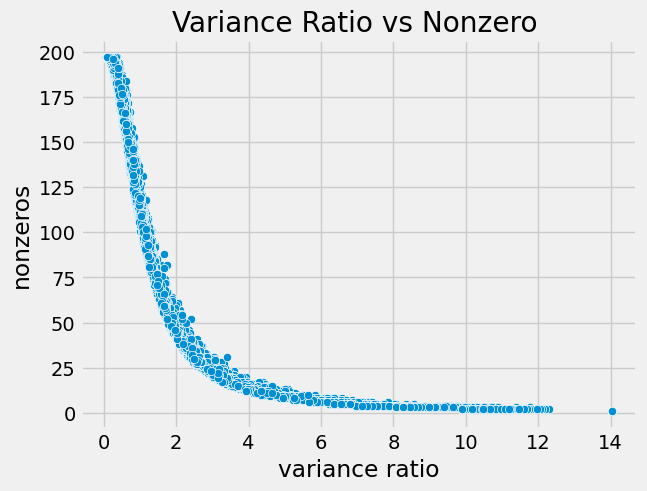

In [77]:
sns.scatterplot(data = variance_ratio_counts, x = 'variance ratio', y = 'nonzeros' )
plt.title('Variance Ratio vs Nonzero ')
plt.show()

We observe that CV values are inversely proportional to the CPM of the dataset: as the mean decreases with respect to the standard deviation and the variance ratio rises, cells appear to have higher zero counts.

<AxesSubplot:xlabel='variance ratio', ylabel='nonzeros'>

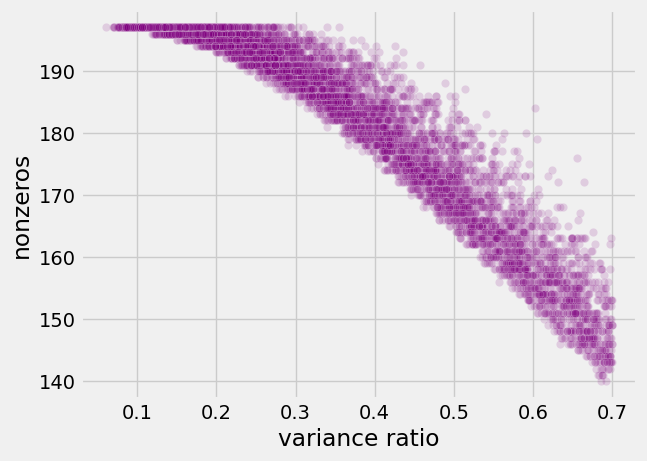

In [110]:
variance_ratio_counts_high = variance_ratio_counts[variance_ratio_counts['variance ratio'] < 0.7]
sns.scatterplot(data = variance_ratio_counts_high, x = 'variance ratio', y= 'nonzeros', color='purple', alpha=0.15)

In particular, we want to inspect closely how the expression count varies with significantly high records of variance ratio.

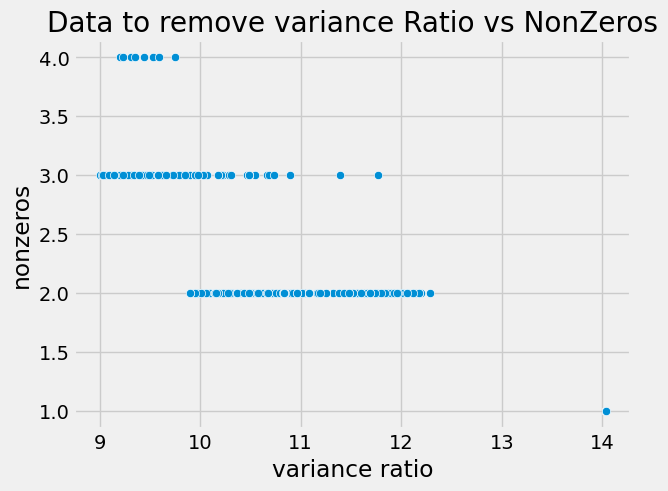

In [78]:
sns.scatterplot(data = variance_ratio_counts_low, x = 'variance ratio', y = 'nonzeros' )
plt.title('Data to remove variance Ratio vs NonZeros')
plt.show()

In such cases, we observe that genes whose variance ration exceed 9 are expressed at most four times, with a minimum record of 1 non-zero count at variance ratio 14. This observation suggests that these genes carry insufficient information for meaningful analysis.

Therefore, the high variance ratio threshold of 9 serves as an intuitive criterion for filtering out genes with limited expression range.

We can thus proceed with filtering:

In [79]:
H_var_mean_log = H_Stat_log['std'] /  H_Stat_log['mean']
discard1 = H_var_mean_log[H_var_mean_log < 0.7]
discard2 = H_var_mean_log[H_var_mean_log > 9]

In [80]:
H_Smart_gf1 = H_Smart_wd.copy()
for i in list(discard1.index):
    H_Smart_gf1.drop(f'{i}', inplace = True, axis = 'index')
for i in list(discard2.index):
    H_Smart_gf1.drop(f'{i}', inplace = True, axis = 'index')
H_Smart_gf1

S123  S4  S8  S11  S113  S119  S20  S1  S5  S109  ...  S243  S193  \
WASH7P       0   0   0    0     0     0    0   0   0     0  ...     0     0   
CICP27       0   0   0    0     0     0    0   0   0     0  ...     0     0   
DDX11L17     0   0   1    0     0     0    1   8   2     0  ...     0     0   
WASH9P       0   0   0    0     1     0    0   0   0     0  ...     0     0   
OR4F29       2   0   0    0     0     0    0   2   1     0  ...     0     0   
...        ...  ..  ..  ...   ...   ...  ...  ..  ..   ...  ...   ...   ...   
MT-TM       10   4   0    3     1     1    2   3   1     4  ...     0     0   
MT-TS1       0   0   0    0     0     0    1   0   0     0  ...     0     0   
MT-TD        3   1   0    1     0     0    0   0   1     1  ...     1     0   
MT-TR        0   0   0    2     0     2    0   0   0     0  ...     0     2   
MAFIP        0   0   9    4     2     0    0   0   0     0  ...     2     0   

          S198  S232  S204  S210  S214  S199  S205  S236  
WASH7P       0     0     0     0     0     0     0     0  
CICP27       0     0     0     0     0     0     0     0  
DDX11L17     0     0     0     0     0     0     0     0  
WASH9P       0     0     0     1     0     1     0     0  
OR4F29       0     0     0     0     0     0     0     0  
...        ...   ...   ...   ...   ...   ...   ...   ...  
MT-TM        1     0     1     5     0     9     2     1  
MT-TS1       0     0     0     0     0     0     0     0  
MT-TD        0     0     0     1     0     0     0     1  
MT-TR        0     1     0     2     0     0     0     3  
MAFIP        2     1     1     3     0     2     1     5  

[12808 rows x 197 columns]

We represent here the scatter plot of the standard deviation over the mean and the histogram of the cpm over the variance ratio for the filtered dataset: 

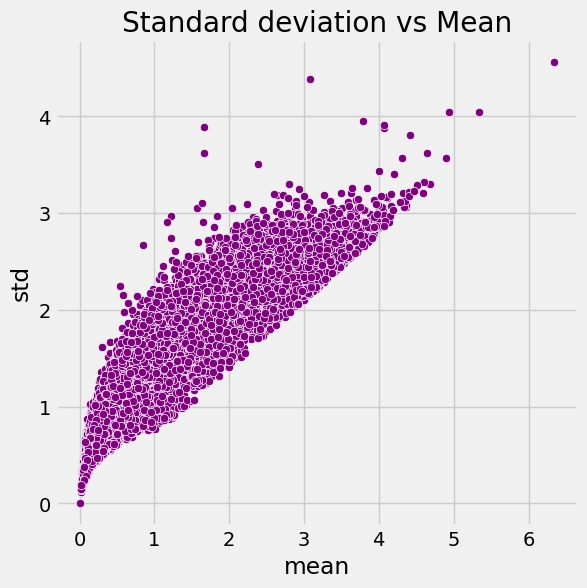

In [81]:
H_Stat_log_gf1 = np.log2(1 + H_Smart_gf1).T.describe().T[['mean', 'std', 'min','max' ]]
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6,6))
scat = sns.scatterplot(x = 'mean', y = 'std', data= H_Stat_log_gf1, color = 'purple')
plt.title('Standard deviation vs Mean')
plt.show() 

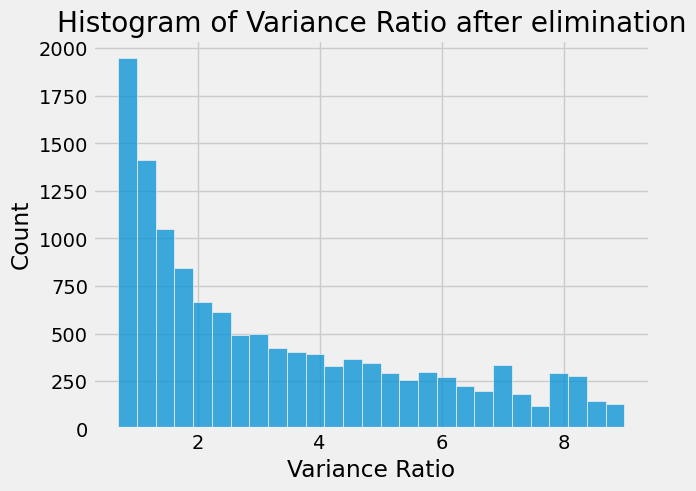

In [82]:
sns.histplot(data = H_Stat_log_gf1['std'] / H_Stat_log_gf1['mean'])
plt.title('Histogram of Variance Ratio after elimination')
plt.xlabel('Variance Ratio')
plt.show()

#####  Third Approach: __Sparsity__

The last method we will use to filter genes involves measuring the level of *sparsity*, which refers to the number of zero expression values for each gene. Based on the importance or relevance of the genes, we will decide to retain them or remove from the dataset.

In [83]:
# Let us compute and plot the sparsity of the resulting dataset
def count_zero(row): 
    l = len(row)
    c = 0
    for i in range(l): 
        if row[i] == 0: 
            c+=1
    return c
    
sparsity = dict()
sparsity['Sparsity'] = []
sparsity['Genes'] = []

for ind in H_Smart_gf1.index: 
    row = H_Smart_gf1.loc[ind, :]
    s = ( count_zero(row) / float(row.size) )
    sparsity['Genes'].append(ind)
    sparsity['Sparsity'].append(s)

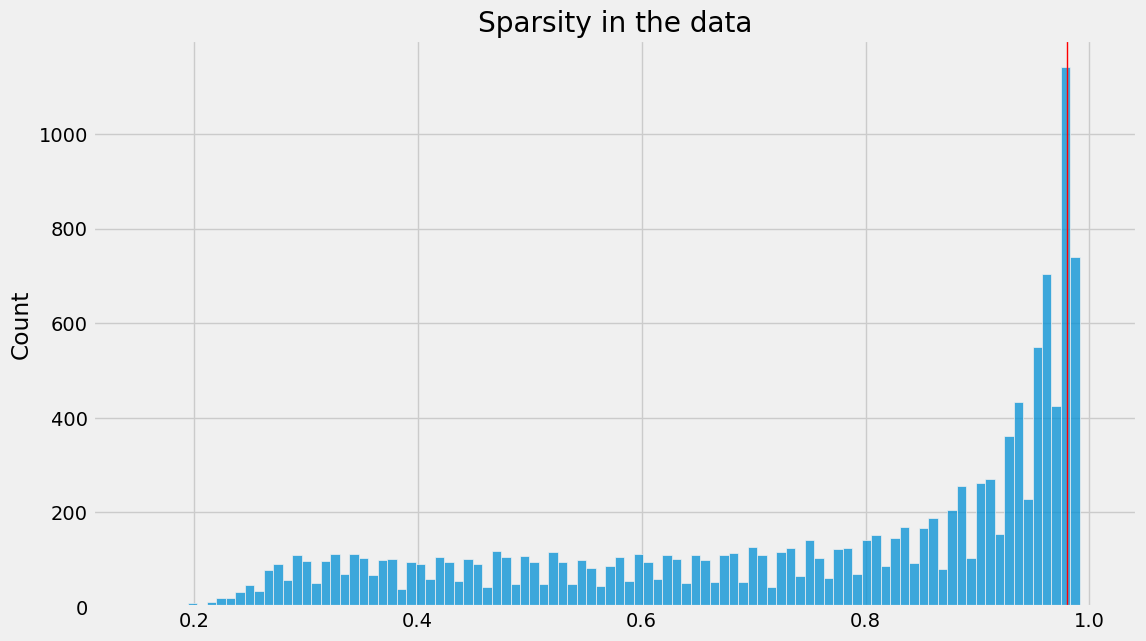

In [84]:
fig, ax = plt.subplots(figsize = (12,7))
sns.histplot(data= sparsity['Sparsity'], bins = 100, ax = ax)
plt.axvline(x = 0.98, color = 'red', linewidth = 1)
plt.title('Sparsity in the data')
plt.show()

We observe that all our genes exhibit a sparsity level equal or higher than 0.2. In accordance with our previous gene filtering approach, where we removed genes with a large value of non-zero values, we now turn our attention to genes with high sparsity levels.

As a thumb rule, we decided to remove genes that are not present in at least 5% of the cells. This corresponds to sparsity level exceeding 0.95, indicating a substantial prevalence of zero expression values across the dataset.

In [85]:
sparsity = pd.Series(sparsity['Sparsity'], index = sparsity['Genes'])
sparsity

WASH7P      0.979695
CICP27      0.954315
DDX11L17    0.822335
WASH9P      0.873096
OR4F29      0.928934
              ...   
MT-TM       0.258883
MT-TS1      0.979695
MT-TD       0.736041
MT-TR       0.482234
MAFIP       0.289340
Length: 12808, dtype: float64

In [86]:
diff = sparsity[sparsity > 0.95].index.tolist()
diff

['WASH7P',
 'CICP27',
 'OR4F16',
 'FAM41C',
 'LINC02593',
 'TNFRSF18',
 'C1QTNF12',
 'MIR6726',
 'MXRA8',
 'MRPL20-DT',
 'LINC01770',
 'MMP23A',
 'CFAP74',
 'GABRD',
 'PRDM16',
 'LINC01134',
 'RNF207-AS1',
 'CAMTA1-IT1',
 'TNFRSF9',
 'SLC45A1',
 'RPL7P11',
 'RPL23AP19',
 'MIR34A',
 'LINC02606',
 'RNU6-37P',
 'ANGPTL7',
 'UBE2V2P3',
 'RNU5E-1',
 'RNU5E-4P',
 'MIR7846',
 'SNORA59A',
 'HNRNPCL2',
 'BRWD1P1',
 'FHAD1-AS1',
 'CTRC',
 'CELA2B',
 'SLC25A34-AS1',
 'CPLANE2',
 'RPL22P3',
 'LINC01772',
 'LINC01783',
 'MST1P2',
 'MST1L',
 'PADI4',
 'DYNLL1P3',
 'PAX7',
 'AKR7A3',
 'ECE1-AS1',
 'PPP1R11P1',
 'NBPF2P',
 'HS6ST1P1',
 'PFN1P10',
 'LINC01635',
 'TEX46',
 'MDS2',
 'GRHL3-AS1',
 'MIR6731',
 'SDHDP6',
 'EXTL1',
 'SLC30A2',
 'ZPLD2P',
 'LIN28A',
 'DHDDS-AS1',
 'RPL12P13',
 'OSTCP2',
 'RNU6-48P',
 'THEMIS2',
 'RN7SL559P',
 'RNU11',
 'OPRD1',
 'LINC01756',
 'MATN1',
 'MATN1-AS1',
 'SELENOWP1',
 'FAM167B',
 'TSSK3',
 'CSMD2',
 'EFCAB14P1',
 'MIR5581',
 'EPHA10',
 'MIR3659HG',
 'SNORA55',
 'L

In [87]:
H_Smart_gf2 = H_Smart_gf1.copy()
for i in diff:
    H_Smart_gf2.drop(i, inplace = True, axis = 'index')
H_Smart_gf2

S123  S4  S8  S11  S113  S119  S20  S1  S5  S109  ...  S243  S193  \
DDX11L17     0   0   1    0     0     0    1   8   2     0  ...     0     0   
WASH9P       0   0   0    0     1     0    0   0   0     0  ...     0     0   
OR4F29       2   0   0    0     0     0    0   2   1     0  ...     0     0   
MTCO2P12     6   0   0    5     0     2    0   0   0     0  ...     1     2   
MTATP8P1     1   0   0    0     0     1    1   0   0     0  ...     0     1   
...        ...  ..  ..  ...   ...   ...  ...  ..  ..   ...  ...   ...   ...   
MT-TQ        7   1   2    3     1     3    5   1   0     2  ...     0     1   
MT-TM       10   4   0    3     1     1    2   3   1     4  ...     0     0   
MT-TD        3   1   0    1     0     0    0   0   1     1  ...     1     0   
MT-TR        0   0   0    2     0     2    0   0   0     0  ...     0     2   
MAFIP        0   0   9    4     2     0    0   0   0     0  ...     2     0   

          S198  S232  S204  S210  S214  S199  S205  S236  
DDX11L17     0     0     0     0     0     0     0     0  
WASH9P       0     0     0     1     0     1     0     0  
OR4F29       0     0     0     0     0     0     0     0  
MTCO2P12     0     1     1     1     0     4     1     0  
MTATP8P1     0     0     2     0     0     0     0     0  
...        ...   ...   ...   ...   ...   ...   ...   ...  
MT-TQ        0     0     0     8     1     9     2     0  
MT-TM        1     0     1     5     0     9     2     1  
MT-TD        0     0     0     1     0     0     0     1  
MT-TR        0     1     0     2     0     0     0     3  
MAFIP        2     1     1     3     0     2     1     5  

[9519 rows x 197 columns]

To conclude our gene filtering process, as a last check we look if the removal of some genes led to empty rows in our dataset:

In [88]:
empty_cols(H_Smart_gf2) #no empty columns

[]

Just for the sake of clarity, we perform a Whitney U !!!!!! test to check whether the genes we retained in our dataset are relevant for Normo and Hypo conditions:

In [113]:
from scipy.stats import mannwhitneyu

def whitneyu_test(dataset1, dataset2): 
  w_test_list = dict()
  for i in range(dataset1.shape[0]):
    wtest,p = mannwhitneyu(dataset1.iloc[i,:], 
              dataset2.iloc[i, :])
    name = dataset1.index[i]
    w_test_list[name] = p
  sorted_w_test_list = sorted(w_test_list.items(), key=lambda x:x[1])
  return sorted_w_test_list

df_new = H_Smart_gf2.T.join(H_Smart_cf_complete.T['Condition'])

df_normo = df_new[df_new['Condition'] == 'Normo'].iloc[:, :-1]
df_hypo = df_new[df_new['Condition'] == 'Hypo'].iloc[:, :-1]
df_normo = df_normo.T
df_hypo = df_hypo.T

df_normo

S123  S113  S119  S20  S114  S21  S124  S128  S28  S115  ...  S242  \
DDX11L17     0     0     0    1     0    0     0     0    0     0  ...     1   
WASH9P       0     1     0    0     1    0     0     0    0     0  ...     0   
OR4F29       2     0     0    0     0    1     0     0    0     0  ...     0   
MTCO2P12     6     0     2    0     0    2     0     3    0     4  ...     0   
MTATP8P1     1     0     1    1     1    0     0     1    0     1  ...     0   
...        ...   ...   ...  ...   ...  ...   ...   ...  ...   ...  ...   ...   
MT-TQ        7     1     3    5     1    8     7     2    2     6  ...     1   
MT-TM       10     1     1    2     2    0     7     1    0     1  ...     3   
MT-TD        3     0     0    0     0    0     0     0    0     0  ...     0   
MT-TR        0     0     2    0     1    3     0     8    0     1  ...     7   
MAFIP        0     2     0    0    16   24     4     8    5     3  ...     1   

          S203  S235  S209  S243  S204  S210  S214  S205  S236  
DDX11L17     0     0     0     0     0     0     0     0     0  
WASH9P       0     0     1     0     0     1     0     0     0  
OR4F29       0     0     0     0     0     0     0     0     0  
MTCO2P12     1     0     0     1     1     1     0     1     0  
MTATP8P1     0     0     0     0     2     0     0     0     0  
...        ...   ...   ...   ...   ...   ...   ...   ...   ...  
MT-TQ        1     2     1     0     0     8     1     2     0  
MT-TM        2     2     4     0     1     5     0     2     1  
MT-TD        1     1     0     1     0     1     0     0     1  
MT-TR        0     2     9     0     0     2     0     0     3  
MAFIP        0    11     4     2     1     3     0     1     5  

[9519 rows x 101 columns]

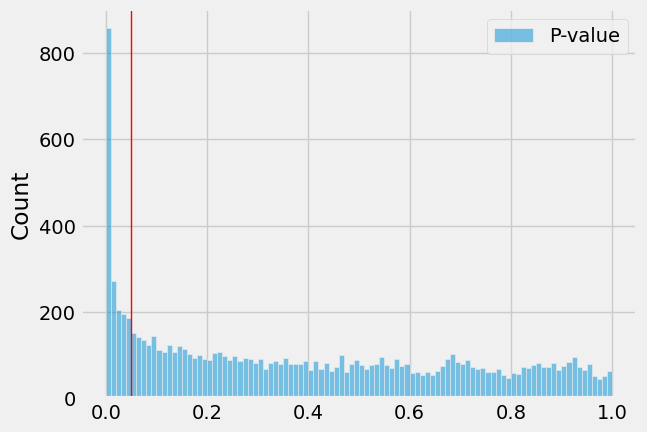

In [115]:
wtest = whitneyu_test(df_normo, df_hypo)
w_test_df = pd.DataFrame(wtest, columns = ['Gene', 'P-value']).set_index('Gene')

#plot
sns.histplot(w_test_df, bins = 100)
plt.axvline(x= 0.05, linewidth = 1, color = 'r')

__(!! commenta!!!)__

In [117]:
significant_genes = w_test_df[w_test_df['P-value'] <= 0.05]
top_15 = w_test_df.sort_values(by = 'P-value').iloc[:15, :]
top_15

P-value
Gene                 
CA9      1.548012e-32
ANGPTL4  5.527006e-32
NDRG1    6.695692e-32
EGLN3    8.133323e-32
BNIP3P1  2.672800e-26
KCTD11   3.891886e-25
LOXL2    4.807956e-25
ASB2     6.391086e-24
ENO2     3.995859e-23
PPP1R3G  1.702522e-20
CCNG2    7.751523e-19
DANT1    1.265791e-18
PNRC1    1.183295e-16
BARX1    1.293553e-16
HK2      2.989836e-16

### Normalisation and Scaling

### Normalisation and Scaling

Now after dealing mainly with removing genes and cells we are going to perform some operations in order to enhance the visual appearance of the data, here there are two types of normalisation we can perform:

 __1)__ *Scaling and log transformation*: this normalization approach is commonly used in bulk RNA sequencing, where the cells exhibit similar distributions. To achieve this, we multiply the gene expression values by a scaling factor tha aligns the counts across all cells, ensuring that they have a consistent count scale. Subsequently, we apply a logarithmic function to the entire dataset to compress the dynamic range of the expression values.

 __2)__ *Mean subtraction and log transformation*: Tnis normalization method is more suitable for sc-RNA sequencing data, where cells exhibit diverse distributions. Instead of modifying he distribution significantly, which may result in the loss of important information, we perform a log transformation to reduce the scale of the data. Additionally, we center the data by subtracting the mean expression value.

#### First Normalization Approach

#### First Normalization Approach

We are going to scale by the median to ensure that all the genes reflect a comparable count scale:

In [89]:
def scale(data):
    total_genes_per_cell = data.sum(axis = 0)
    median = np.median(total_genes_per_cell)
    scaling_factor = median / total_genes_per_cell
    data_scaled = data.mul(scaling_factor, axis = 1)
    return data_scaled
H_Filtered_Scaled = scale(H_Smart_gf2)

By analizing the count depth, we observe that our scaling transformation successfully achieved the desired outcome of ensuring that all cells acheve the same count depth, indicating that the scaling process effectibely standardized the gene expression values across cells, aligning them to a commoun count scale.

To scale the wide range of values in our dataset, we will apply a logarithmic transformation.

To scale the wide range of values in our dataset, we will apply a logarithmic transformation.

In [90]:
H_Filtered_Scaled_log = H_Filtered_Scaled.applymap(lambda x: np.log(1+x))

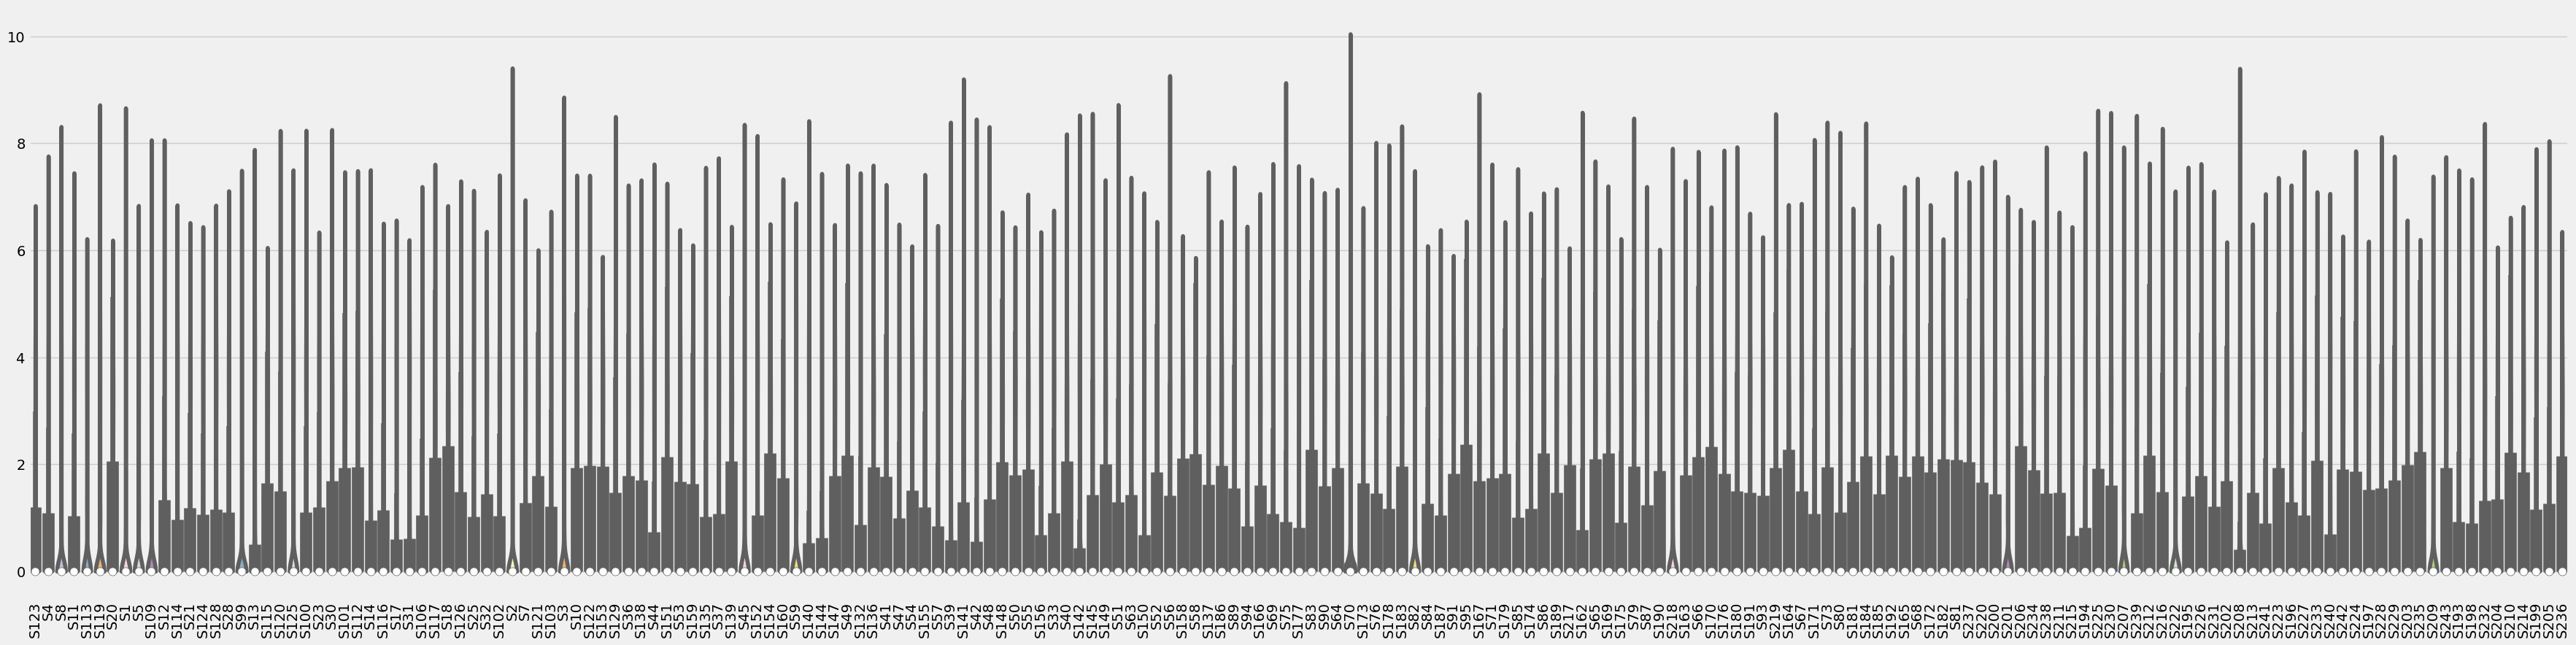

In [91]:
plt.figure(figsize=(40,10))
plot=sns.violinplot(data=H_Filtered_Scaled_log, palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

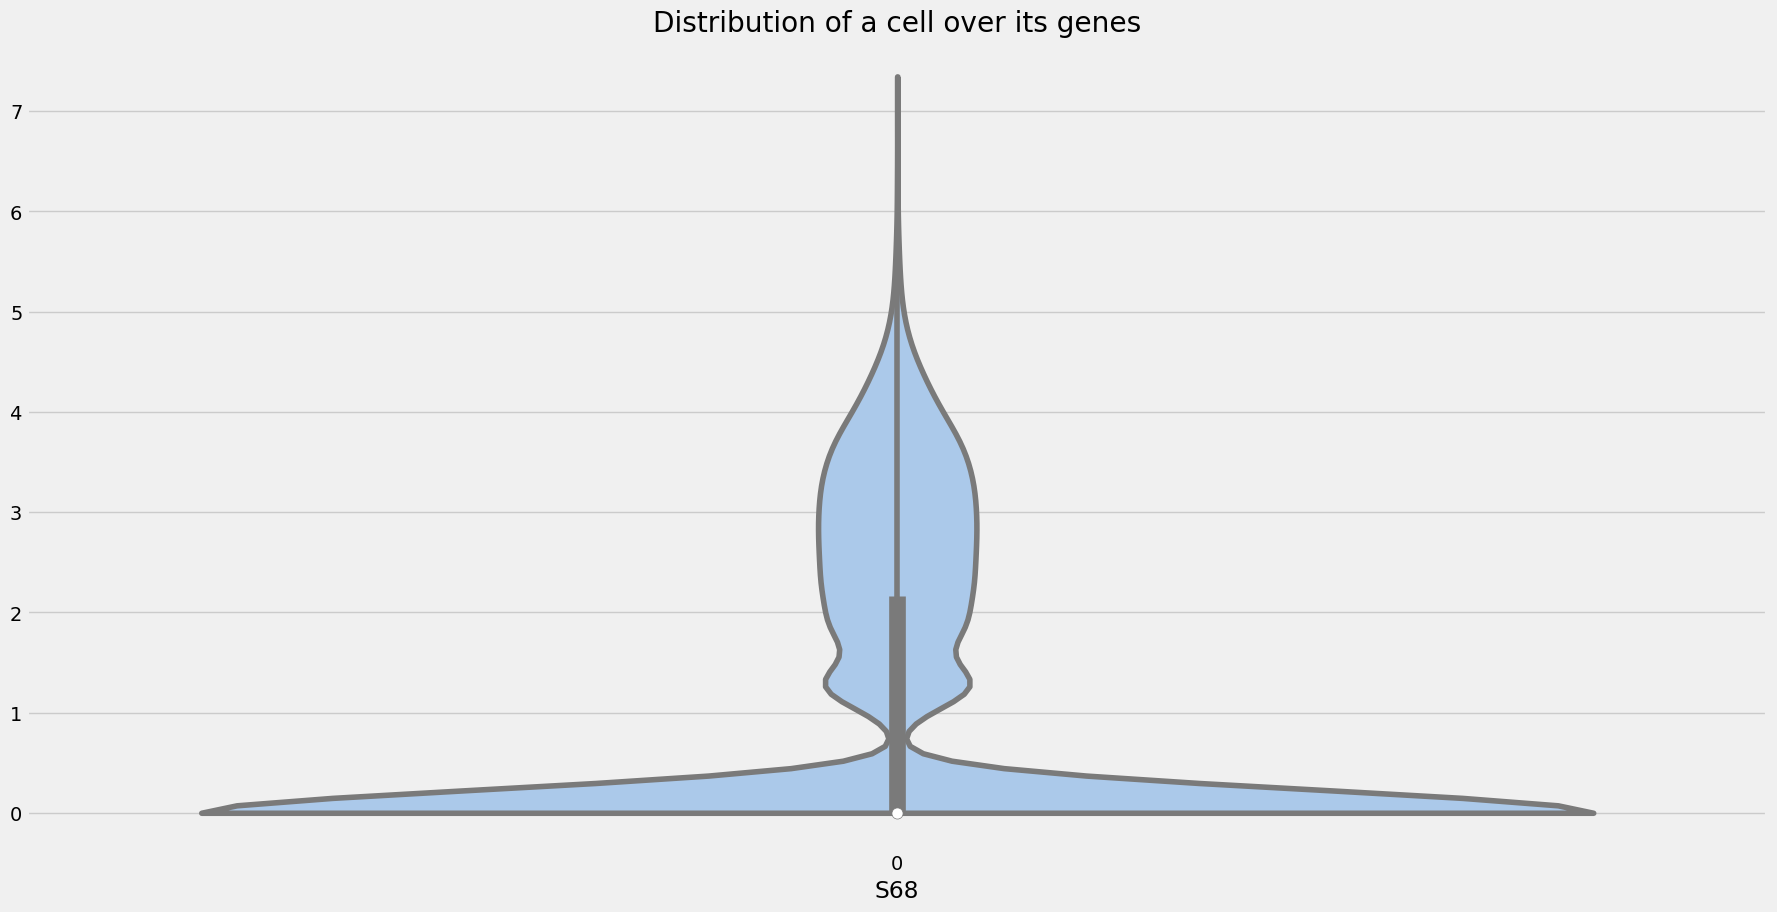

In [92]:
random_cell = np.random.randint(H_Filtered_Scaled_log.shape[1])
plt.figure(figsize = (20,10))
plot = sns.violinplot(data = H_Filtered_Scaled_log.iloc[:,random_cell], palette = "pastel", cut = 0, fit = norm)
plot.set_xlabel(H_Filtered_Scaled_log.columns[random_cell])
plot.set_title('Distribution of a cell over its genes')
plt.show()

Differently from what we have seen in the unfiltered case, where the kernel density estimator exhibited a pronounced peak at zero and a significantly lower probability for non-zero values, the current filtered dataset displays a more balanced distribution. While the peak at zero remains, indicating the presence of a substantial number of genes with no expression, the probability distribution for non-zero values has noticeably increased, demonstrating a non-negligible probability.

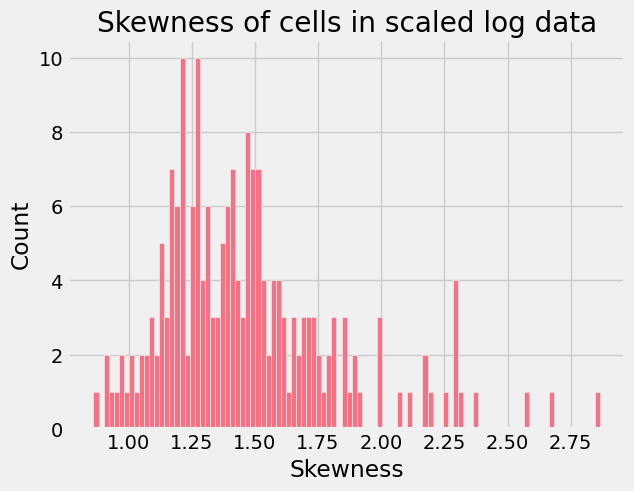

In [93]:
# Skewness
colN = np.shape(H_Filtered_Scaled_log)[1]
df_skew_cells = []
for i in range(colN) :     
    v_df = H_Filtered_Scaled_log[H_Filtered_Scaled_log.columns]
    df_skew_cells += [skew(v_df)]   
df_skew_cells
sns.histplot(df_skew_cells,bins=100, legend = False)
plt.xlabel('Skewness')
plt.ylabel('Count')
plt.title('Skewness of cells in scaled log data')
plt.show()

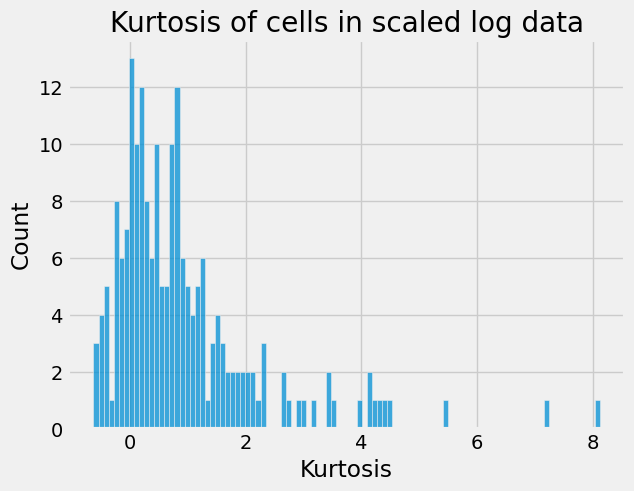

In [94]:
df_kurt_cells = []
for i in range(colN) :     
    v_df = H_Filtered_Scaled_log[H_Filtered_Scaled_log.columns[i]]
    df_kurt_cells += [kurtosis(v_df)]   
df_kurt_cells
sns.histplot(df_kurt_cells,bins=100)
plt.xlabel('Kurtosis')
plt.ylabel('Count')
plt.title('Kurtosis of cells in scaled log data')
plt.show()

Upon comparing the kurtosis and skewness values between the unfiltered data and the transformed dataset, we observe a significant reduction in both measures. This indicates that the series of transformations we applied have effectibely altered the distribution of the data, making it more closely resemble a normal distribution.

We are going to see also how our three main metrics __Count Depth__, __UMI Counts__, __Fraction of mithocondrial genes__ and how they changed

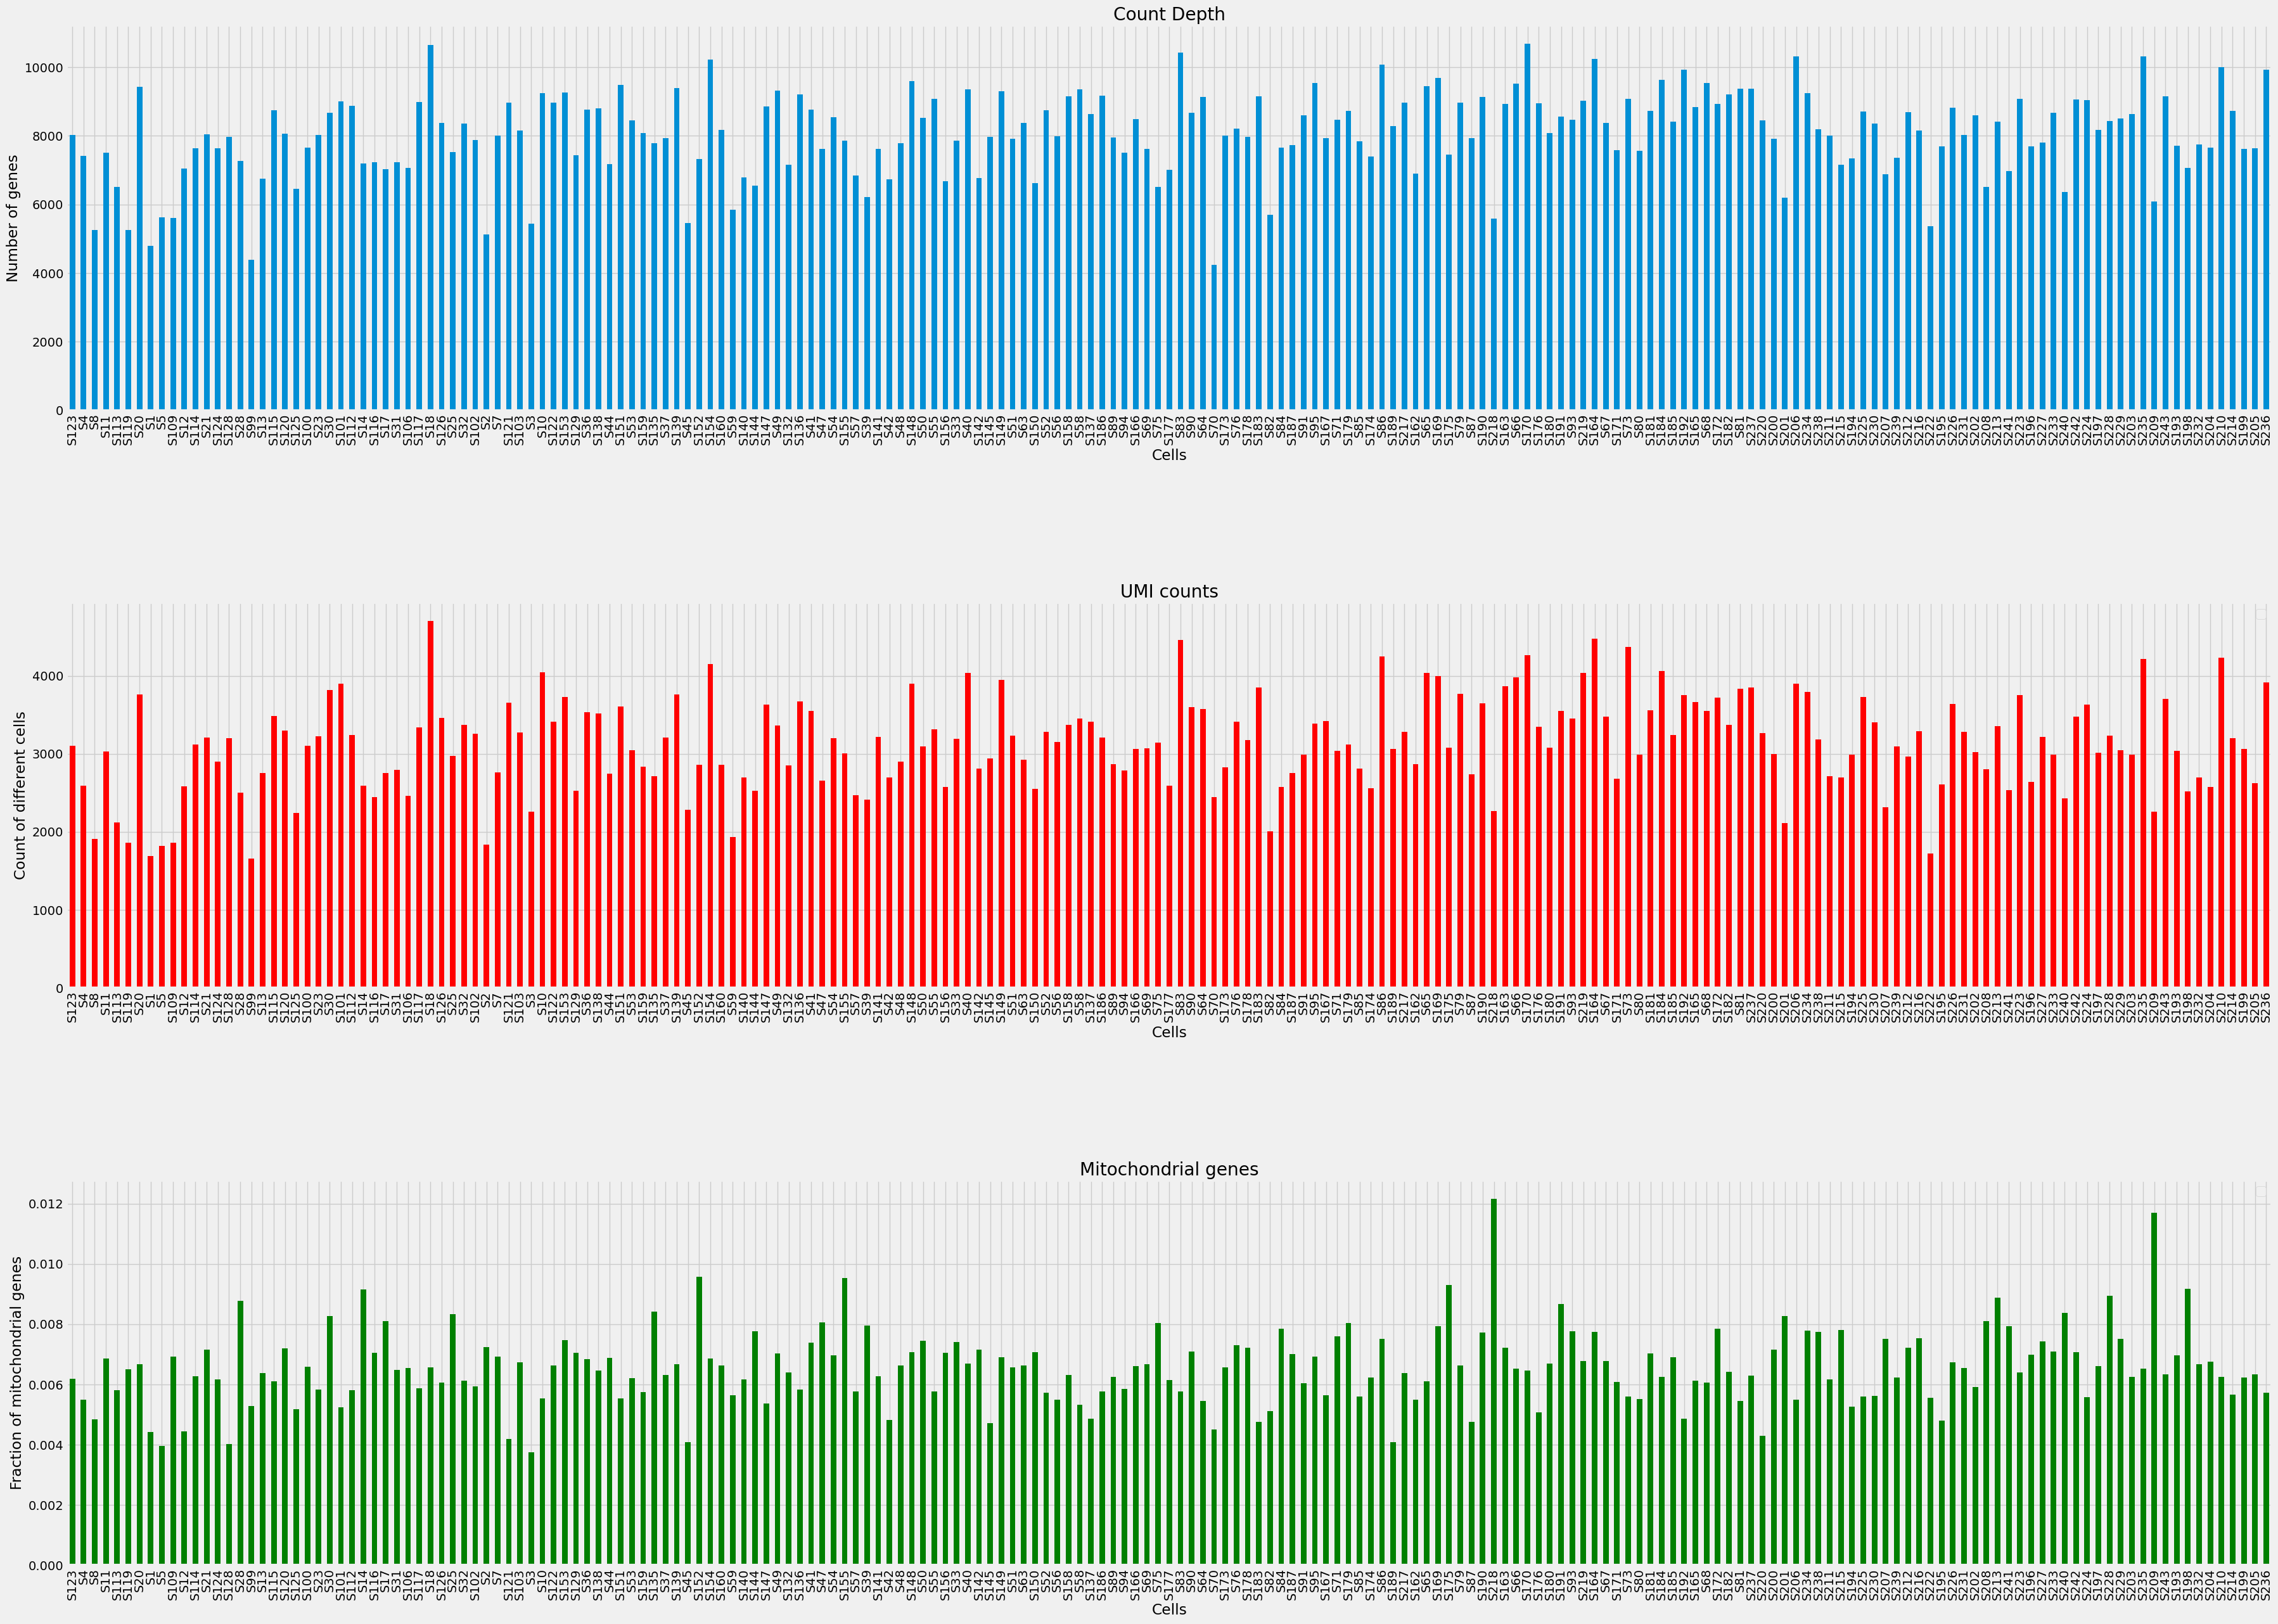

In [95]:
fig, axs = plt.subplots(3, 1, figsize=(40, 30))

# Plot 1: Count Depth
H_Filtered_Scaled_log.sum().plot(kind = 'bar', ax = axs[0])
axs[0].set_title('Count Depth')
axs[0].set_xlabel('Cells')
axs[0].set_ylabel('Number of genes')

# Plot 2: UMI Counts

UMI = {}
for x in H_Filtered_Scaled_log.columns:
    UMI[f'{x}'] = 0
for x in H_Filtered_Scaled_log.columns:
    temp = H_Filtered_Scaled_log[x][H_Filtered_Scaled_log[x] != 0]
    UMI[f'{x}'] = len(temp)
UMI_df = pd.Series(UMI)
UMI_df.plot(kind='bar', color='red', ax=axs[1])
axs[1].set_title('UMI counts')
axs[1].set_xlabel('Cells')
axs[1].set_ylabel('Count of different cells')
axs[1].legend([])

# Plot 3: Mitochondrial genes
mt_genes = []
for i in H_Filtered_Scaled_log.index.tolist():
    if i[:2] == 'MT':
        mt_genes.append(i)
d = {}
for i in H_Filtered_Scaled_log.columns:
    counter = 0
    for j in H_Filtered_Scaled_log[i].index.tolist():
        if j in mt_genes:
            counter += H_Filtered_Scaled_log.loc[j, i]
    d[i] = counter / H_Filtered_Scaled_log[i].sum()
mt = pd.Series(d)
mt.plot(kind='bar', color='green', ax=axs[2])
axs[2].set_title('Mitochondrial genes')
axs[2].set_xlabel('Cells')
axs[2].set_ylabel('Fraction of mitochondrial genes')
axs[2].legend([])


plt.subplots_adjust(hspace=0.5)

plt.show()


Regarding Count Depth, UMI counts and Mithocondrial genes there is a big difference with unfiltered data:

- Count Depth appears now to be more uniform across cells after scaling by the median. This normalization technique ensures that each cell has more or less the same count.

- Secondly, the UMI counts metric also exhibits greater uniformity among cells. This result is achieved through the combined effect of cell and gene filtering steps, in which cells with low expression counts and genes with low expression in cells were removed. In conclusion, the extreme variations in UMI counts were eliminated.

- Lastly, the fraction of mithocondrial genes shows a more uniform distribution, similar to the other metrics. This outcome is a result of the filtering process, where cells exceeding the 5% threshold of mitochondrial genes are removed.

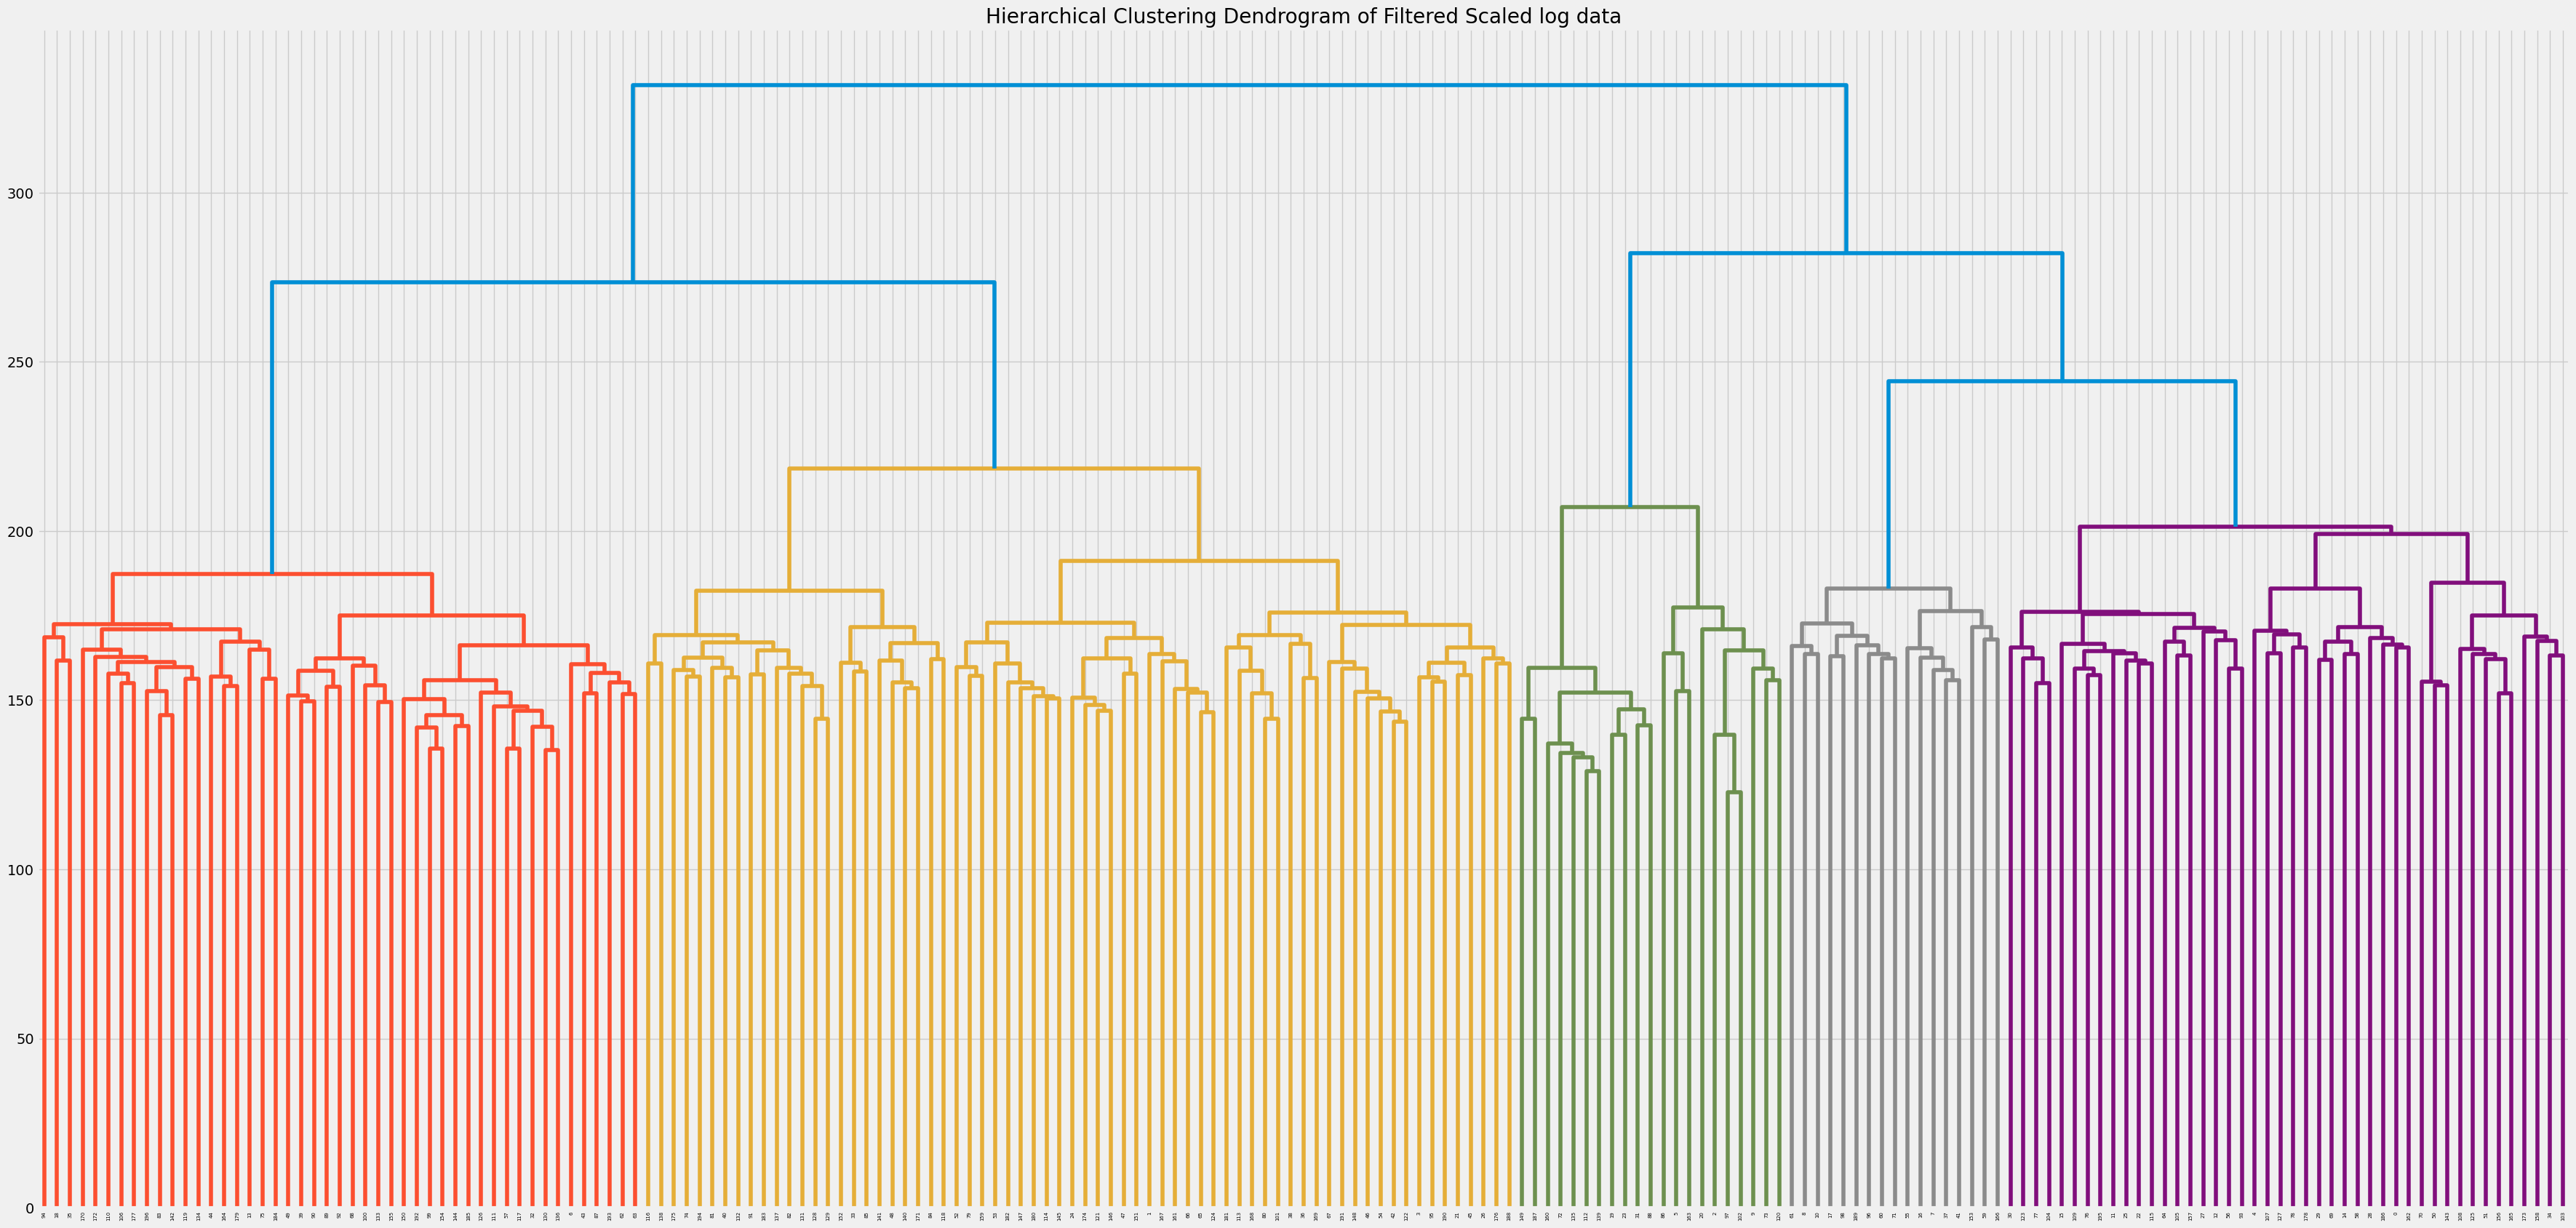

In [96]:
Z2 = linkage(H_Filtered_Scaled_log.T, method='ward')
plt.figure(figsize=(40, 20))
plt.title("Hierarchical Clustering Dendrogram of Filtered Scaled log data")
dendrogram(Z2);

The hierarchical clustering on the filtered, scaled, and logarithmically transformed data reveals the presence of five distinct clusters. While the clustering may not exhibit highly defined or natural clusters, we can observe than the dendogram at the begininng splits into two relatively balanced branches, indicating a potential division in the data.

Although the clustering result may not be considered perfect, it can still be satisfactory given the available information and the analysis performed.

#### Second Approach

#### Second Approach

As previously mentioned, this approach consists in applying a logarithmic function to reduce the scale of the samples and then scale by the mean.

In [97]:
H_Filtered_log = H_Smart_gf2.applymap(lambda x: np.log(1 + x))
mean_values = H_Filtered_log.mean()
H_Filtered_log_mean = H_Filtered_log - mean_values

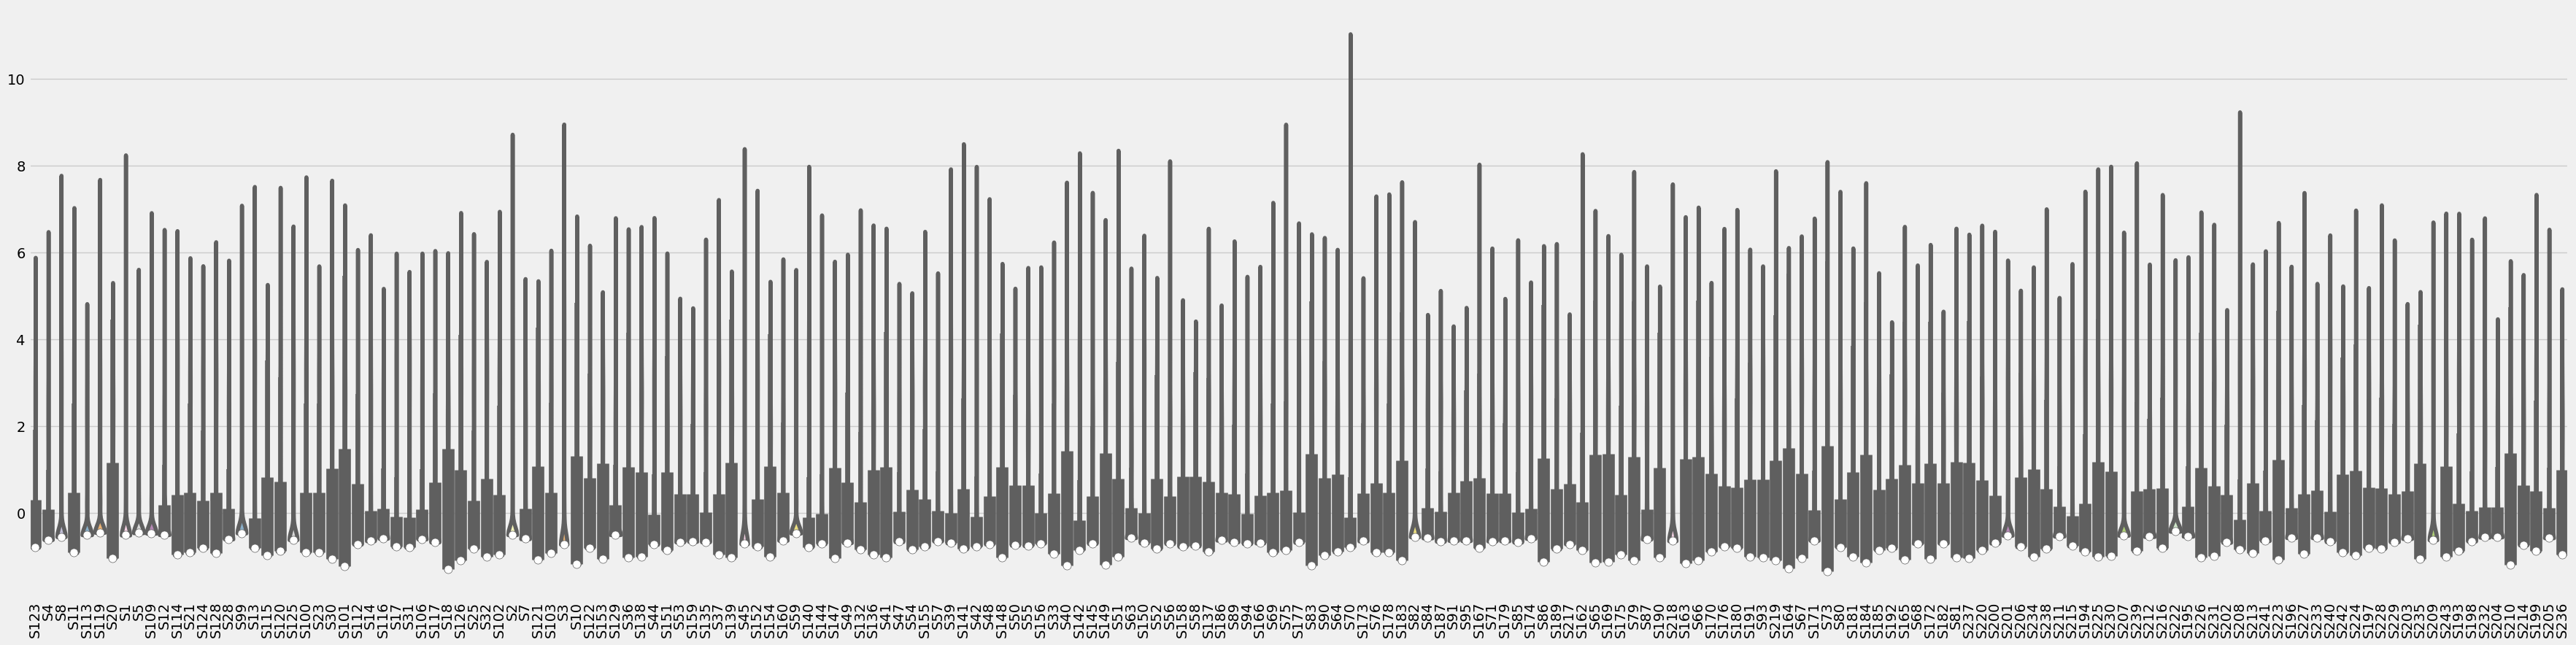

In [98]:
plt.figure(figsize=(40,10))
plot=sns.violinplot(data= H_Filtered_log_mean, palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

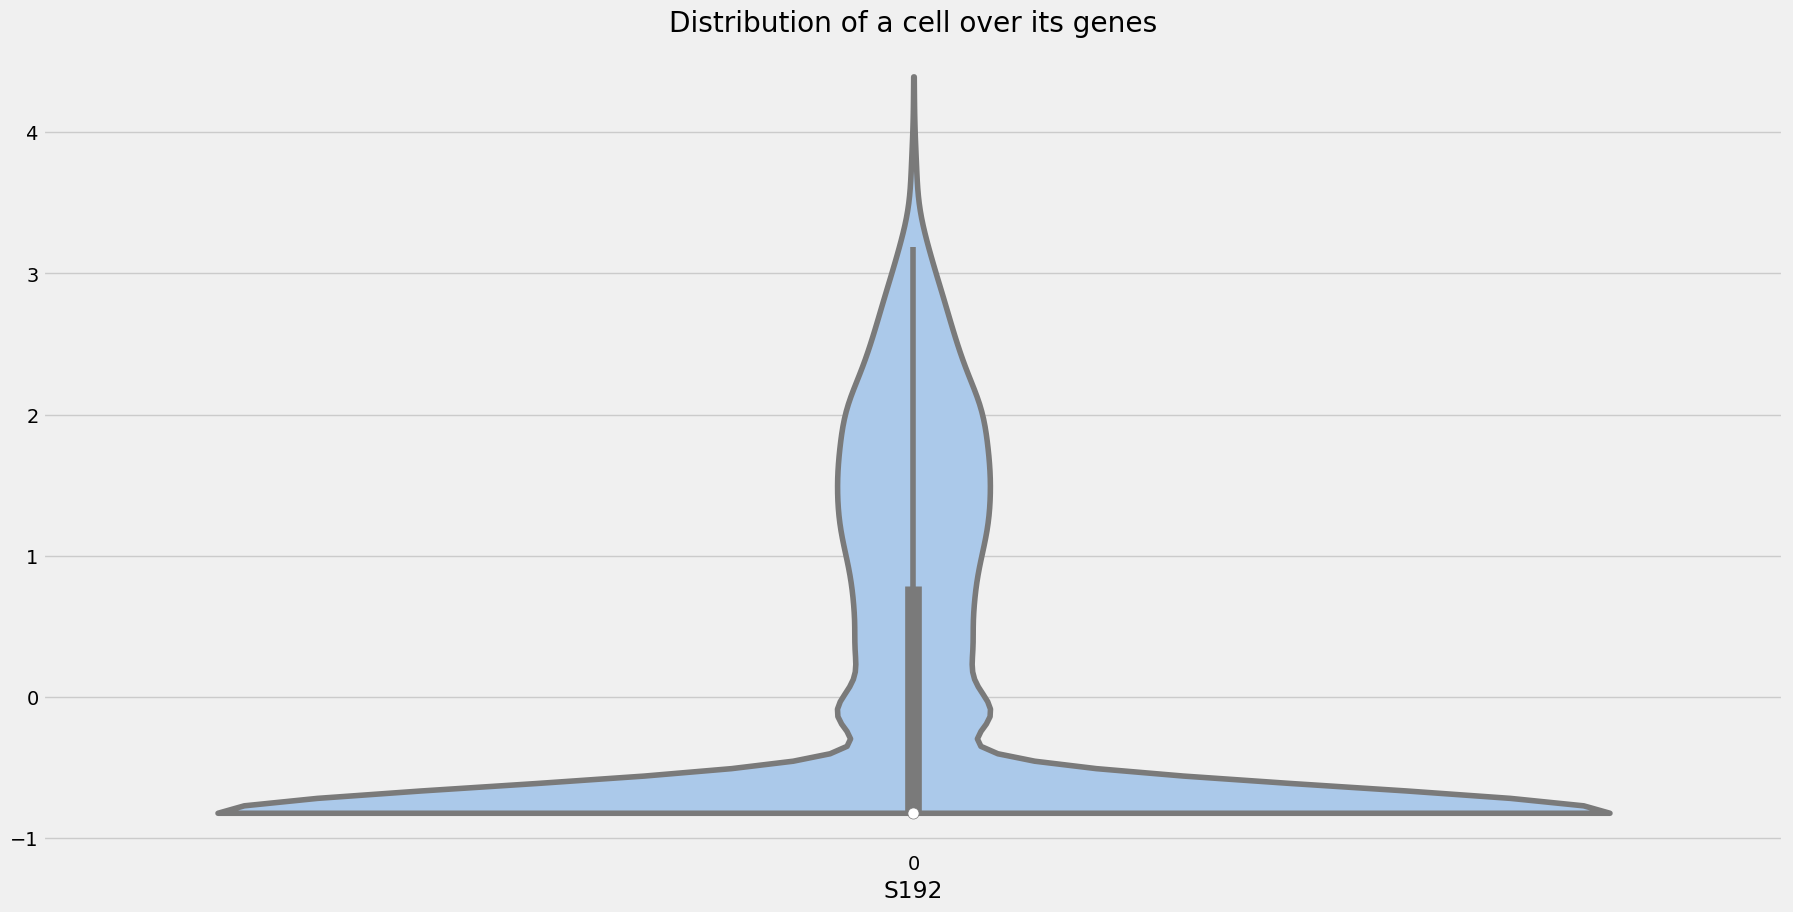

In [99]:
random_cell = np.random.randint(H_Filtered_log_mean.shape[1])
plt.figure(figsize = (20,10))
plot = sns.violinplot(data = H_Filtered_log_mean.iloc[:,random_cell], palette = "pastel", cut = 0, fit = norm)
plot.set_xlabel(H_Filtered_Scaled_log.columns[random_cell])
plot.set_title('Distribution of a cell over its genes')
plt.show()

This results does not vary much from the results we observed in the previous violin plots: the distribution has a significantly high distribution of non-zero values; however, in this case, since we performed a scale by the mean, negative values can be recorded.

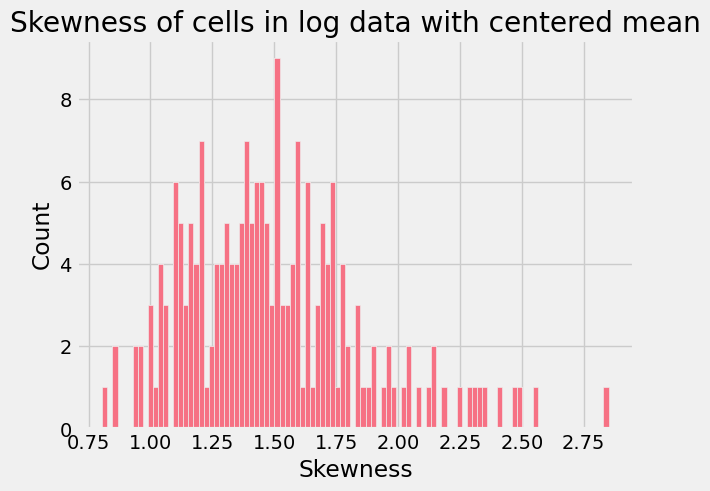

In [100]:
colN = np.shape(H_Filtered_log_mean)[1]
colN
df_skew_cells = []
for i in range(colN) :     
    v_df = H_Filtered_log_mean[H_Filtered_log_mean.columns]
    df_skew_cells += [skew(v_df)]   
df_skew_cells
sns.histplot(df_skew_cells,bins=100, legend = False)
plt.xlabel('Skewness')
plt.ylabel('Count')
plt.title('Skewness of cells in log data with centered mean')
plt.show()

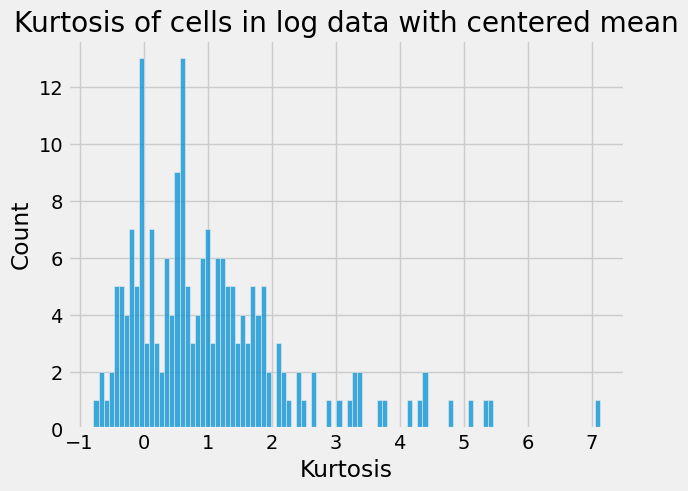

In [101]:
df_kurt_cells = []
for i in range(colN) :     
    v_df = H_Filtered_log_mean[H_Filtered_log_mean.columns[i]]
    df_kurt_cells += [kurtosis(v_df)]   
df_kurt_cells
sns.histplot(df_kurt_cells,bins=100)
plt.xlabel('Kurtosis')
plt.ylabel('Count')
plt.title('Kurtosis of cells in log data with centered mean')
plt.show()

The skewness is more or less the same as the previous normalisation and indeed more symmetric than the unfiltered data.
On the other hand, the kurtosis takes also negative values so some cells have lighter tails than a normal distribution and beside of these they are very similar

Let us plot the 3 metrics as before

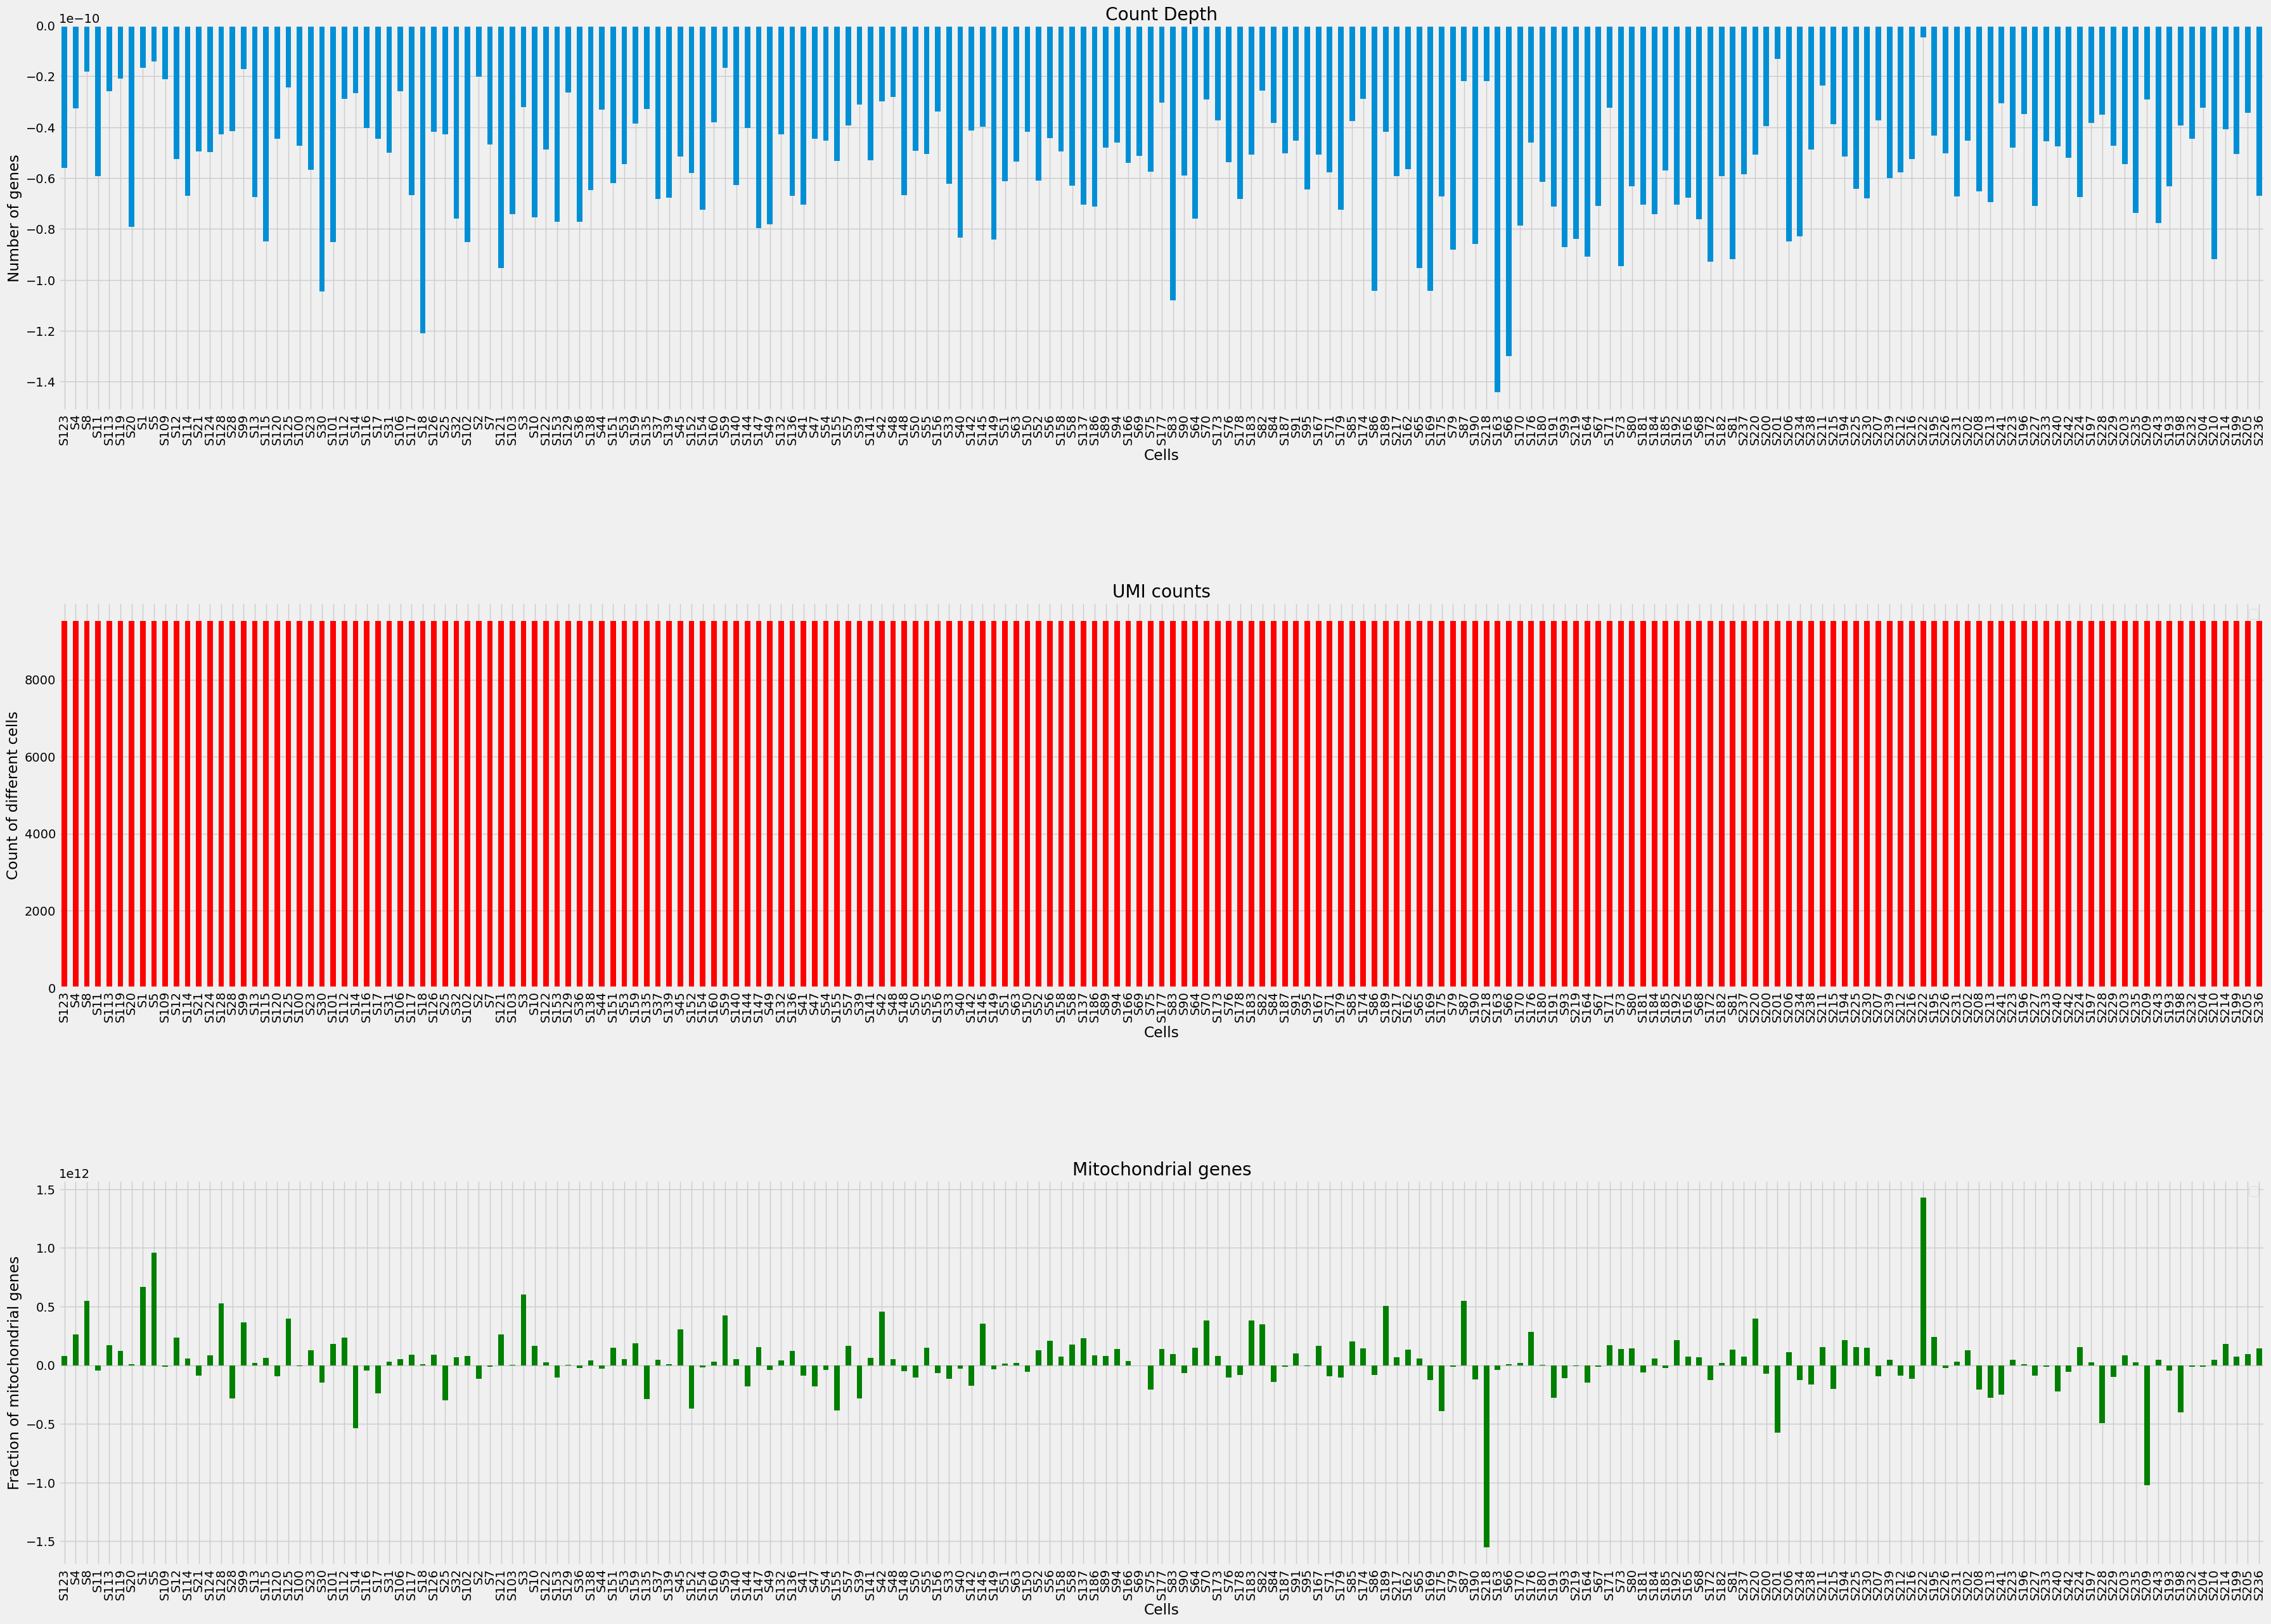

In [102]:
fig, axs = plt.subplots(3, 1, figsize=(40, 30))

# Plot 1: Count Depth
H_Filtered_log_mean.sum().plot(kind = 'bar', ax = axs[0])
axs[0].set_title('Count Depth')
axs[0].set_xlabel('Cells')
axs[0].set_ylabel('Number of genes')

# Plot 2: UMI Counts

UMI = {}
for x in H_Filtered_log_mean.columns:
    UMI[f'{x}'] = 0
for x in H_Filtered_log_mean.columns:
    temp = H_Filtered_log_mean[x][H_Filtered_log_mean[x] != 0]
    UMI[f'{x}'] = len(temp)
UMI_df = pd.Series(UMI)
UMI_df.plot(kind='bar', color='red', ax=axs[1])
axs[1].set_title('UMI counts')
axs[1].set_xlabel('Cells')
axs[1].set_ylabel('Count of different cells')
axs[1].legend([])

# Plot 3: Mitochondrial genes
mt_genes = []
for i in H_Filtered_log_mean.index.tolist():
    if i[:2] == 'MT':
        mt_genes.append(i)
d = {}
for i in H_Filtered_log_mean.columns:
    counter = 0
    for j in H_Filtered_log_mean[i].index.tolist():
        if j in mt_genes:
            counter += H_Filtered_log_mean.loc[j, i]
    d[i] = counter / H_Filtered_log_mean[i].sum()
mt = pd.Series(d)
mt.plot(kind='bar', color='green', ax=axs[2])
axs[2].set_title('Mitochondrial genes')
axs[2].set_xlabel('Cells')
axs[2].set_ylabel('Fraction of mitochondrial genes')
axs[2].legend([])


plt.subplots_adjust(hspace=0.5)

plt.show()


Due to the nature of subtracting the mean from the data, the plots displaying the three metrics may become less meaningful. This is because the subtraction of the mean can result in negative values, which can affect the interpretation and reliability of these metrics.Consequently, it is not advisable to solely rely on these metrics or drawing conclusions or making assessments.

Instead, it would be more appropriate to evaluate the performance of the model to assess the effectiveness of the applied transformations and their impact on the data.

__HIERARCHICAL CLUSTERING, AGAIN__

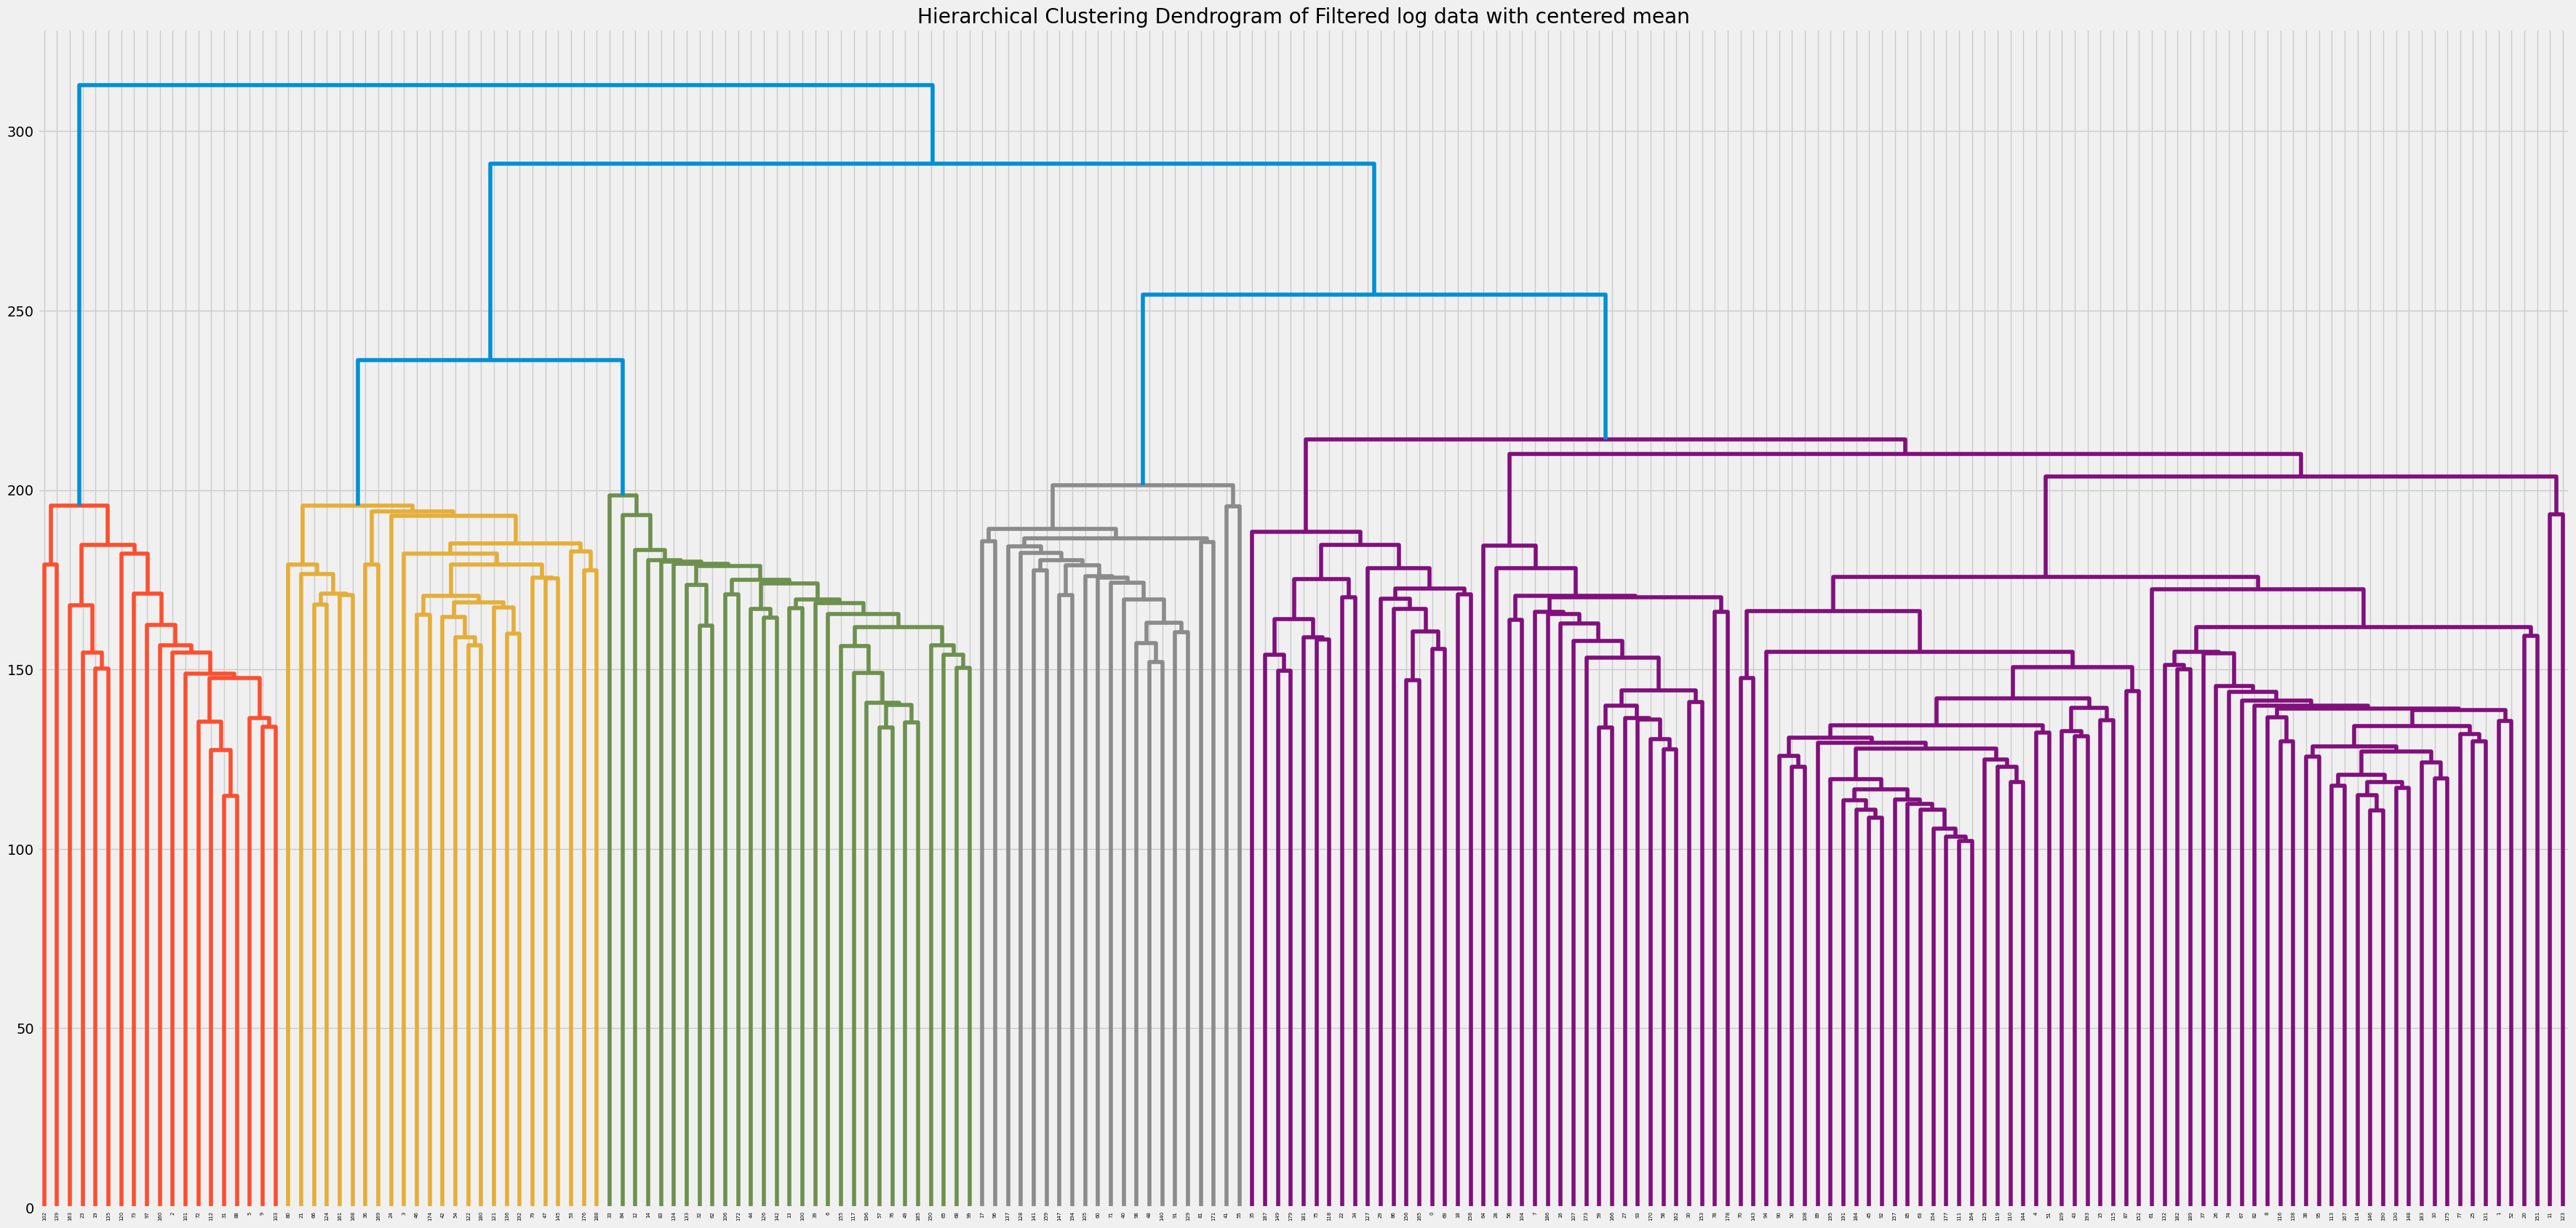

In [103]:
Z3 = linkage(H_Filtered_log_mean.T, method='ward')
plt.figure(figsize=(40, 20))
plt.title("Hierarchical Clustering Dendrogram of Filtered log data with centered mean")
dendrogram(Z3);

Here we get a less surprising result, since the red cluster appears significantly different from the other clusters. However, it is important to note that the rpesence of negative values resulting from the data transformations may introduce biases in the clustering analysis. As a result, the interpretation of the clusters based solely on visual examination of the plots shoul be approached with caution.

### Model

# SOURCES

- 'The zero-inflation controversy about scRNA-seq data': https://genomebiology.biomedcentral.com/articles/10.1186/s13059-022-02601-5
- https://www.iris.sssup.it/bitstream/11382/326566/1/New%20Phytol%202011.pdf